In [1]:
from explorerl.utils import *
from explorerl.QLearning import *

In [2]:
import numpy as np
import torch
import tensorflow as tf
import gym
import sys

# Linear QLearning on MountainCar 

In [3]:
env = gym.make("MountainCar-v0")
e = Env_Wrapper(env)

## With Featurizing

In [4]:
scaler, featurizer = create_scaler_featurizer(env,make_scaler=True)

### Tensorflow

In [5]:
qtf = QLearningTF(learning_rate=0.001,use_bias=True,featurizer=featurizer,scaler=scaler)

  0%|          | 0/200 [00:00<?, ?it/s]

Model Created!


Epsilon : 2.505568501063291e-175, Num Steps : 136, Avg Reward with Window Size 25 : -155.32: 100%|██████████| 200/200 [03:27<00:00,  1.04s/it] 
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


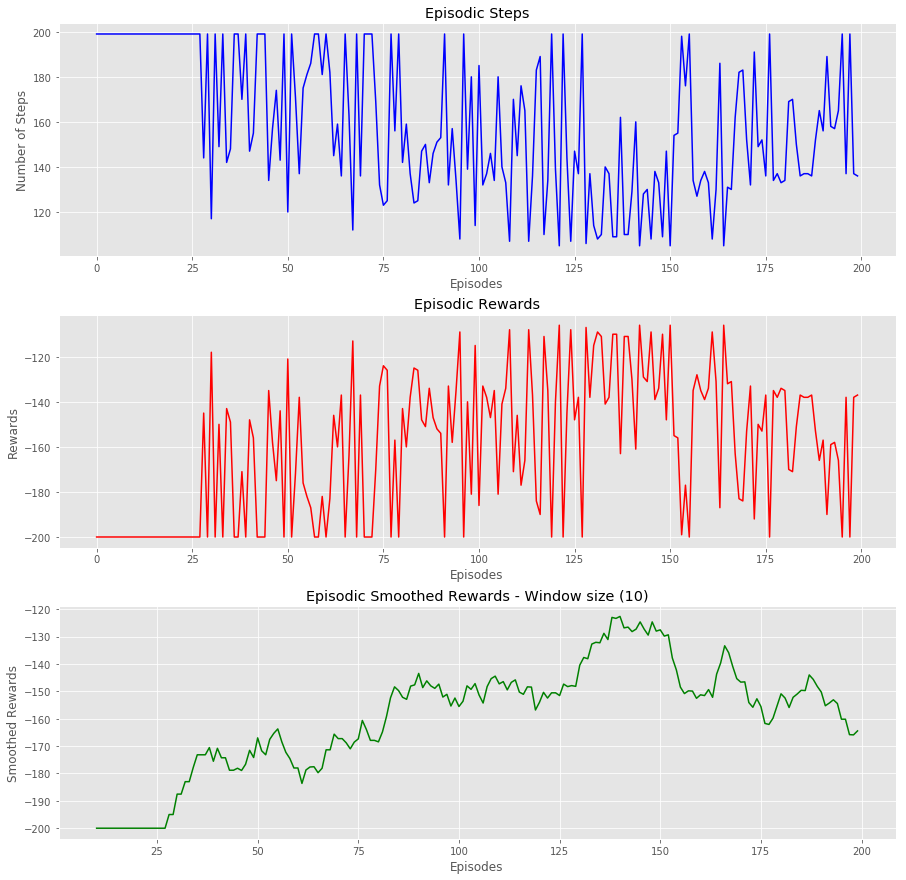

Total reward for episode 0: -149.0



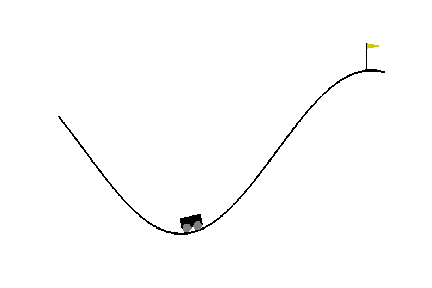
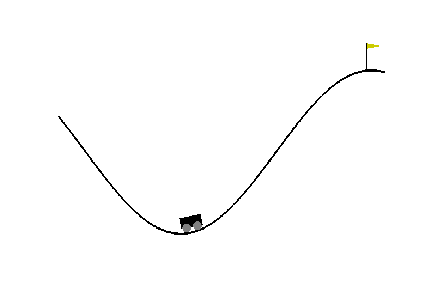
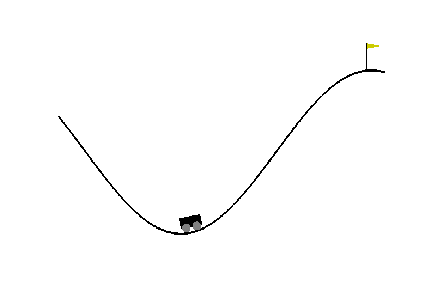
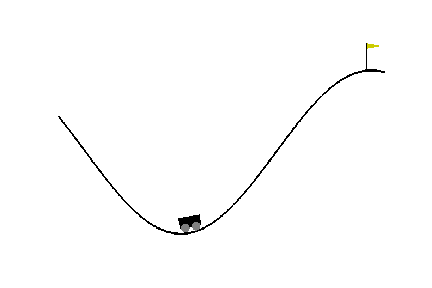
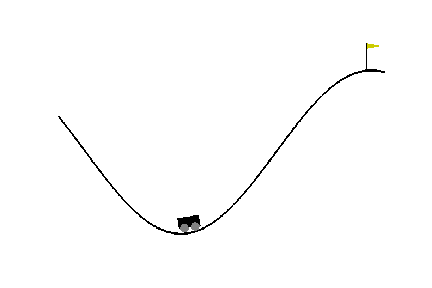
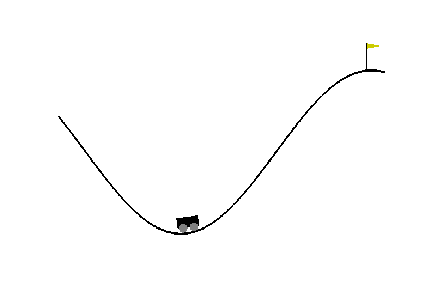
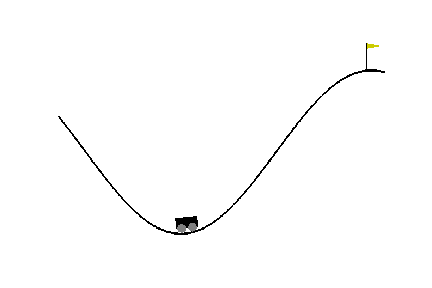
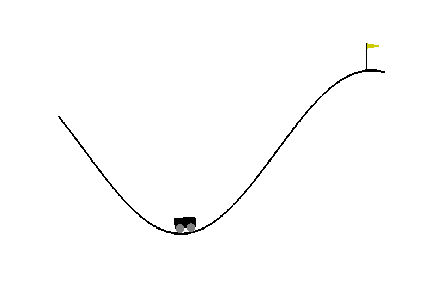
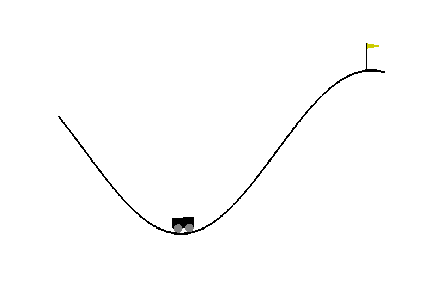
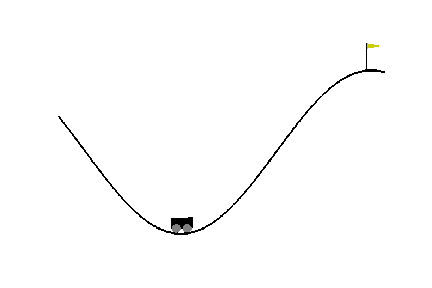
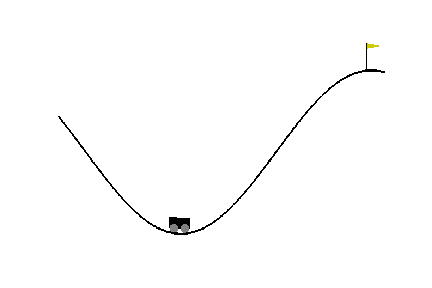
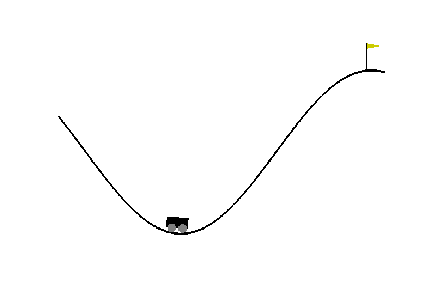
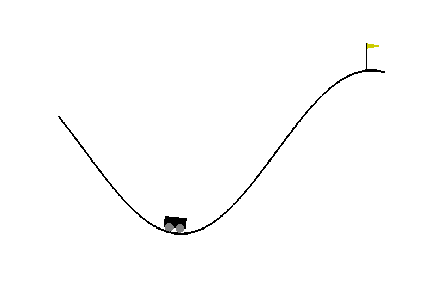
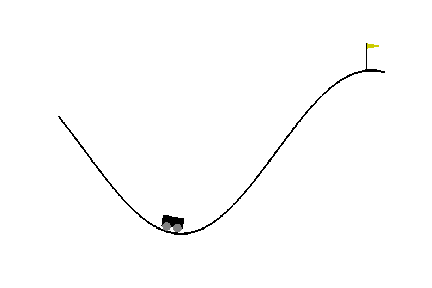
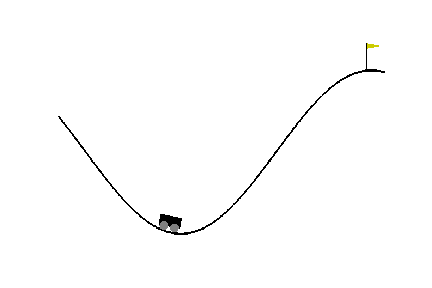
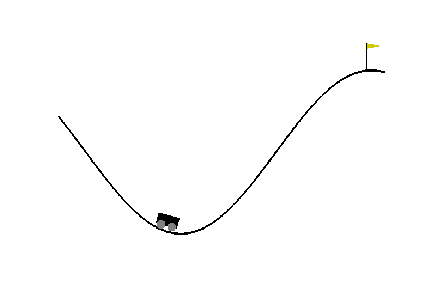
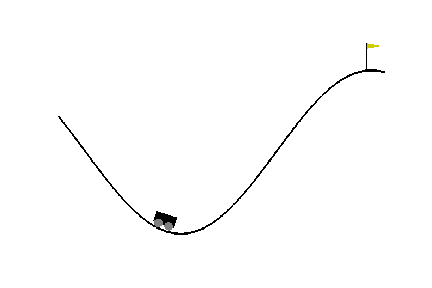
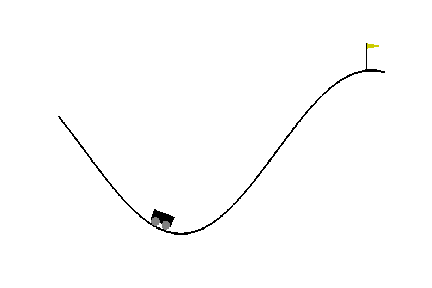
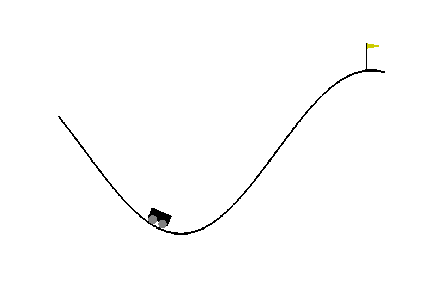
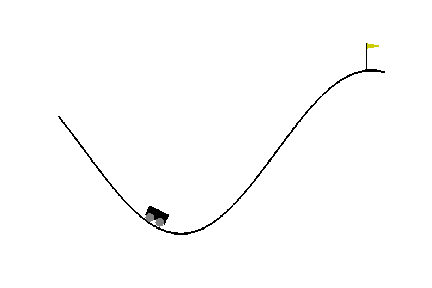
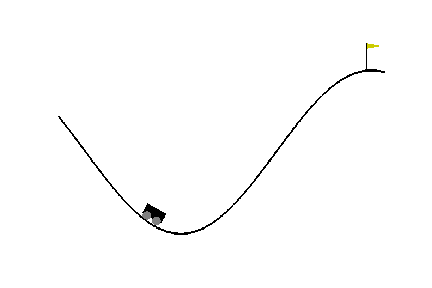
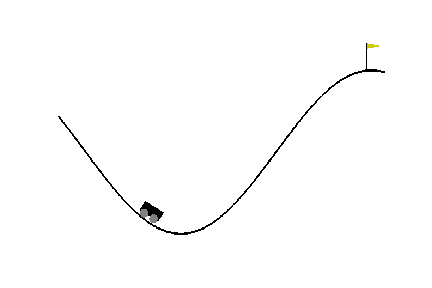
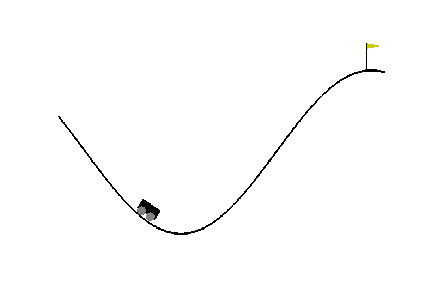
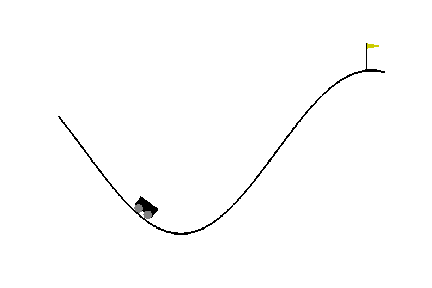
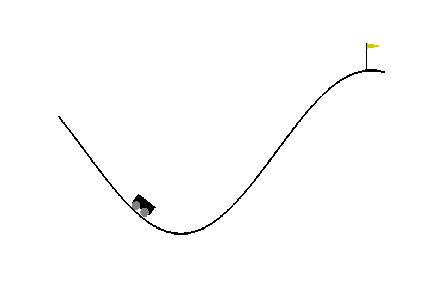
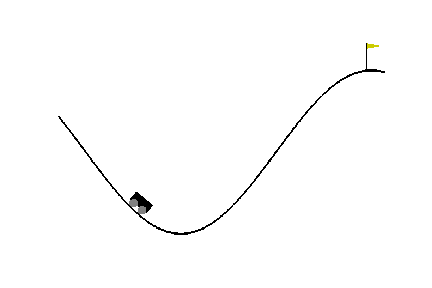
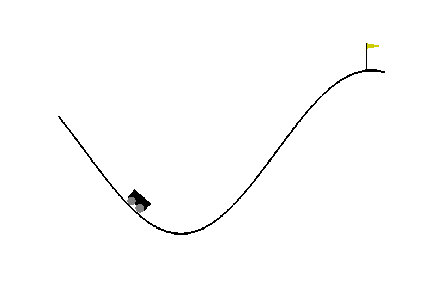
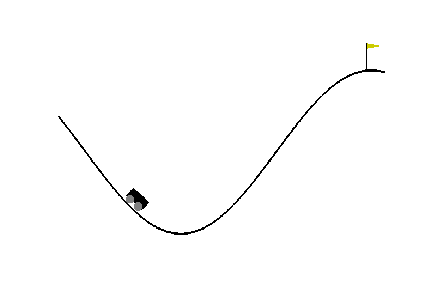
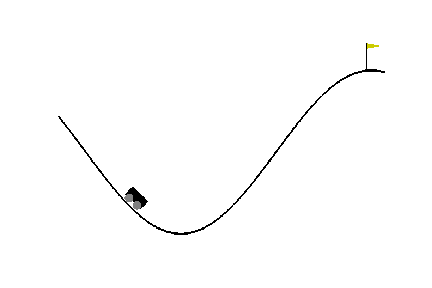
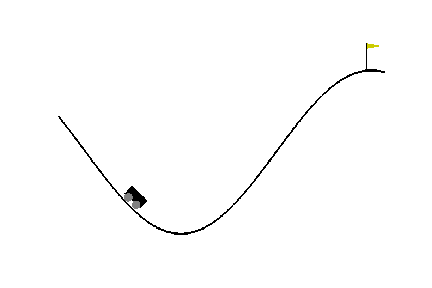
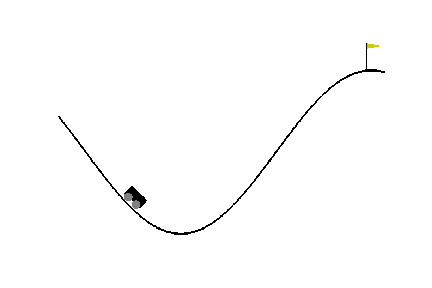
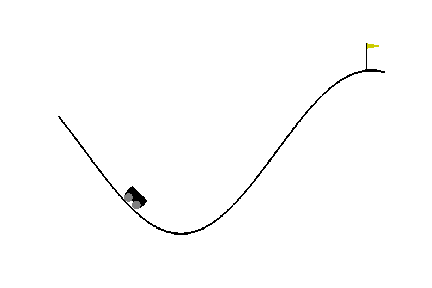
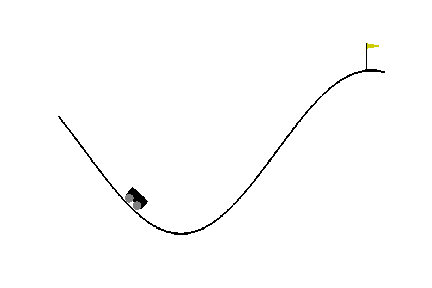
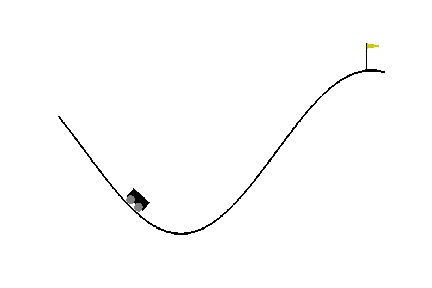
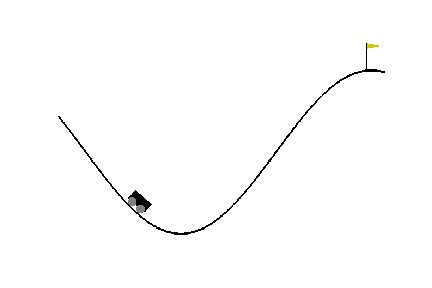
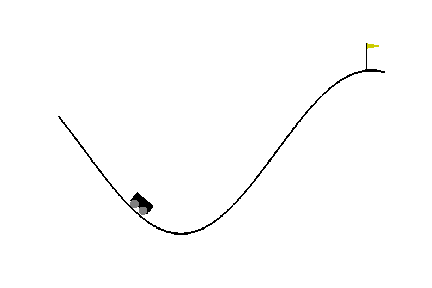
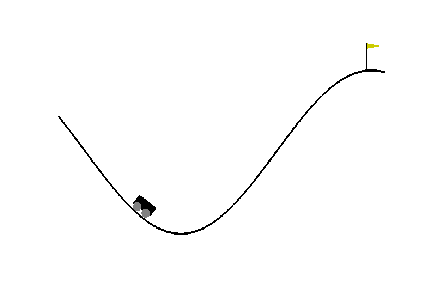
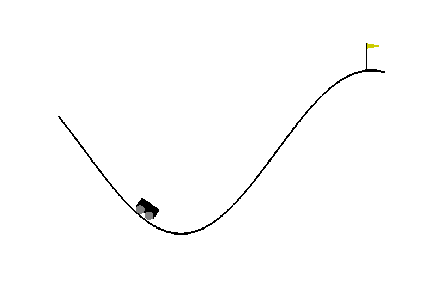
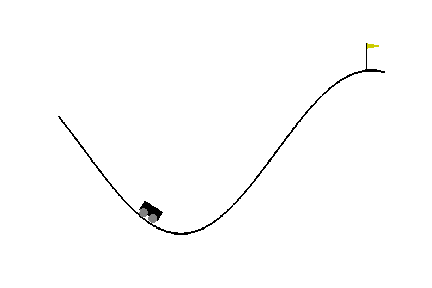
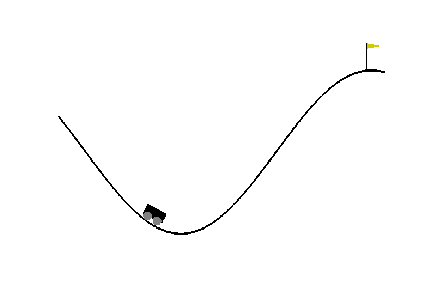
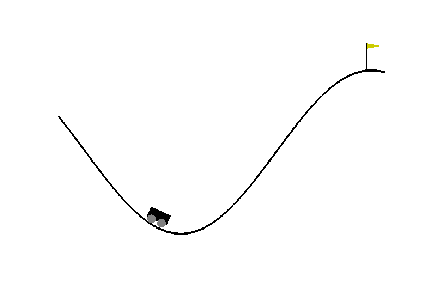
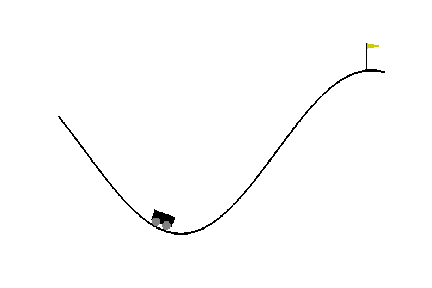
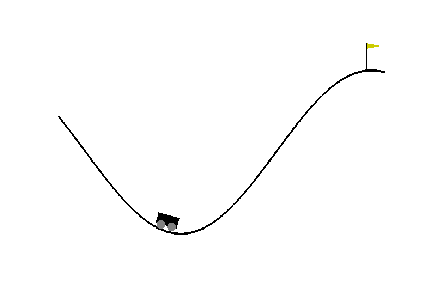
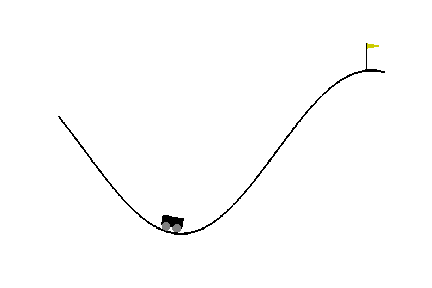
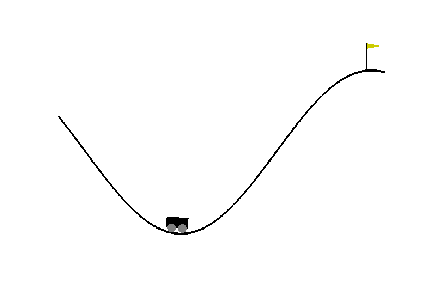
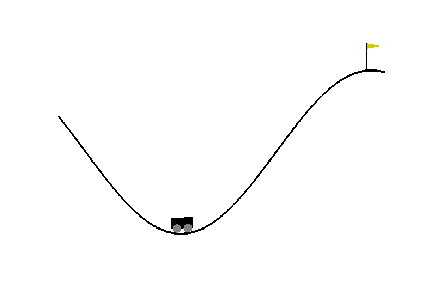
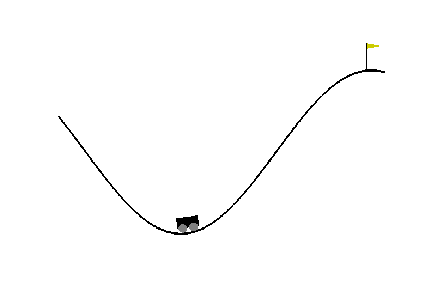
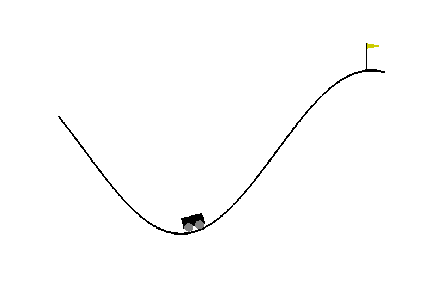
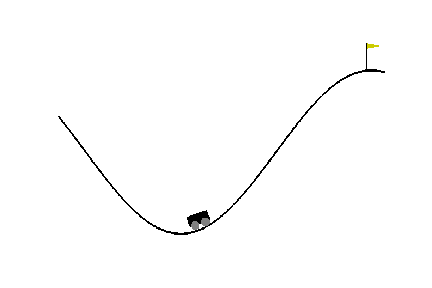
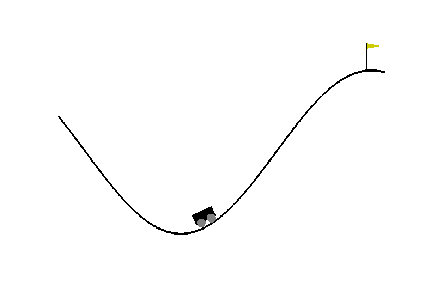
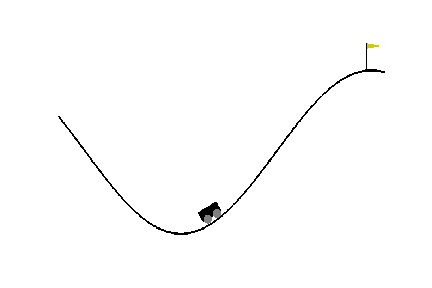
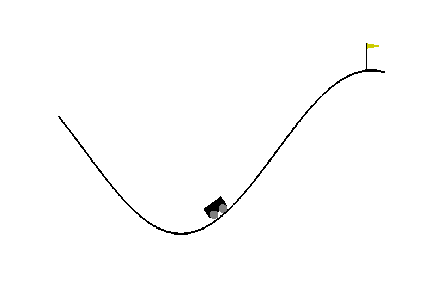
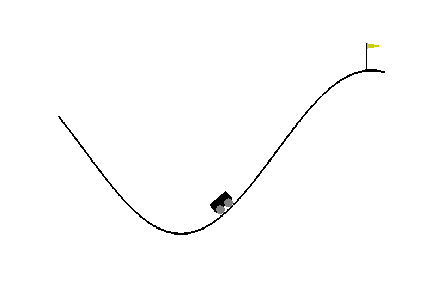
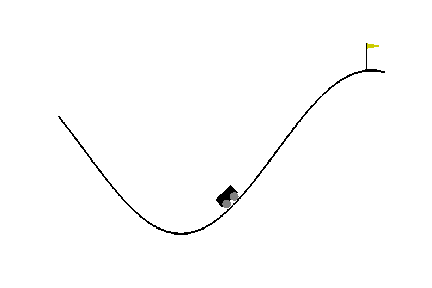
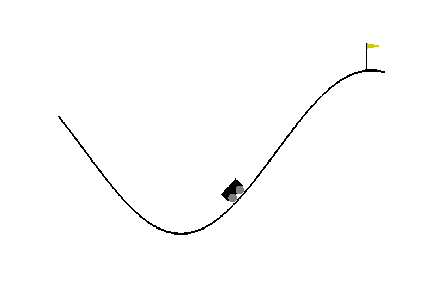
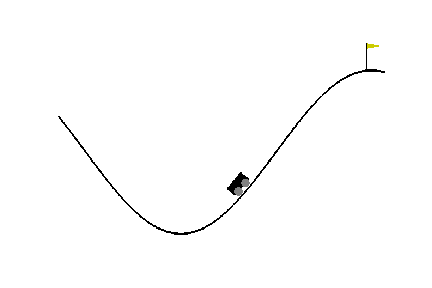
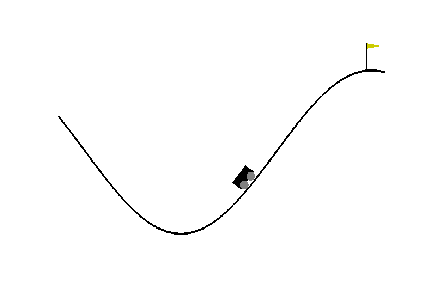
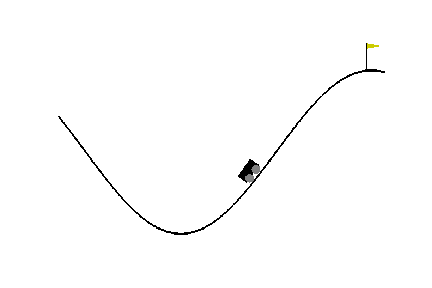
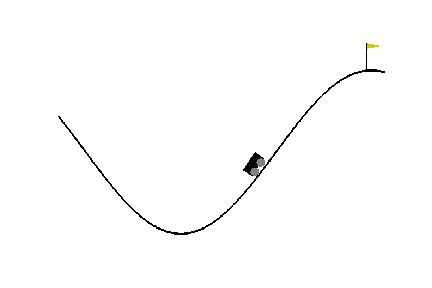
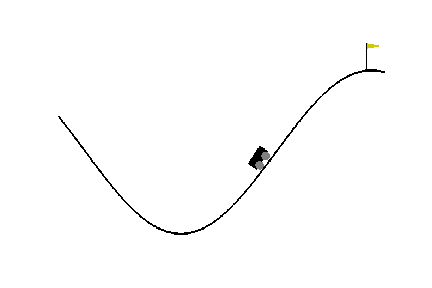
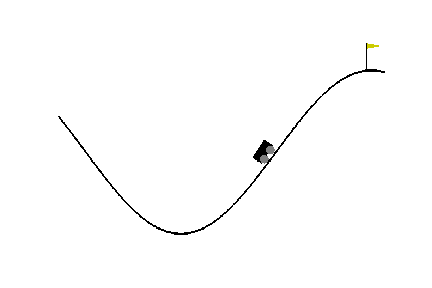
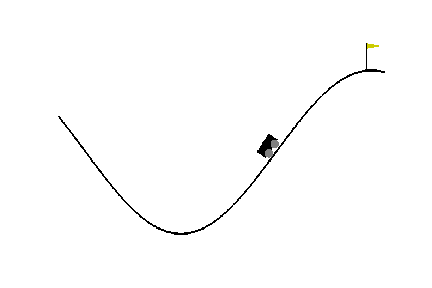
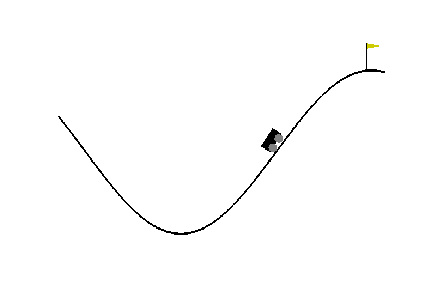
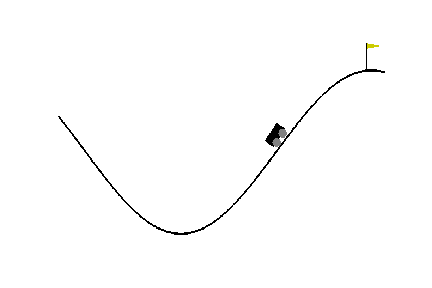
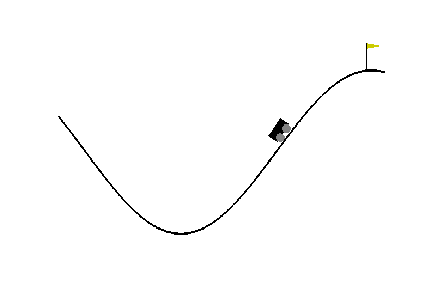
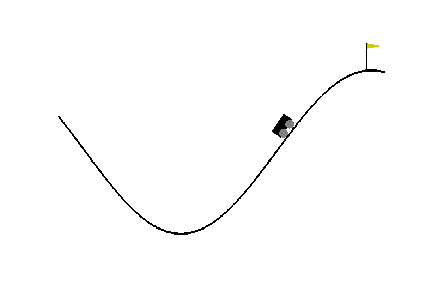
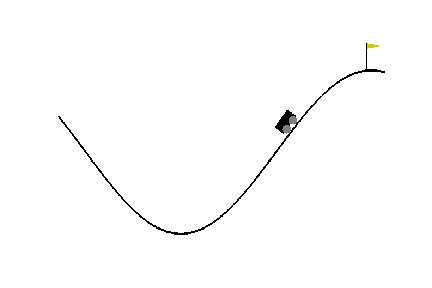
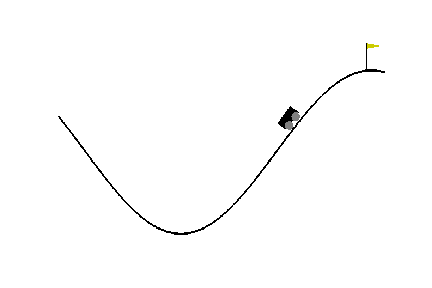
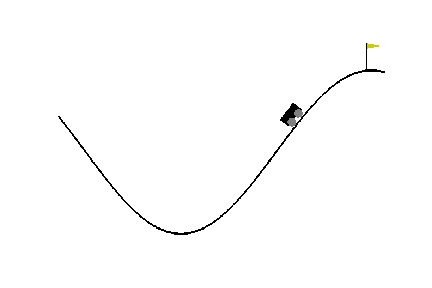
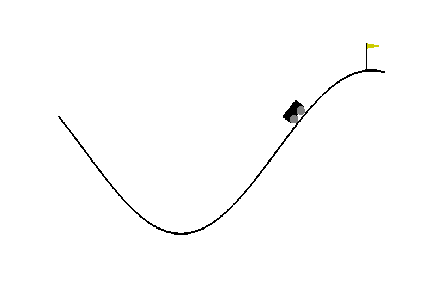
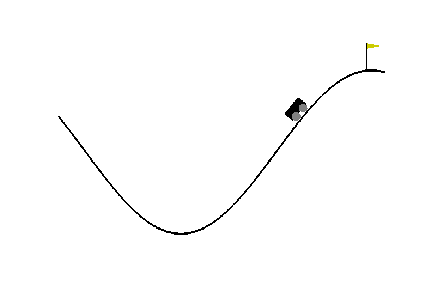
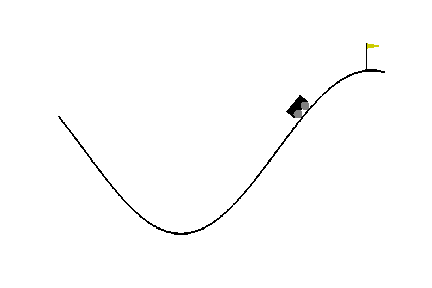
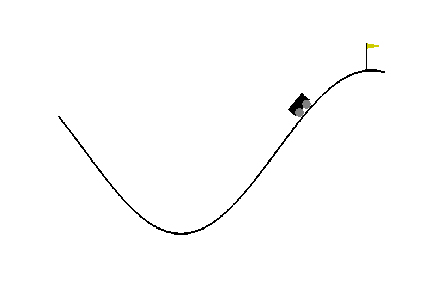
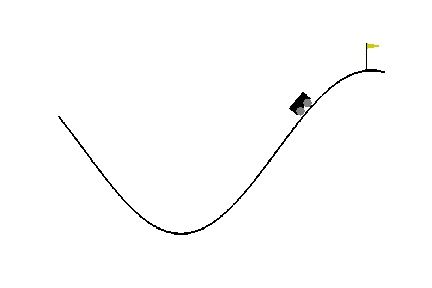
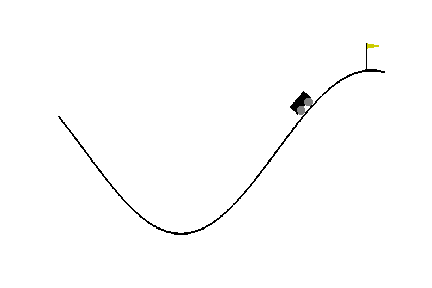
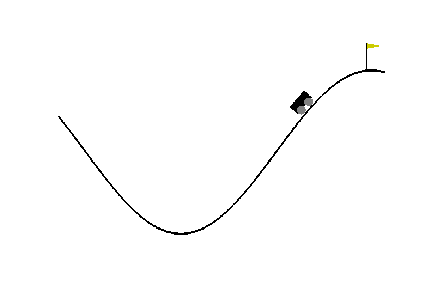
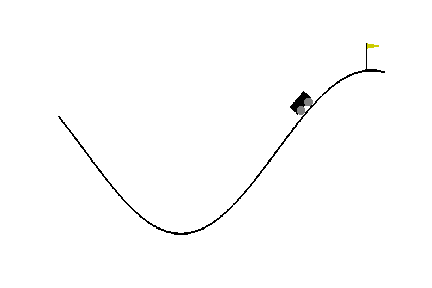
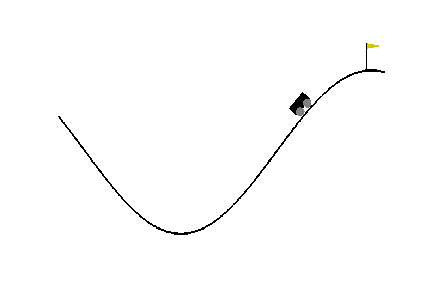
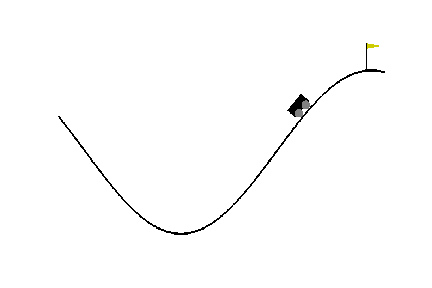
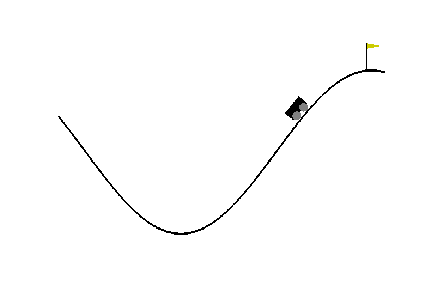
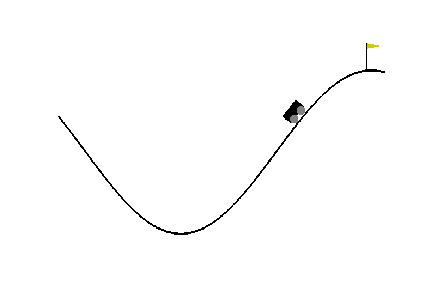
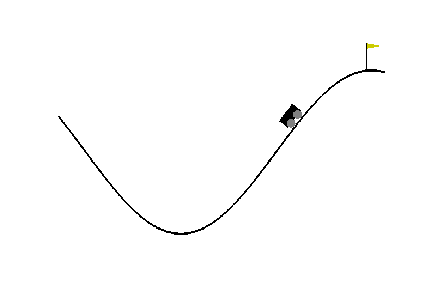
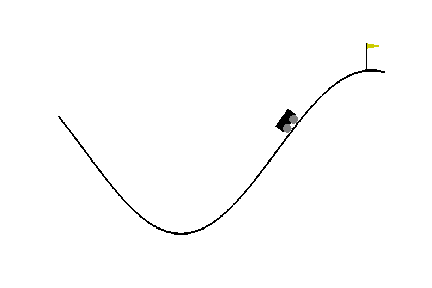
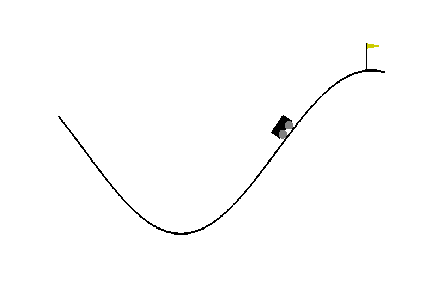
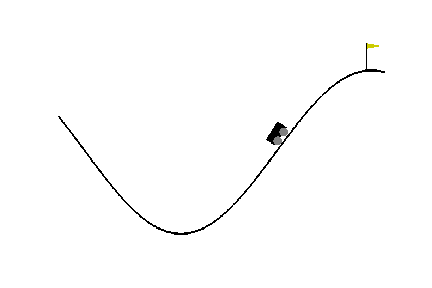
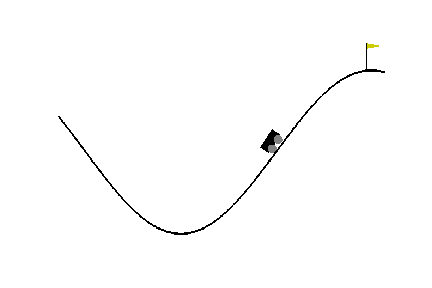
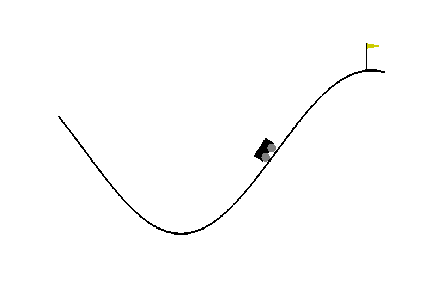
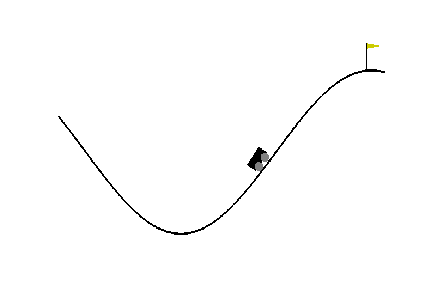
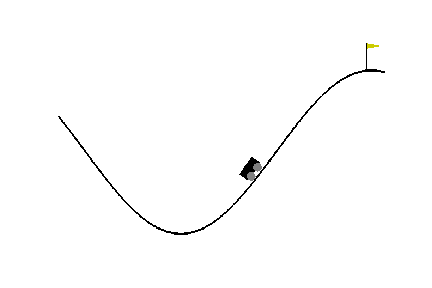
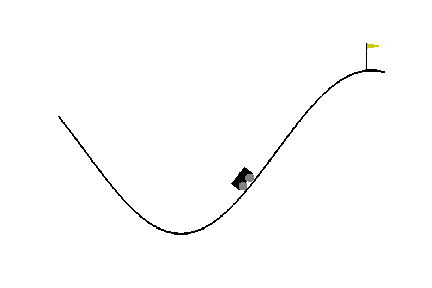
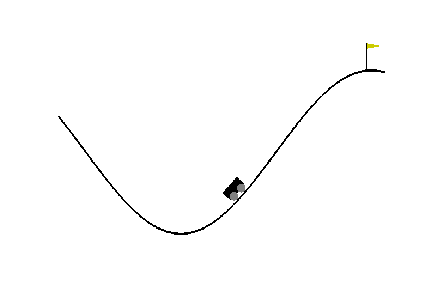
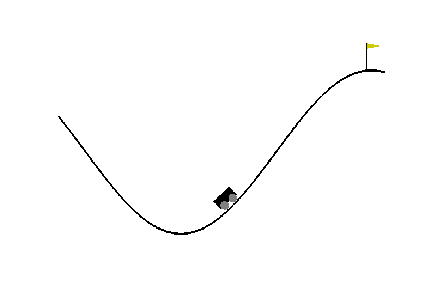
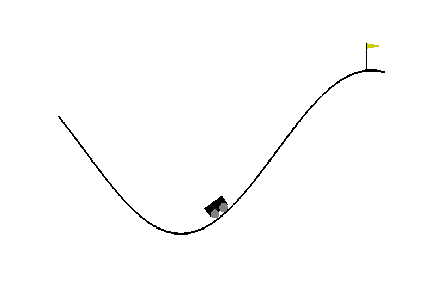
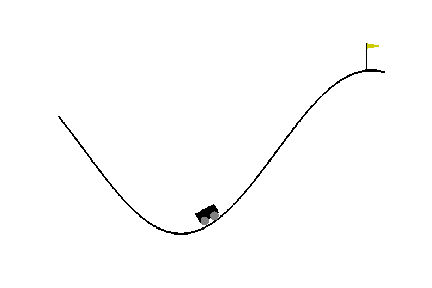
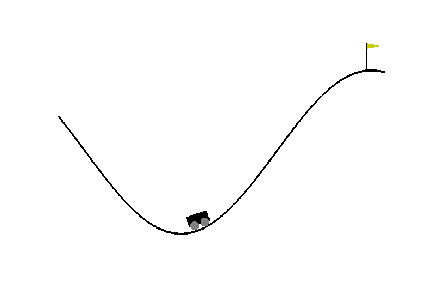
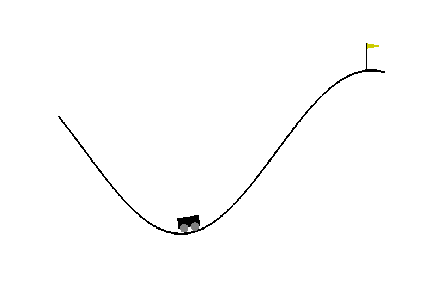
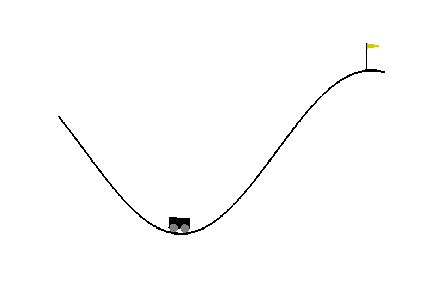
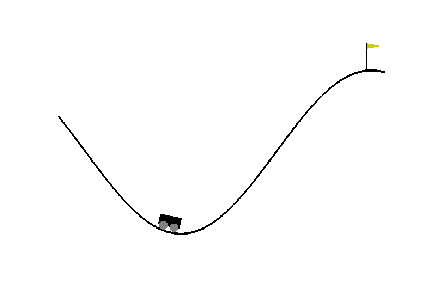
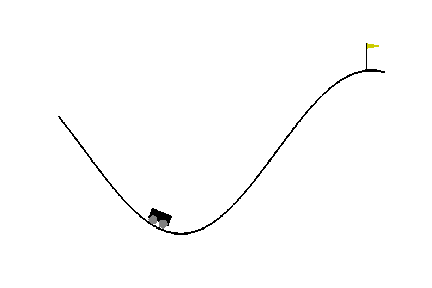
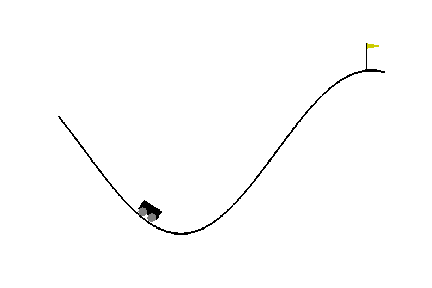
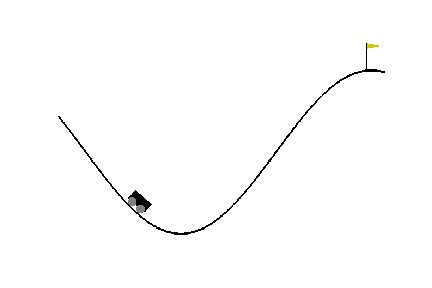
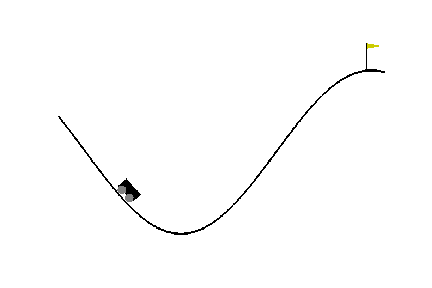
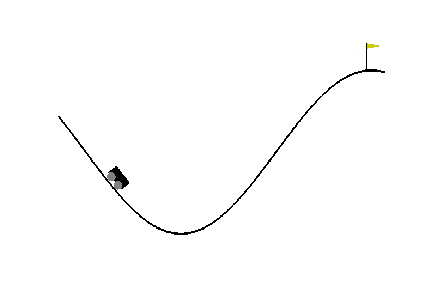
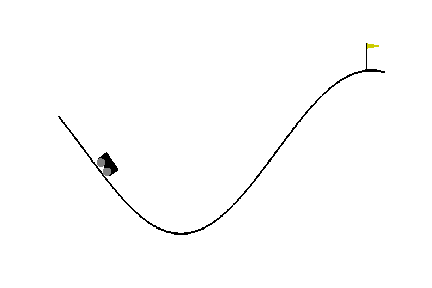
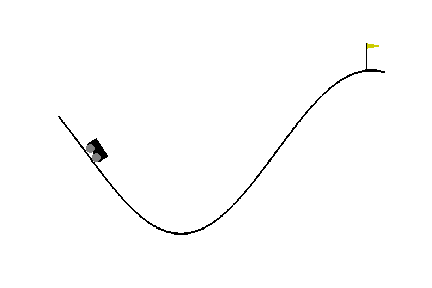
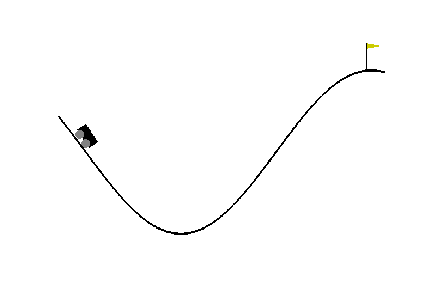
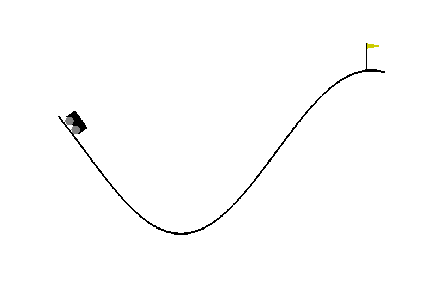
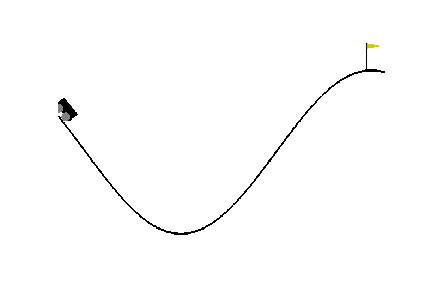
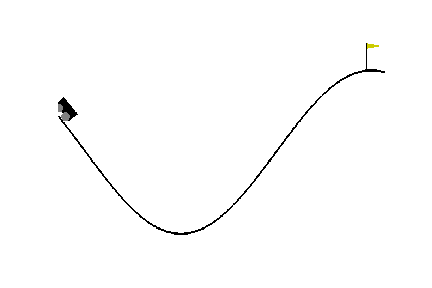
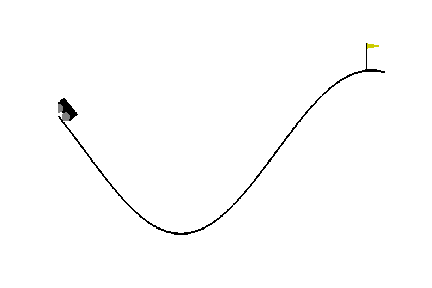
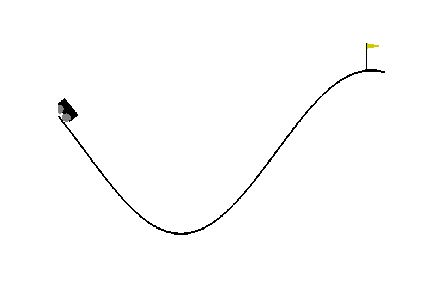
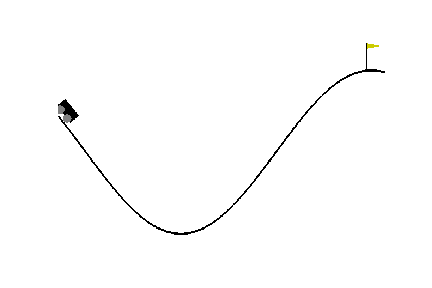
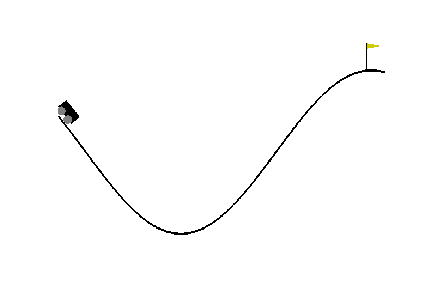
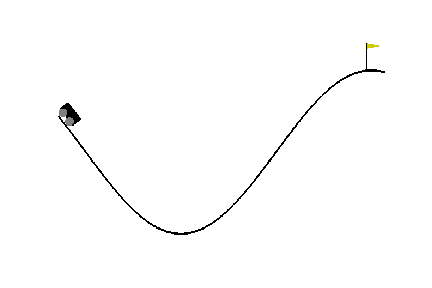
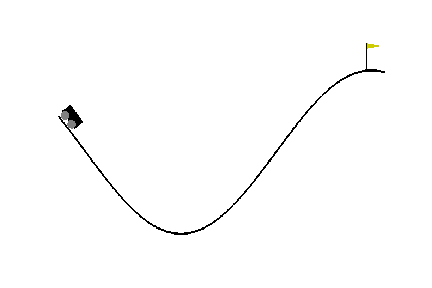
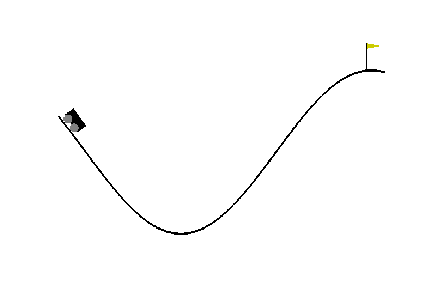
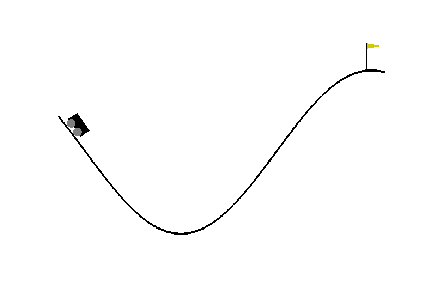
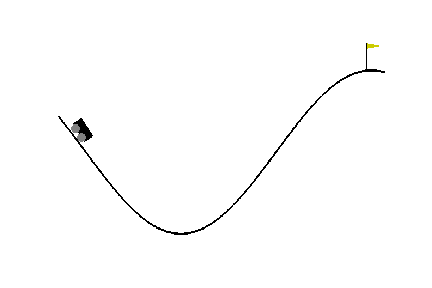
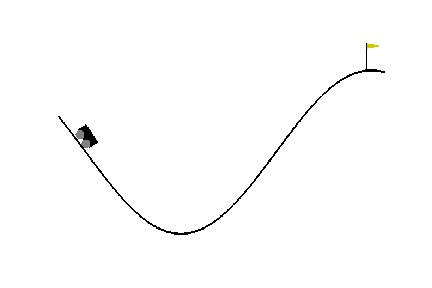
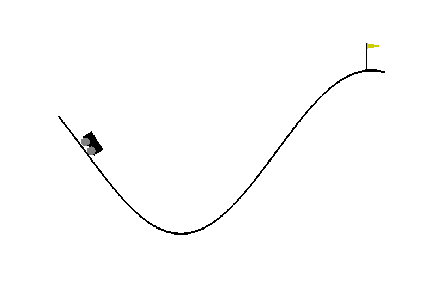
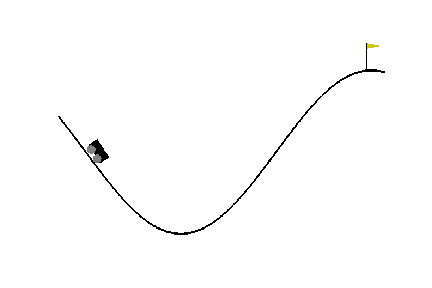
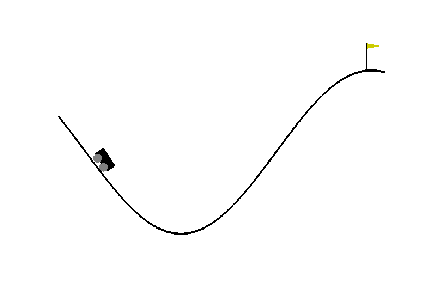
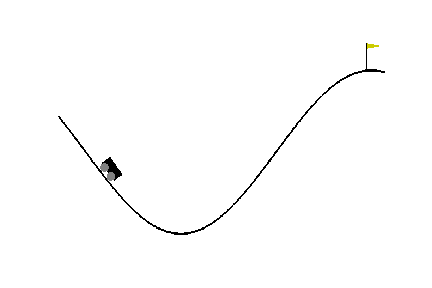
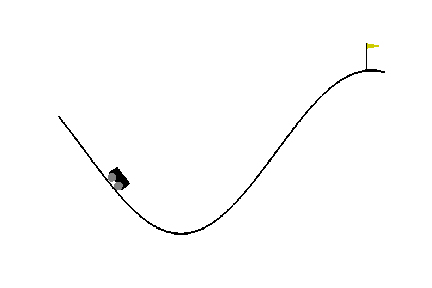
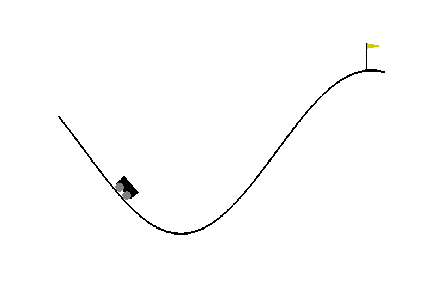
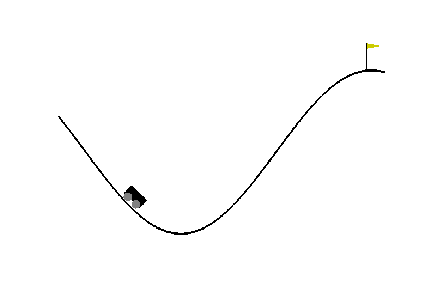
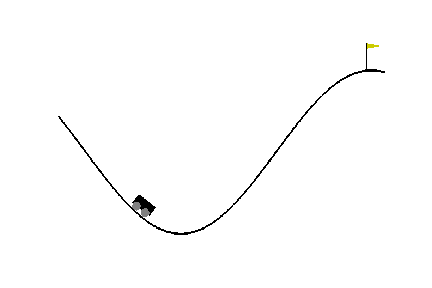
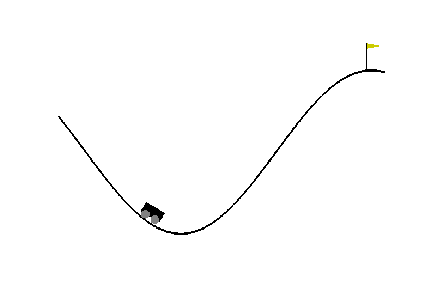
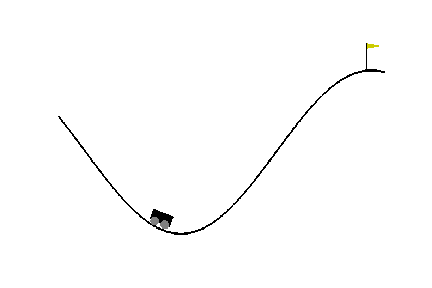
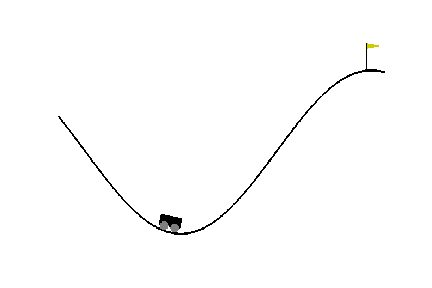
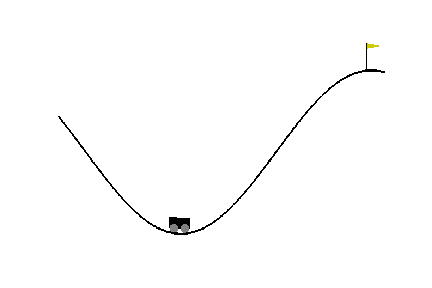
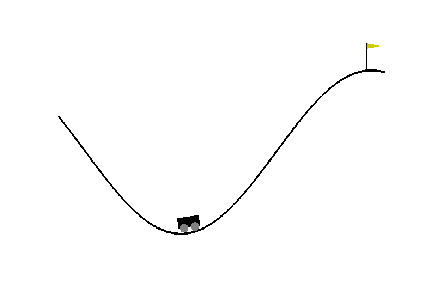
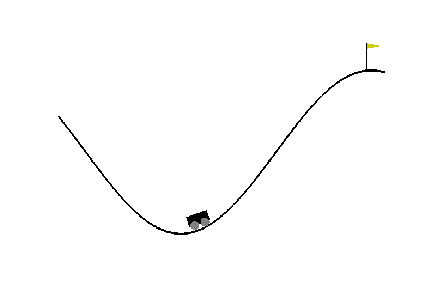
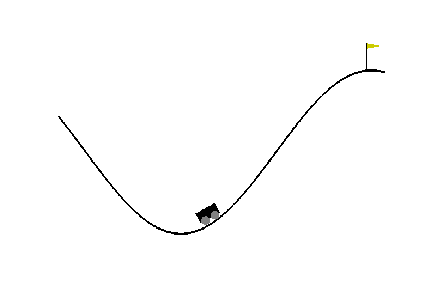
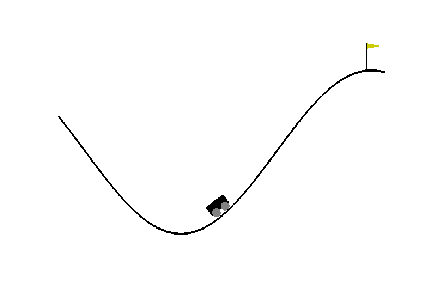
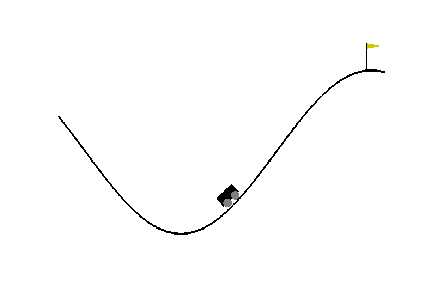
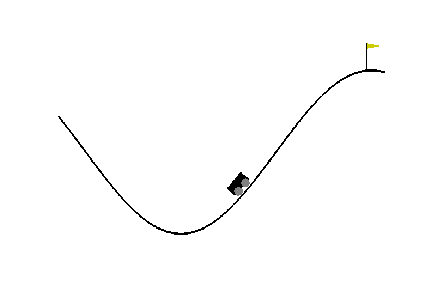
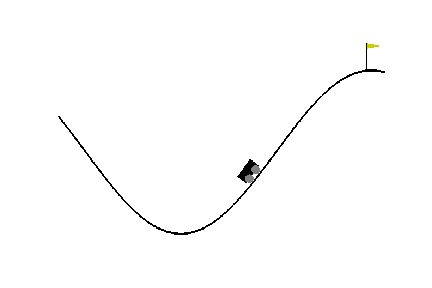
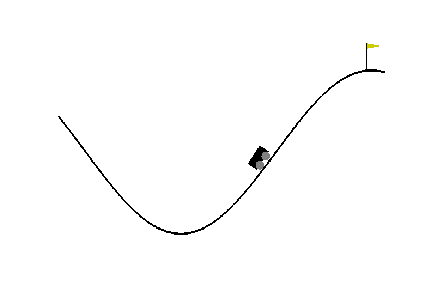
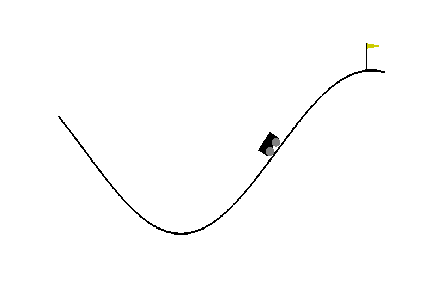
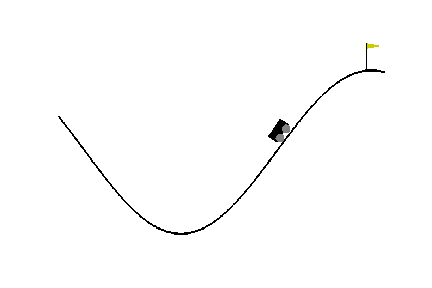
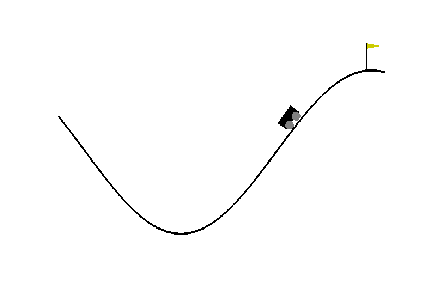
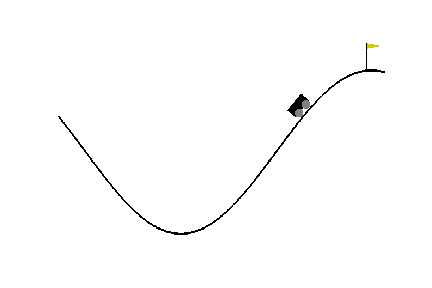
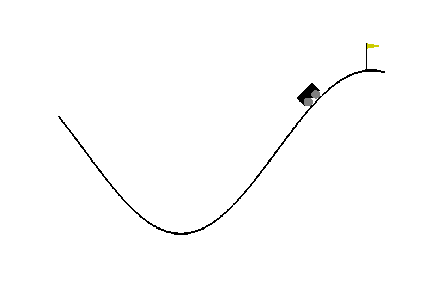
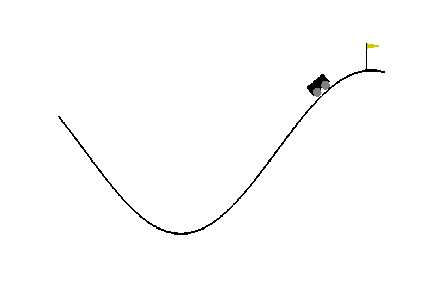
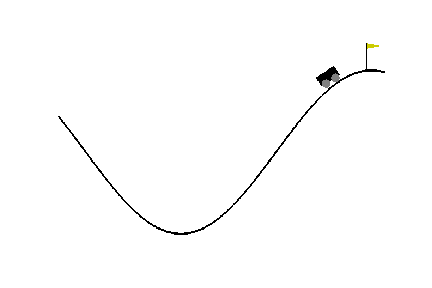
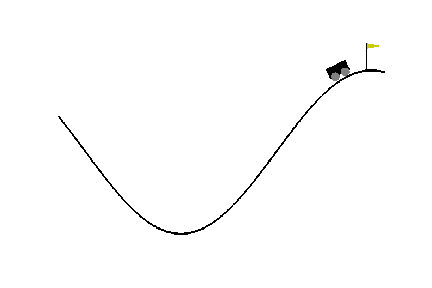
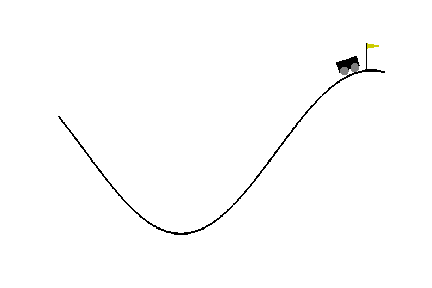
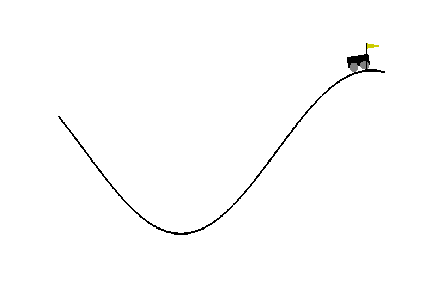

In [6]:
stat = e.train(qtf,episodes=200,plot=True)
e.test(qtf,gif=True)

### PyTorch

In [7]:
qtorch = QLearningTorch(learning_rate=0.01,
                   use_bias=True,featurizer=featurizer,scaler=scaler)

  0%|          | 0/200 [00:00<?, ?it/s]

Model Created!


Epsilon : 2.505568501063291e-175, Num Steps : 199, Avg Reward with Window Size 25 : -174.64: 100%|██████████| 200/200 [00:44<00:00,  4.51it/s]          
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


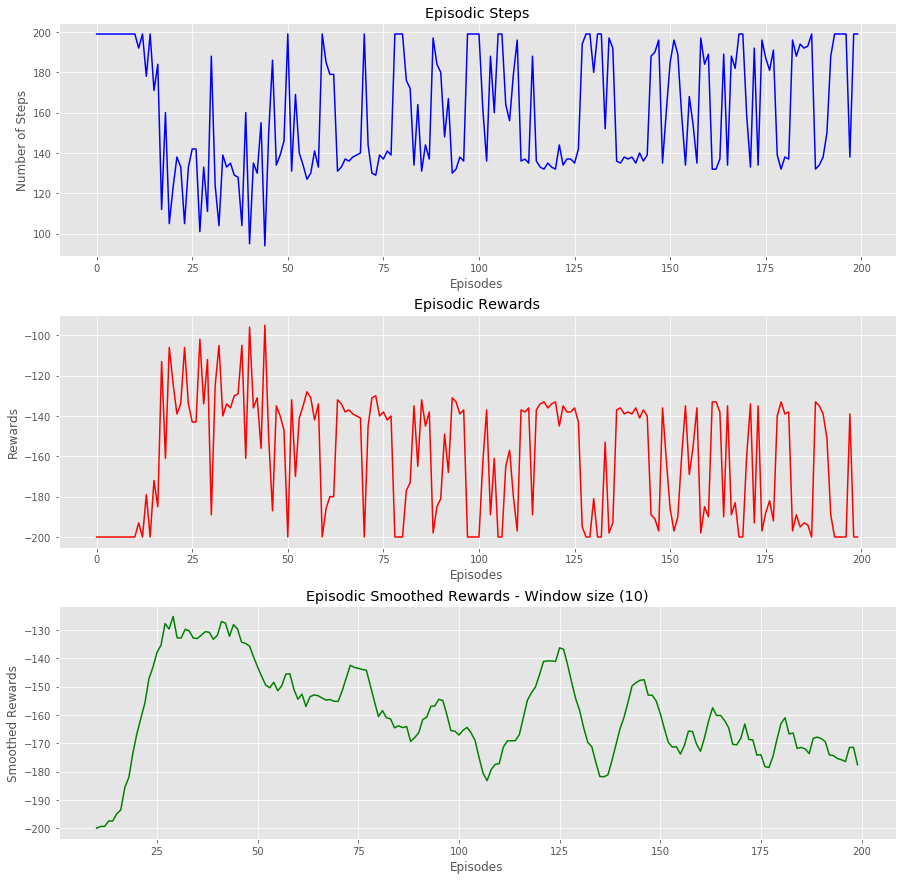

Total reward for episode 0: -191.0



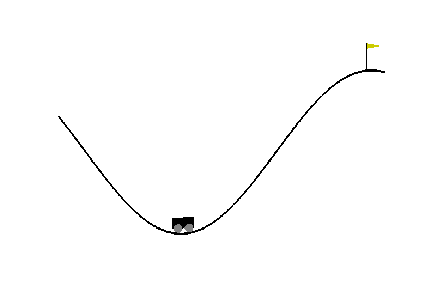
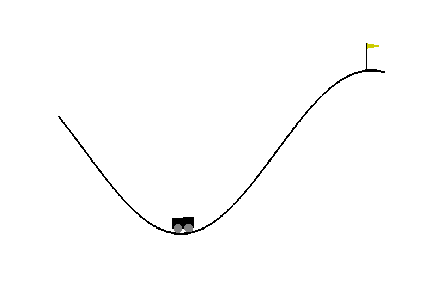
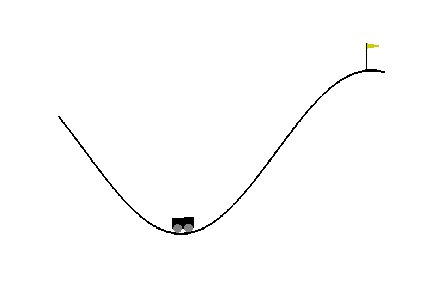
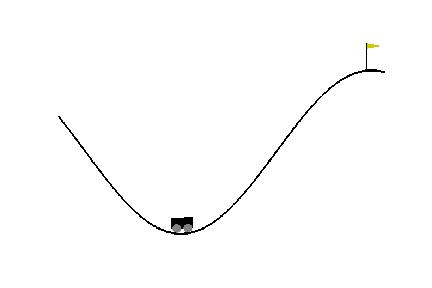
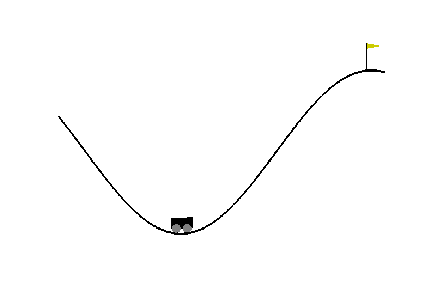
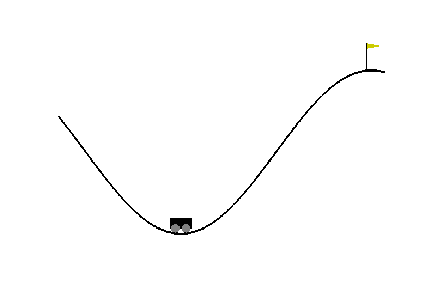
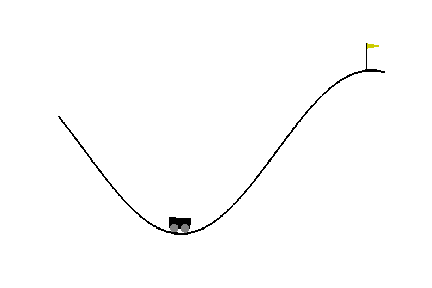
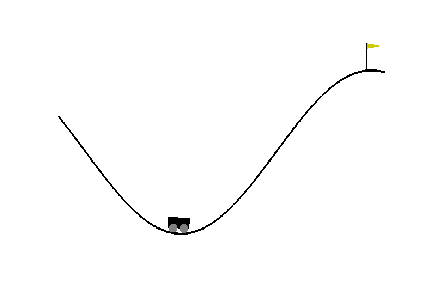
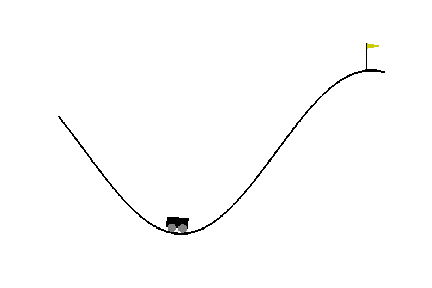
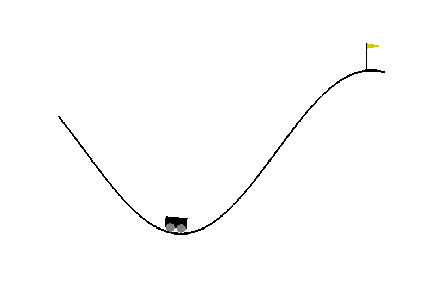
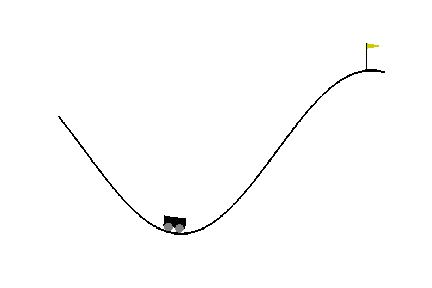
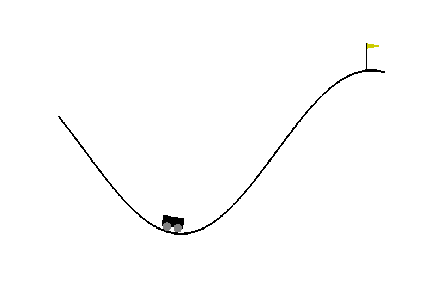
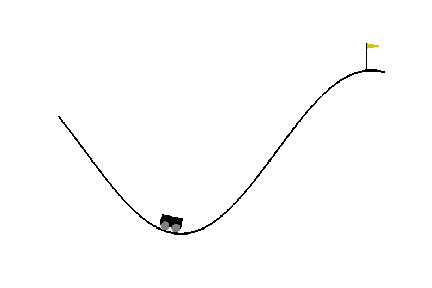
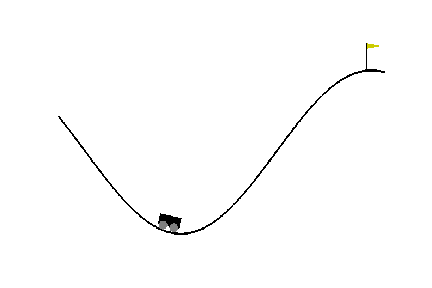
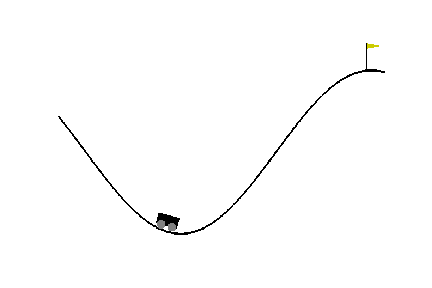
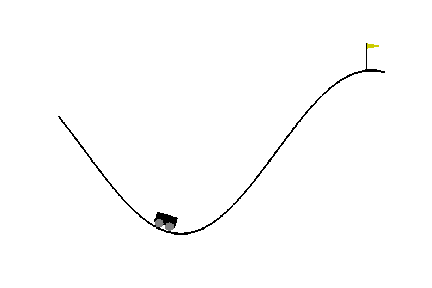
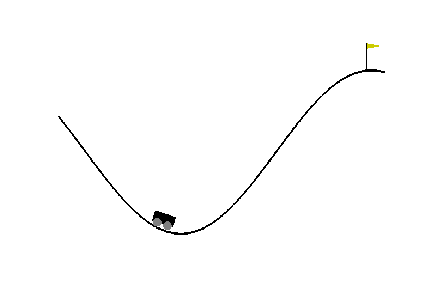
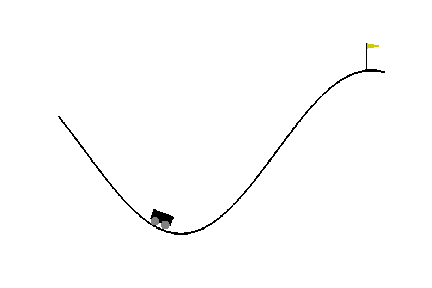
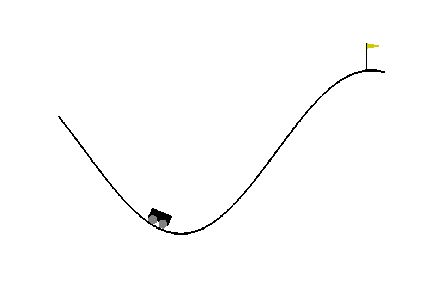
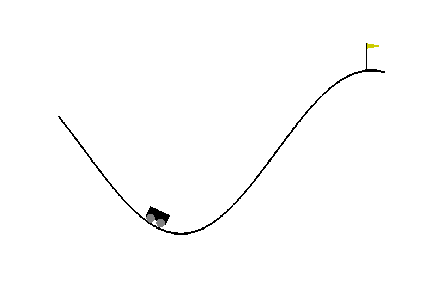
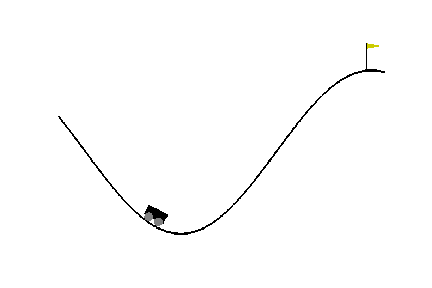
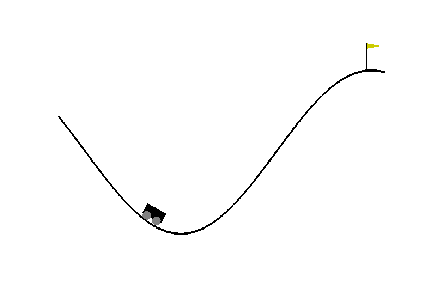
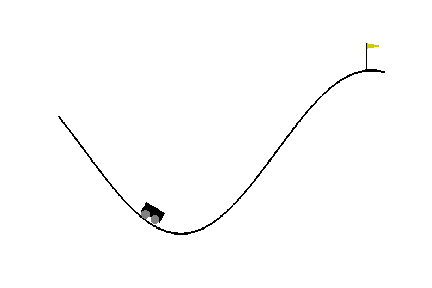
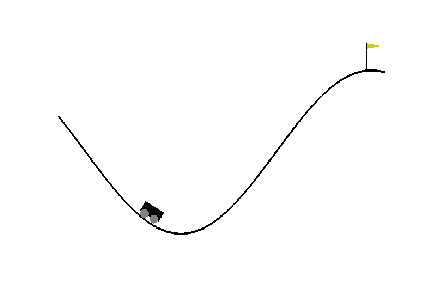
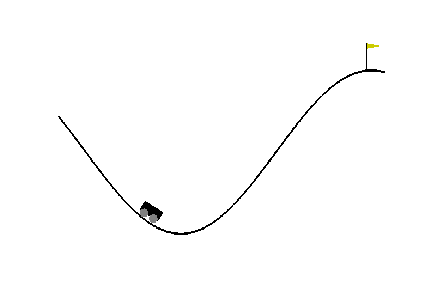
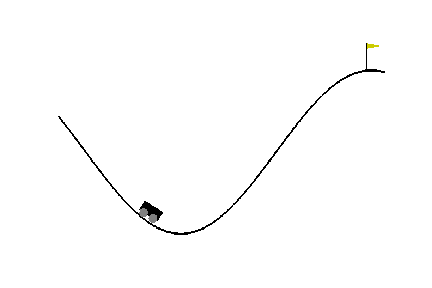
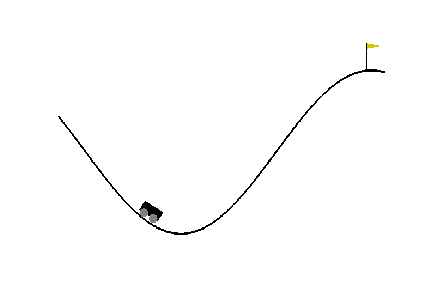
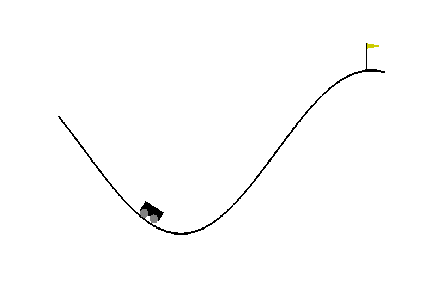
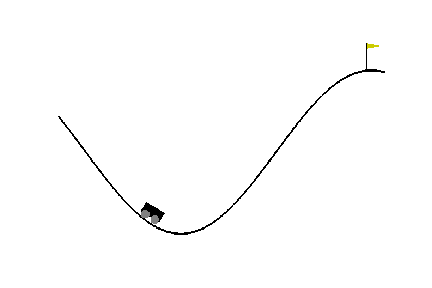
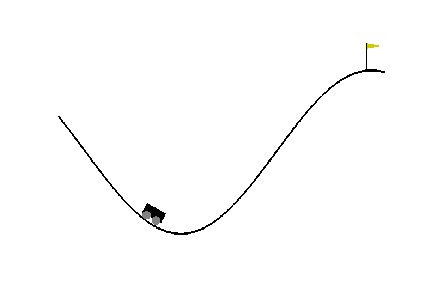
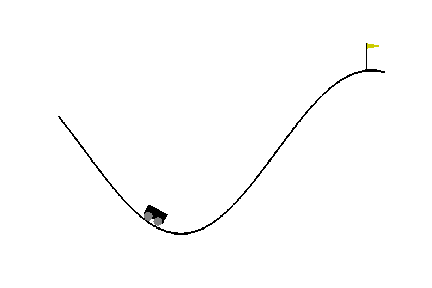
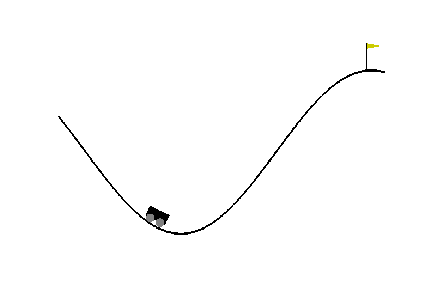
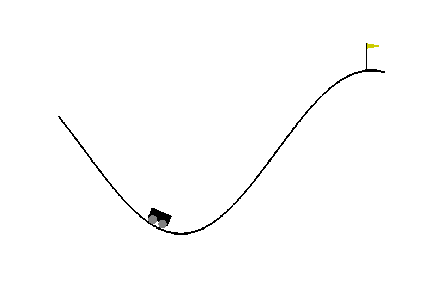
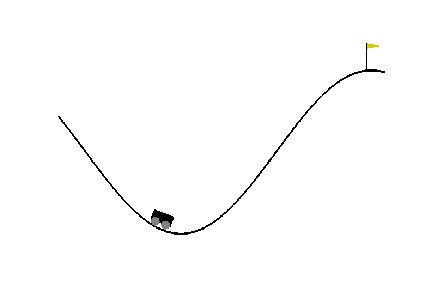
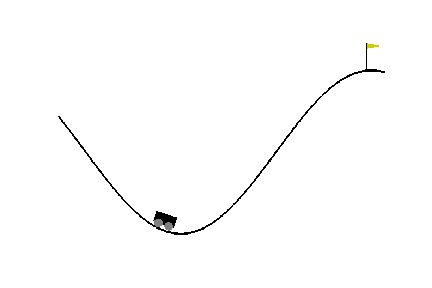
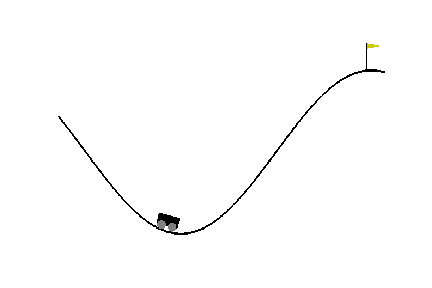
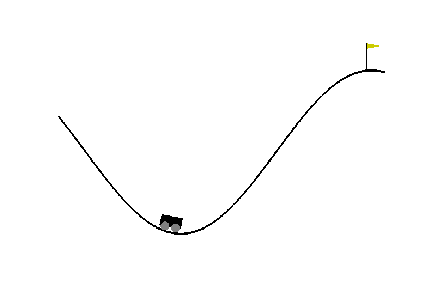
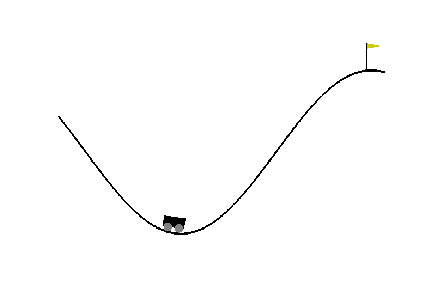
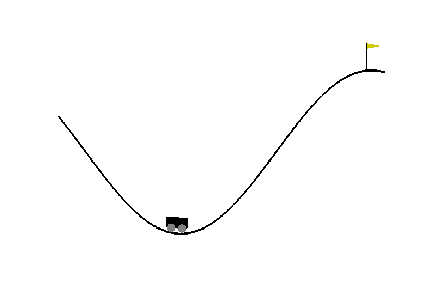
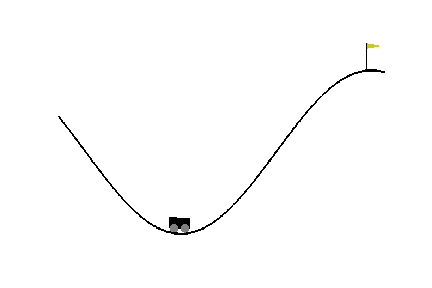
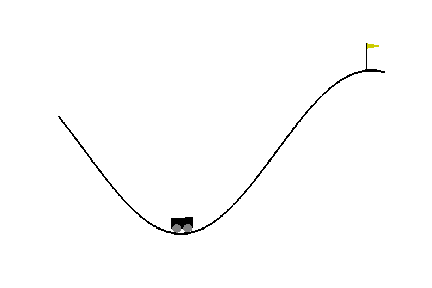
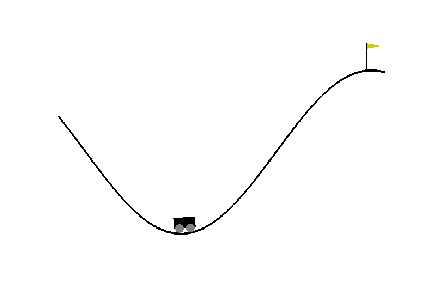
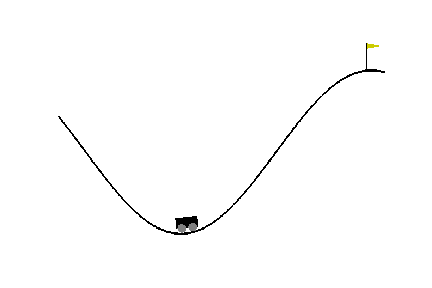
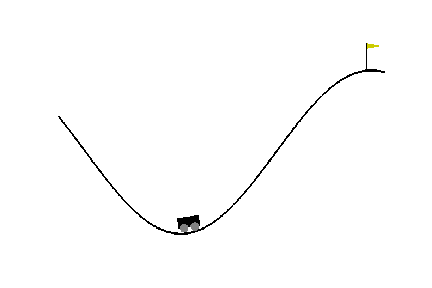
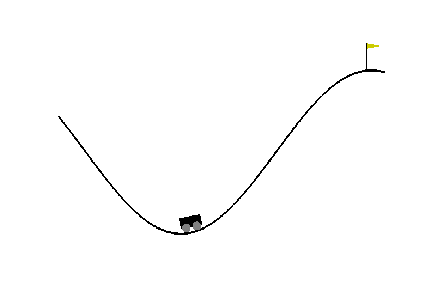
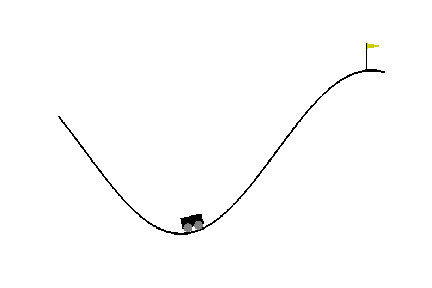
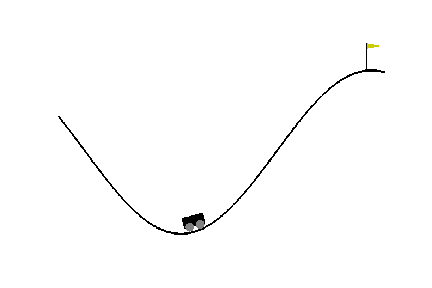
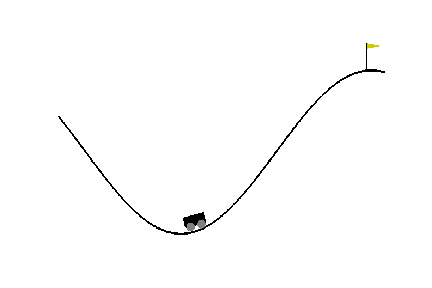
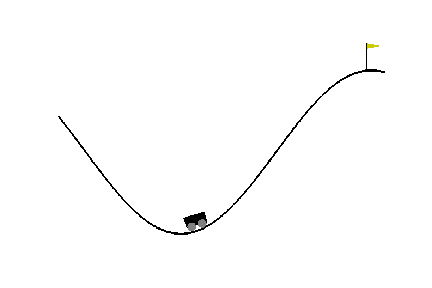
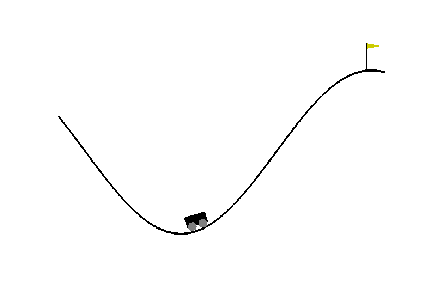
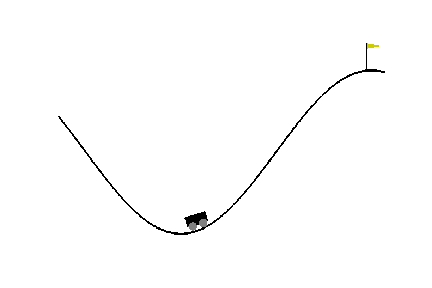
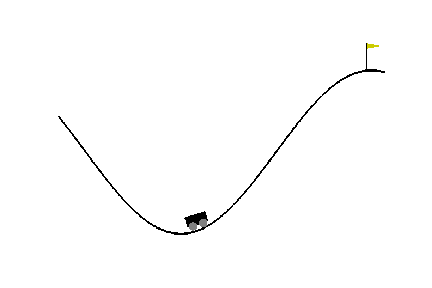
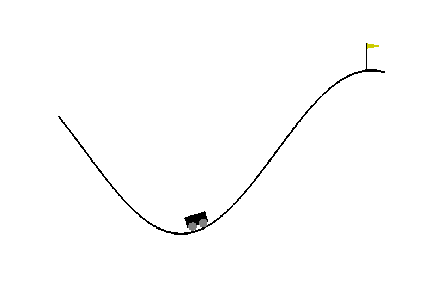
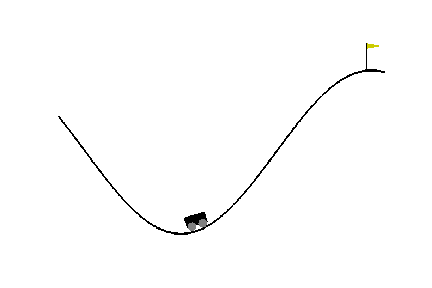
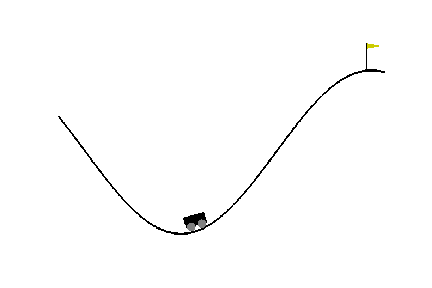
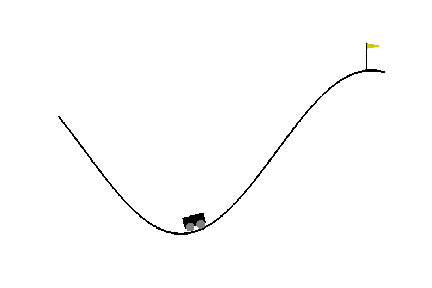
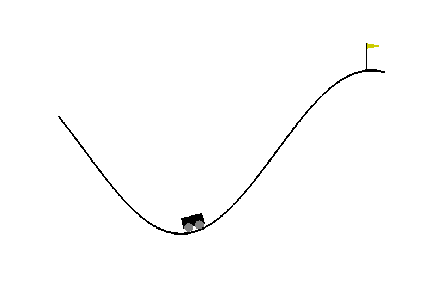
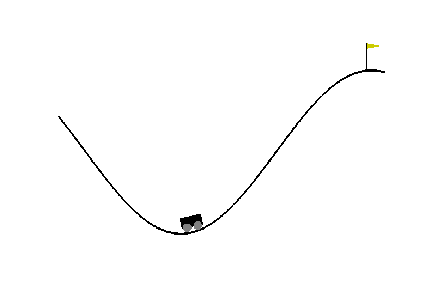
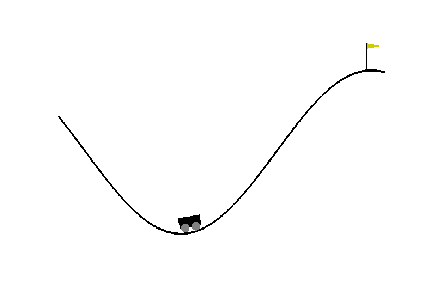
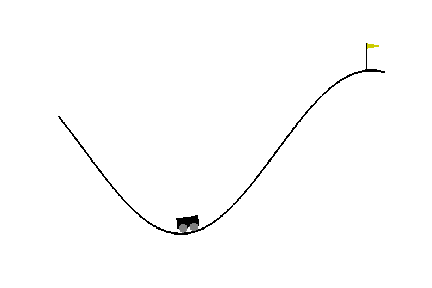
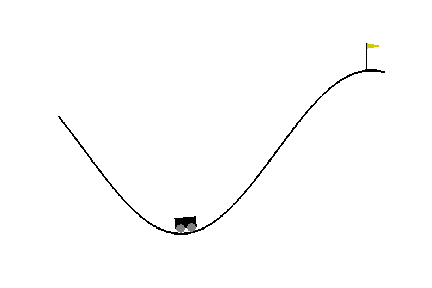
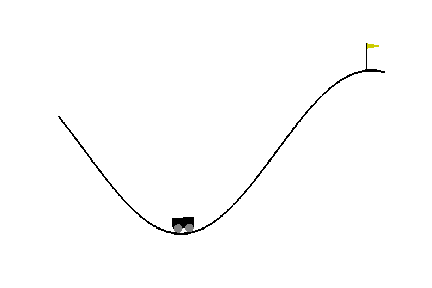
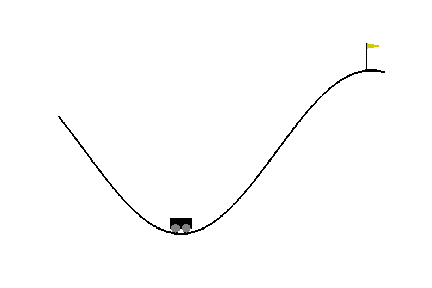
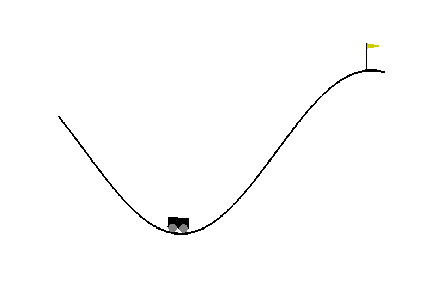
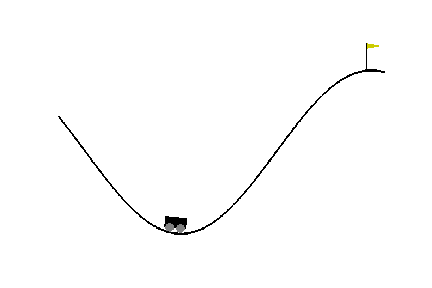
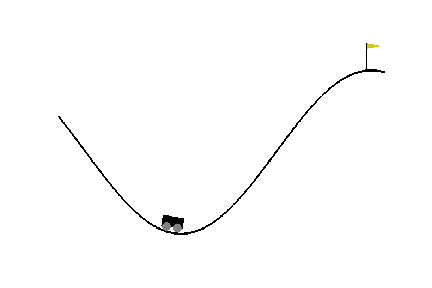
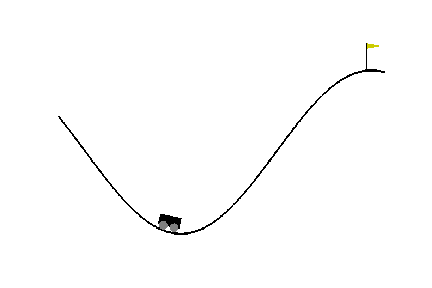
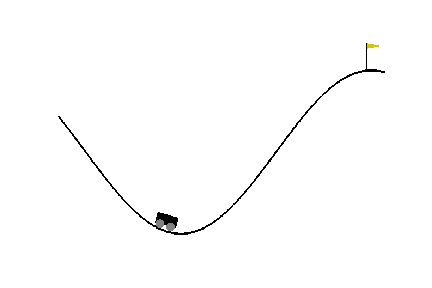
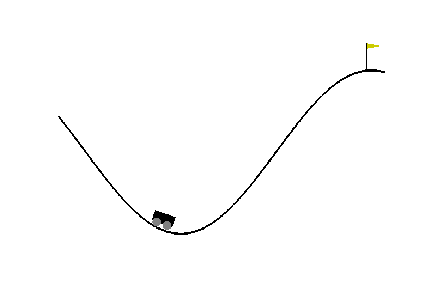
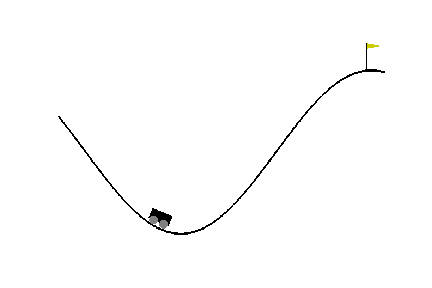
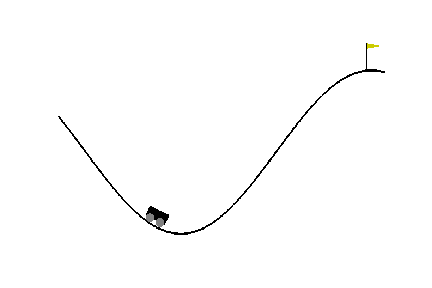
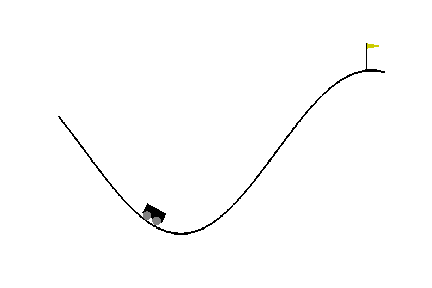
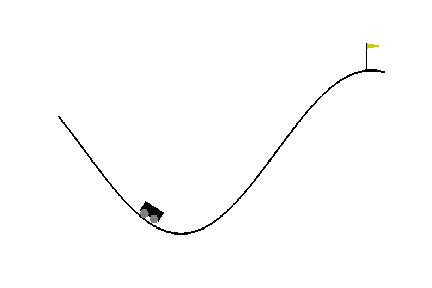
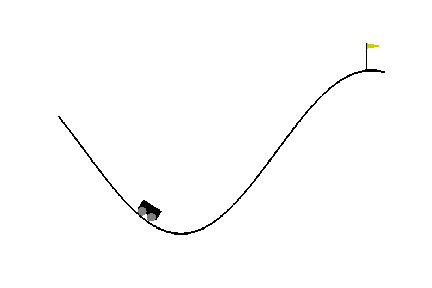
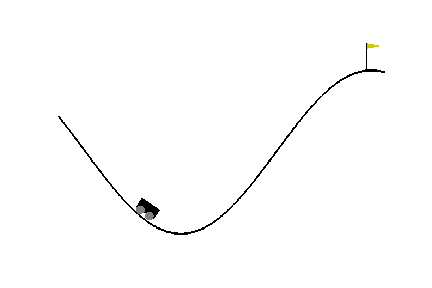
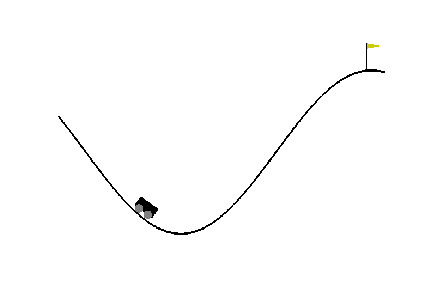
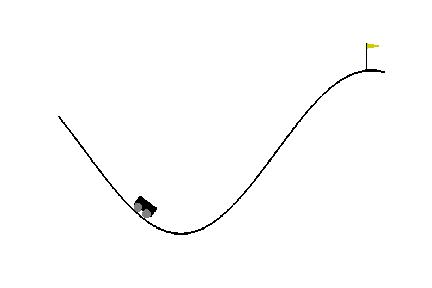
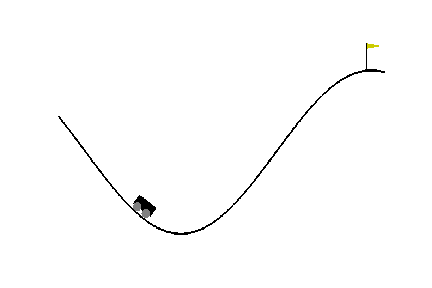
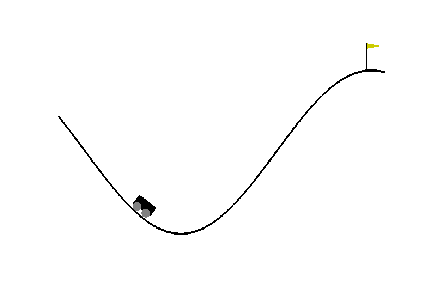
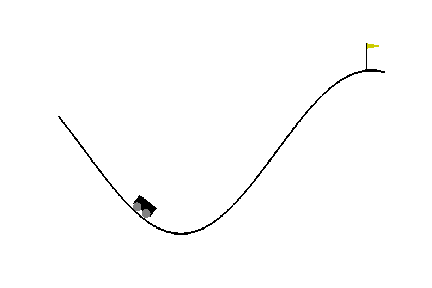
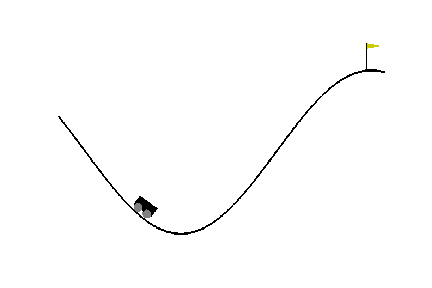
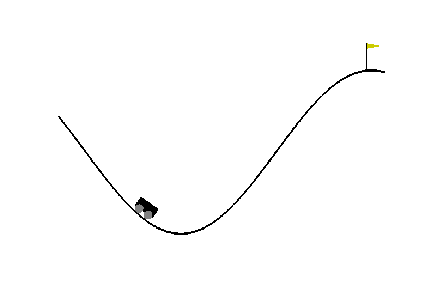
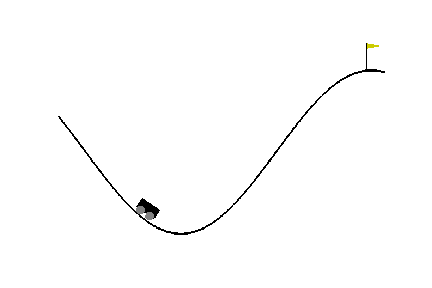
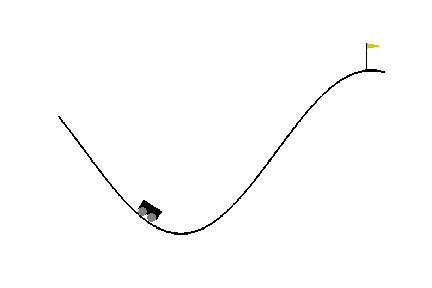
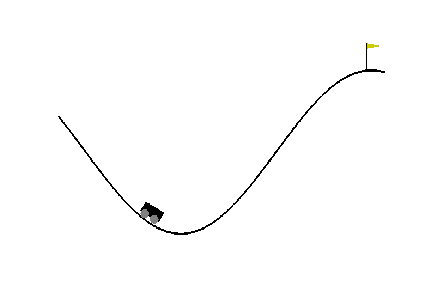
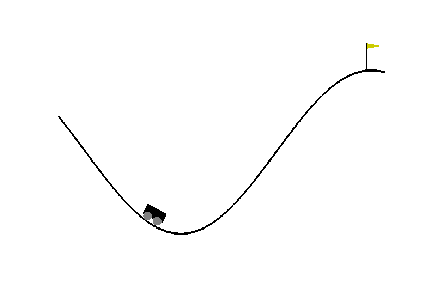
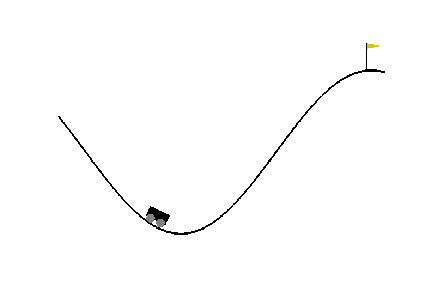
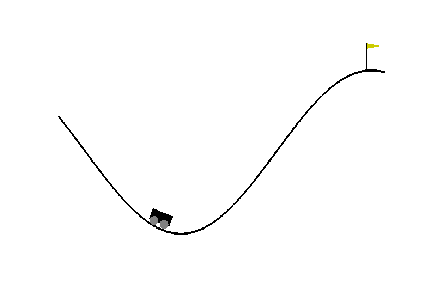
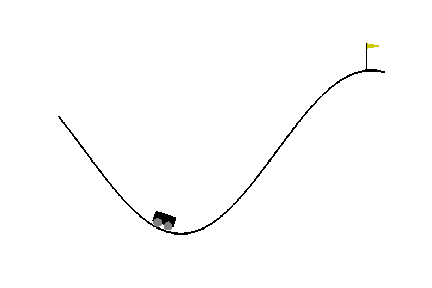
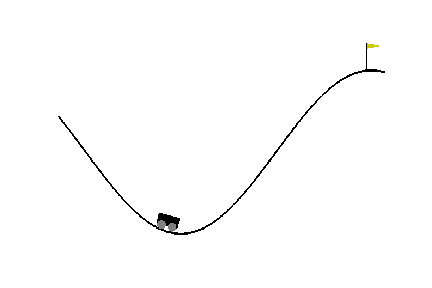
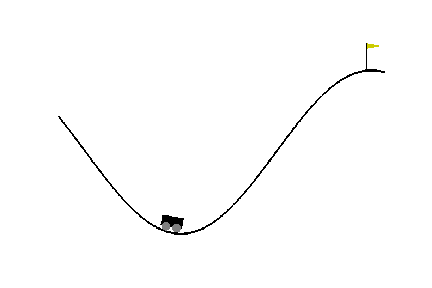
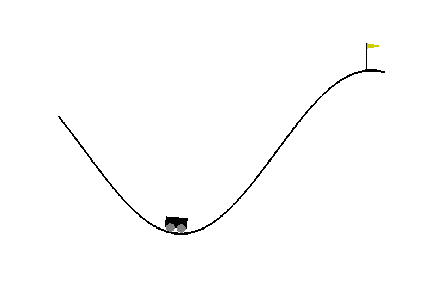
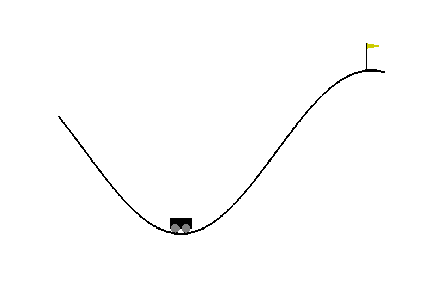
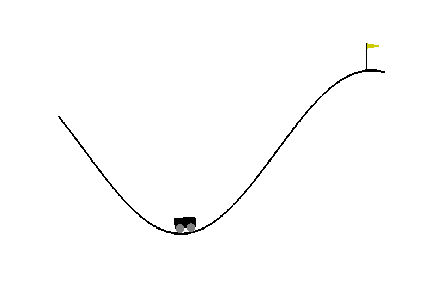
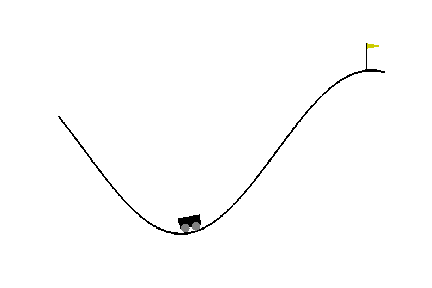
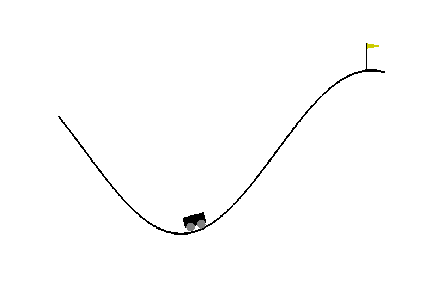
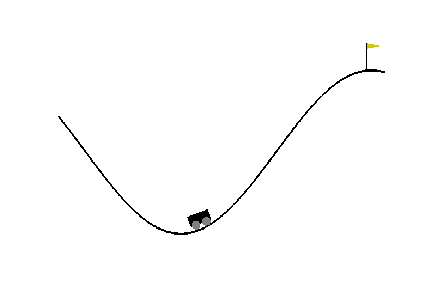
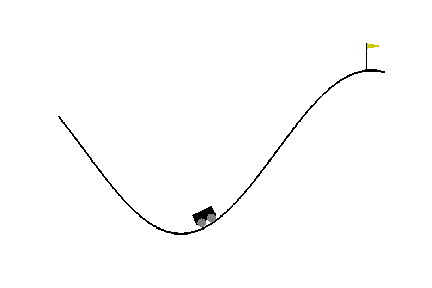
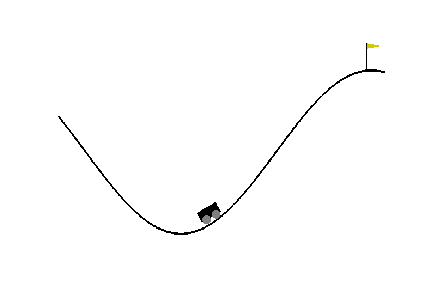
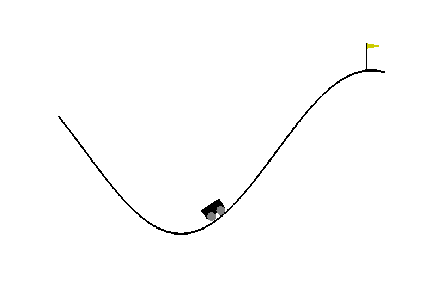
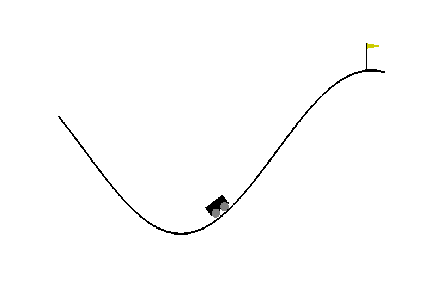
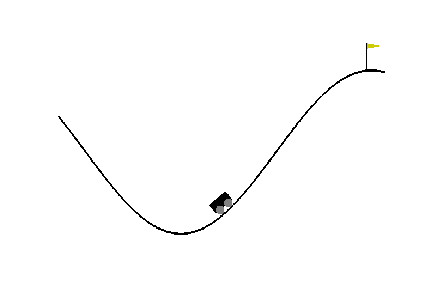
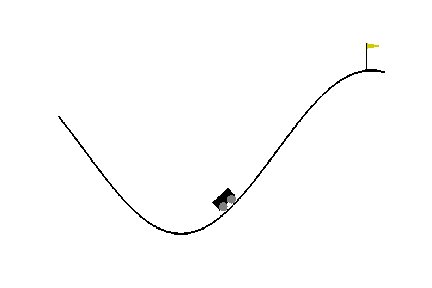
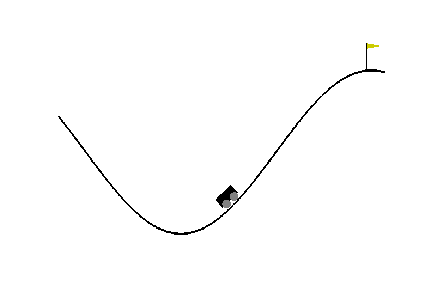
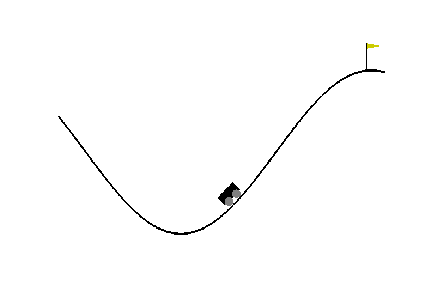
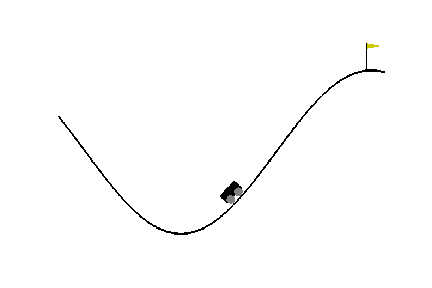
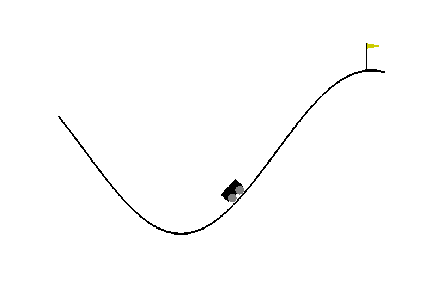
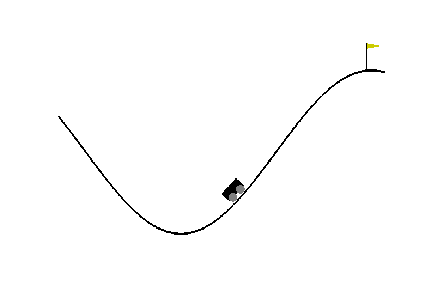
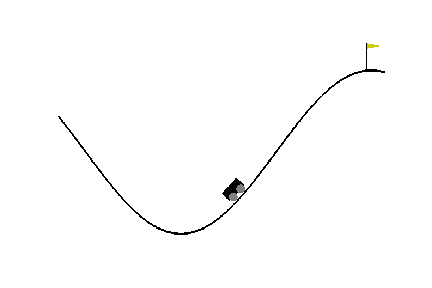
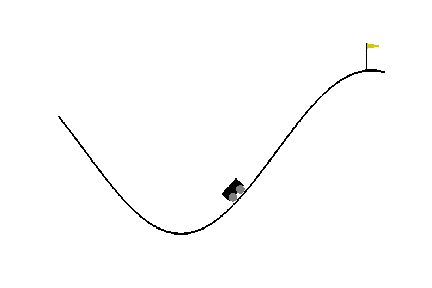
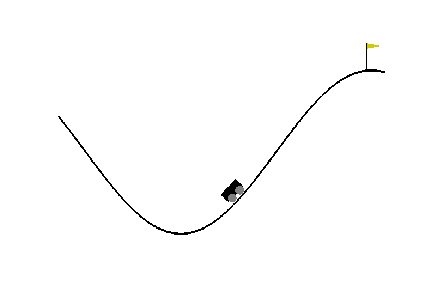
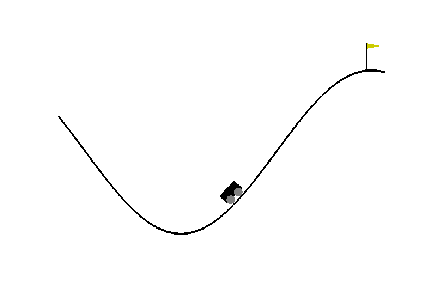
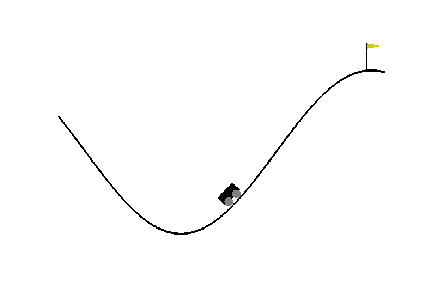
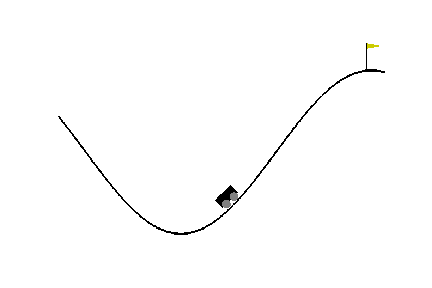
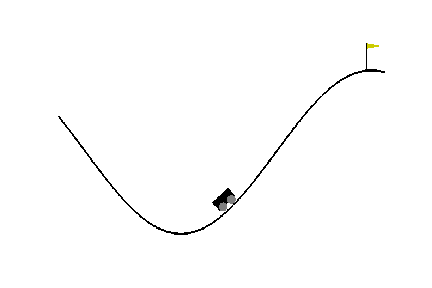
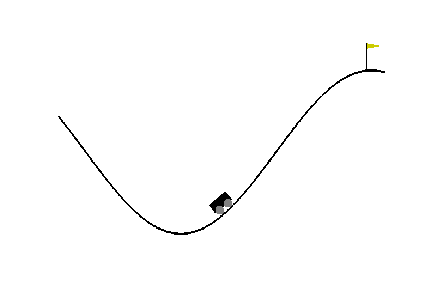
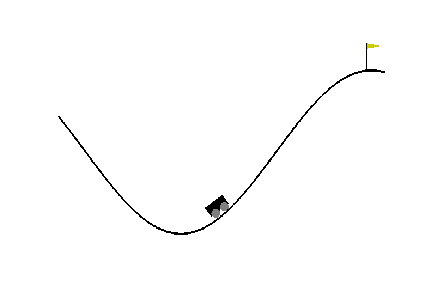
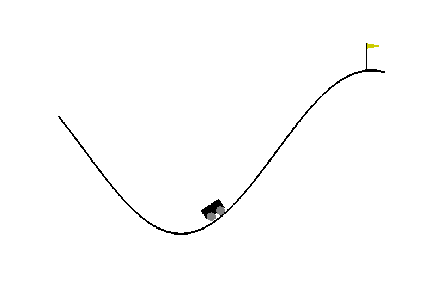
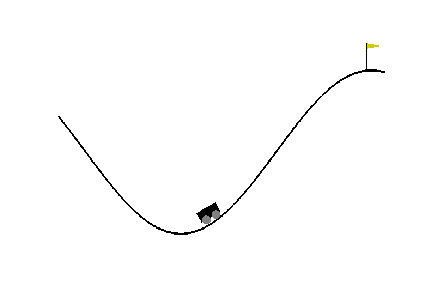
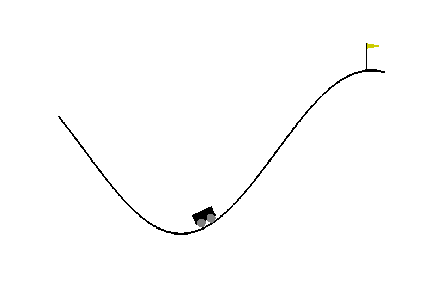
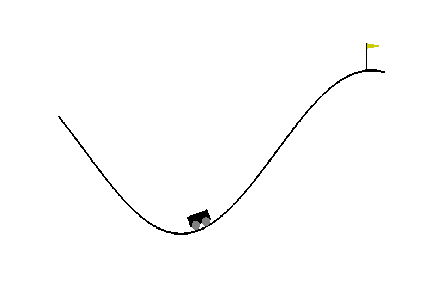
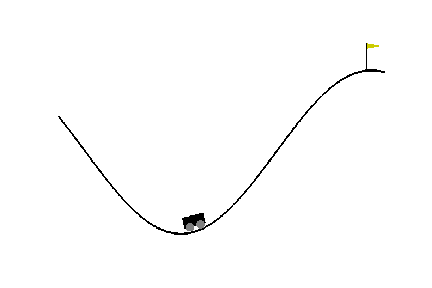
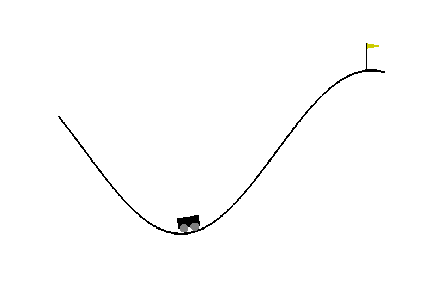
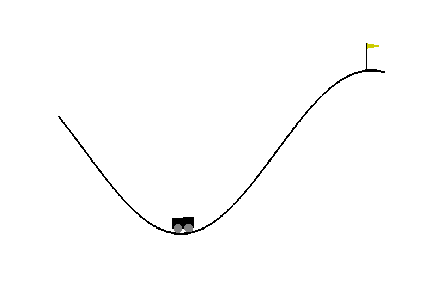
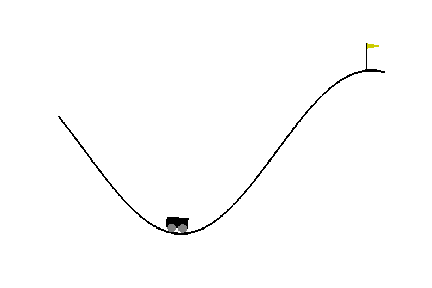
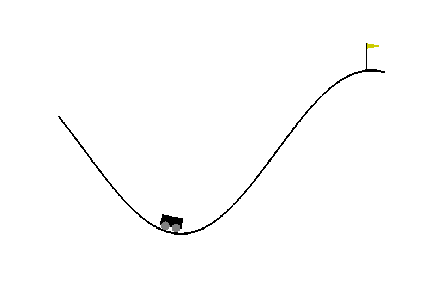
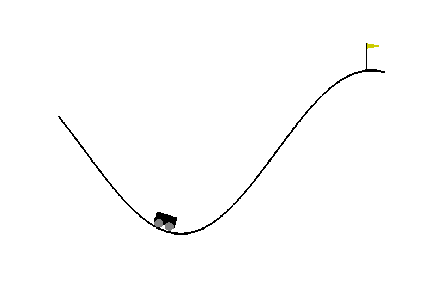
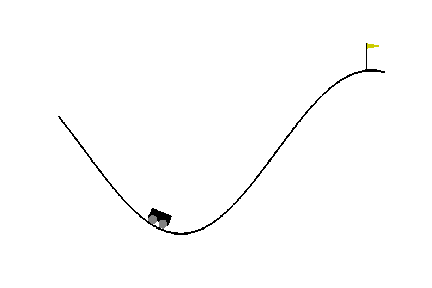
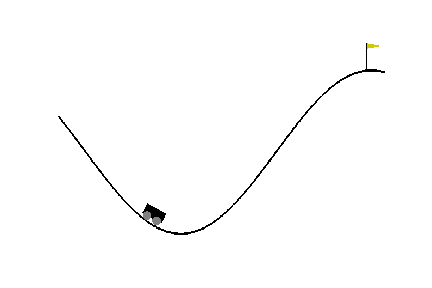
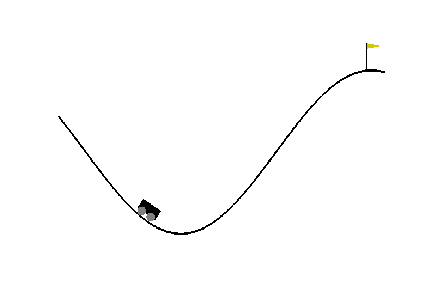
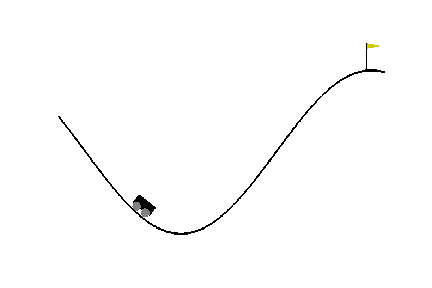
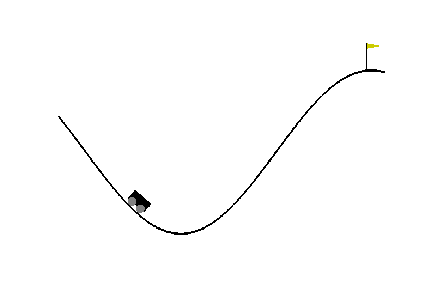
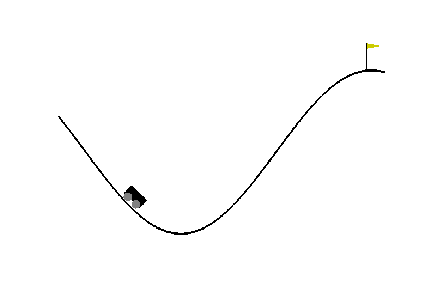
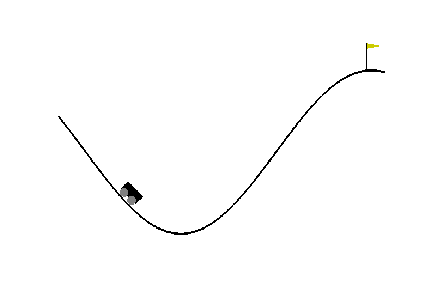
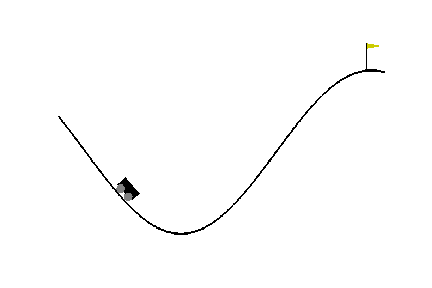
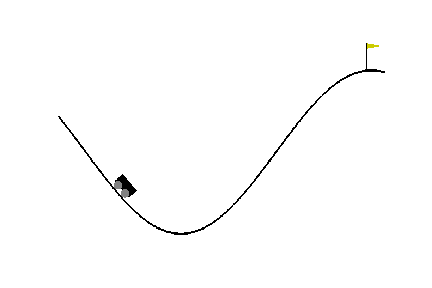
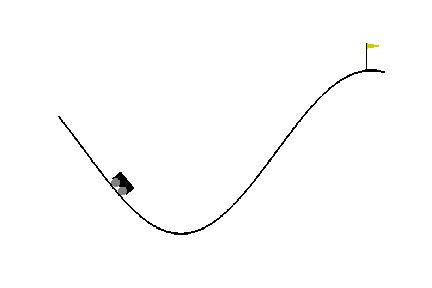
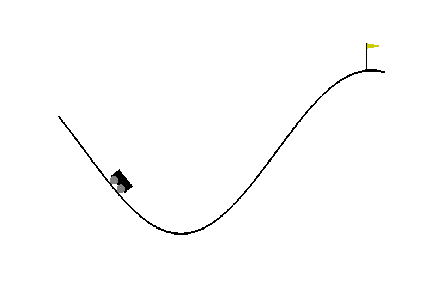
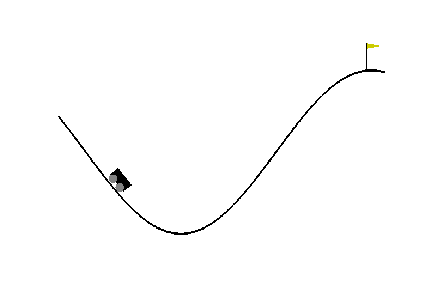
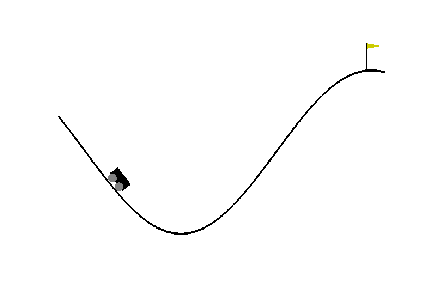
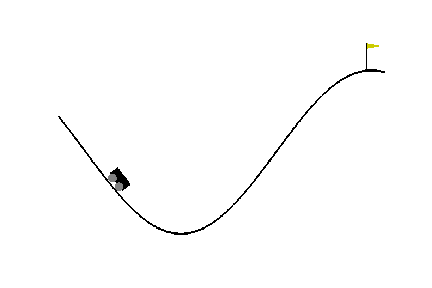
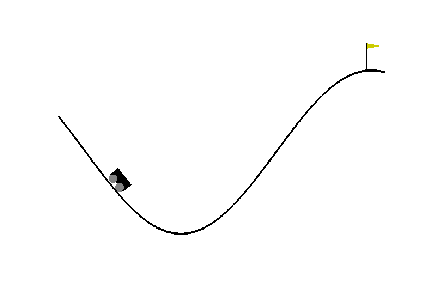
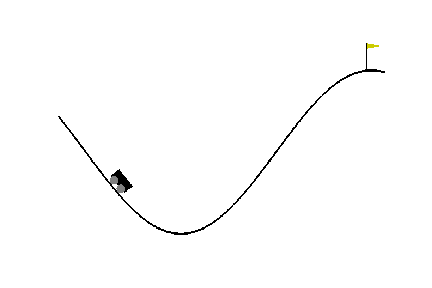
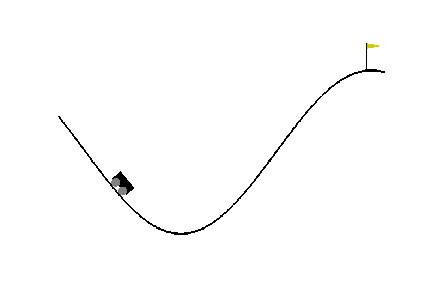
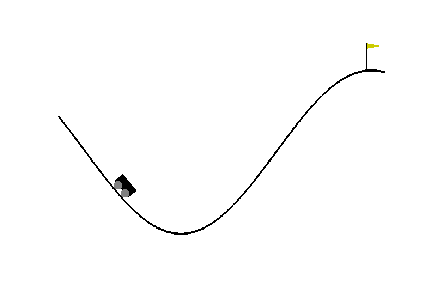
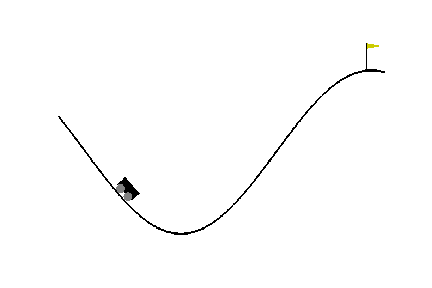
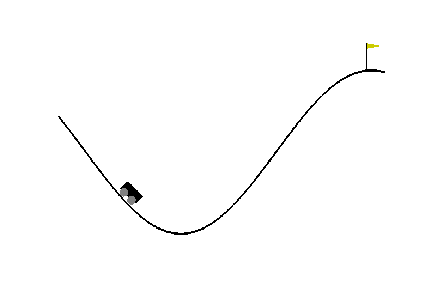
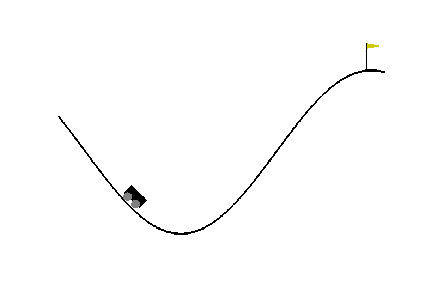
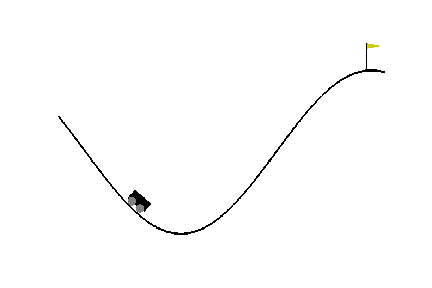
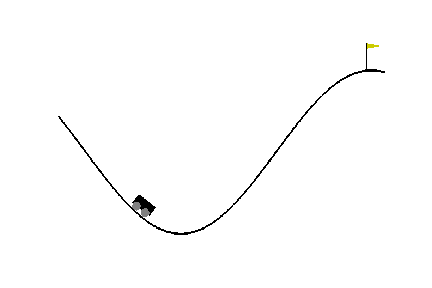
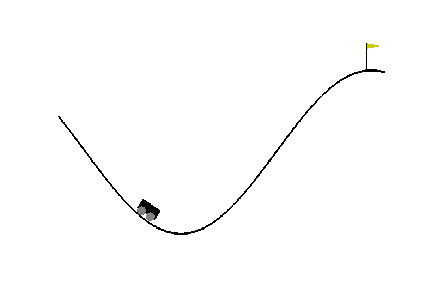
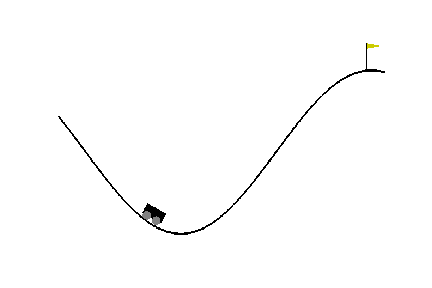
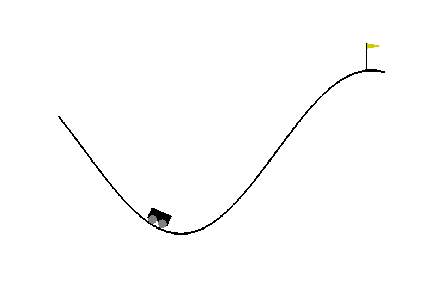
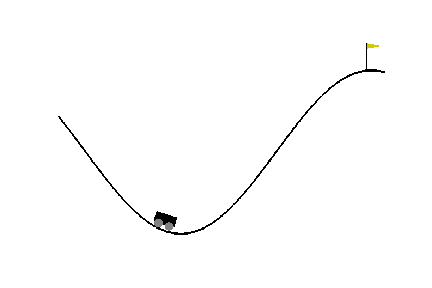
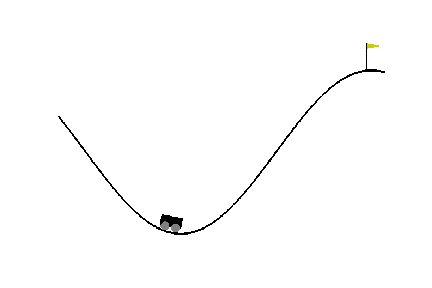
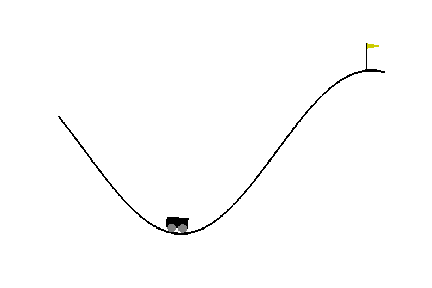
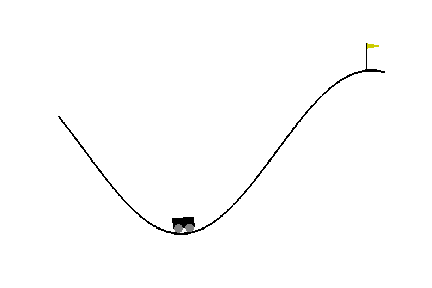
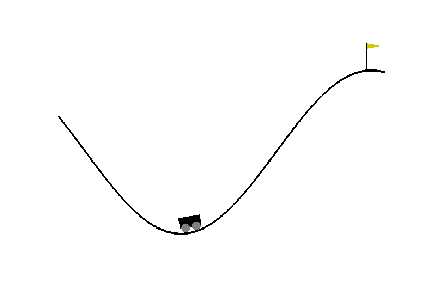
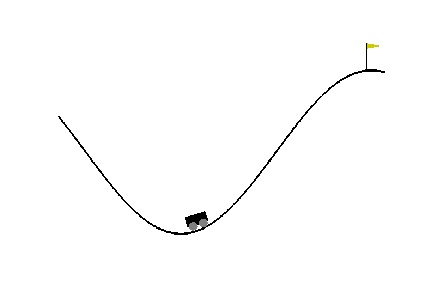
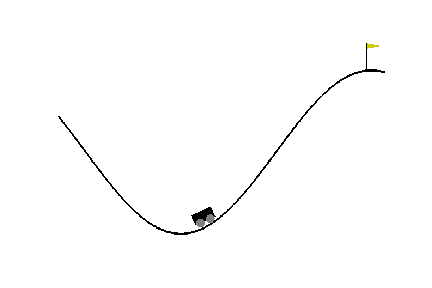
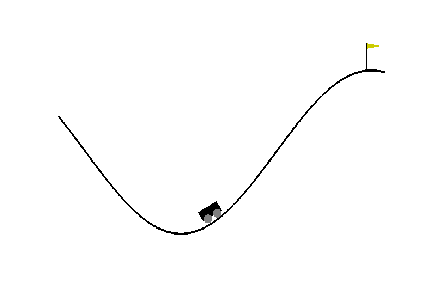
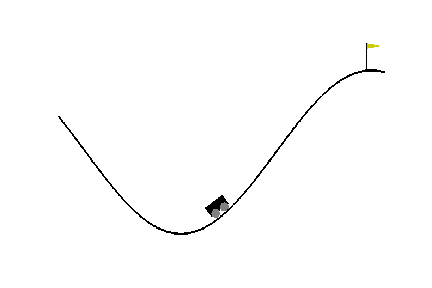
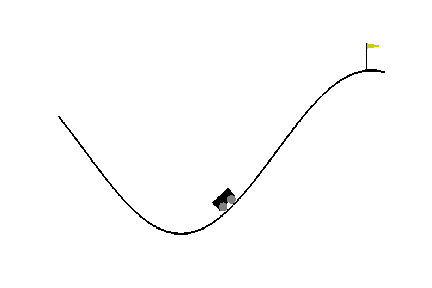
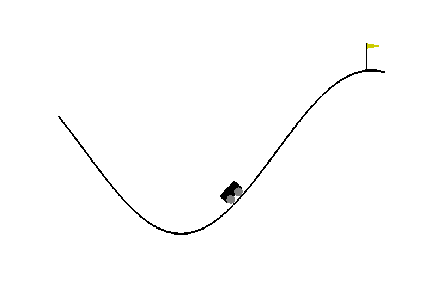
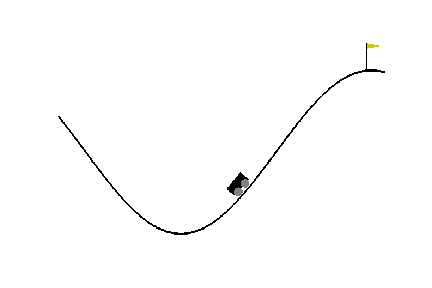
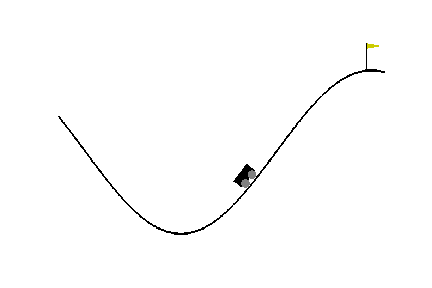
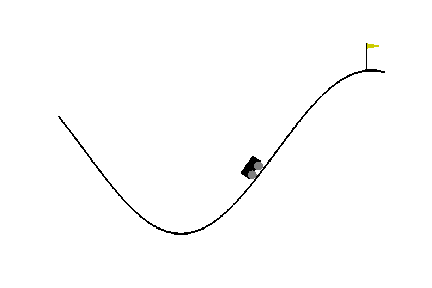
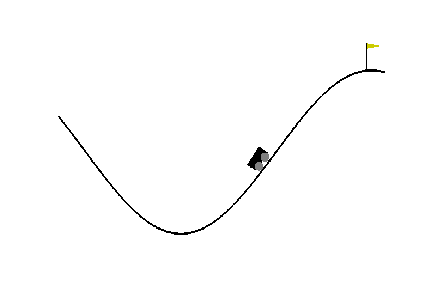
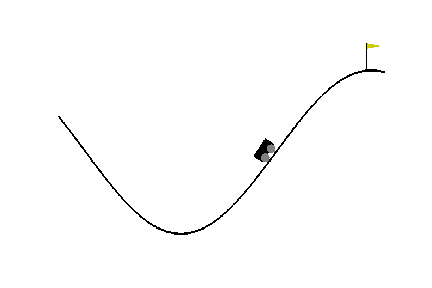
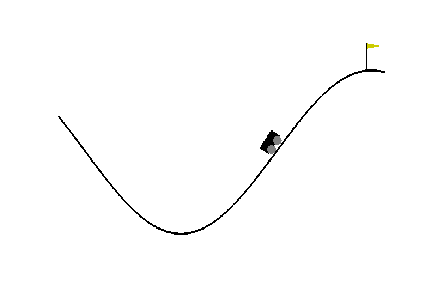
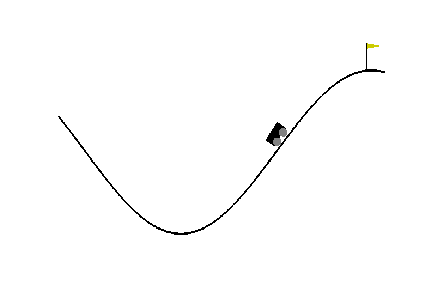
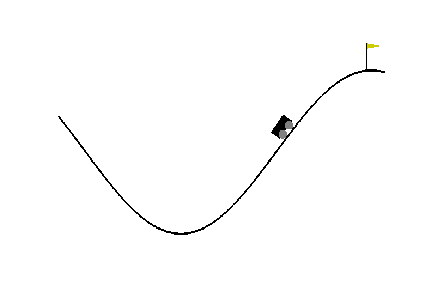
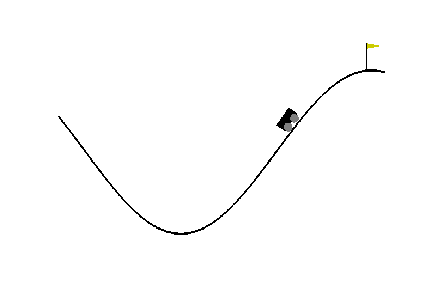
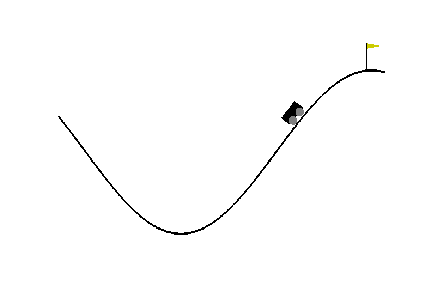
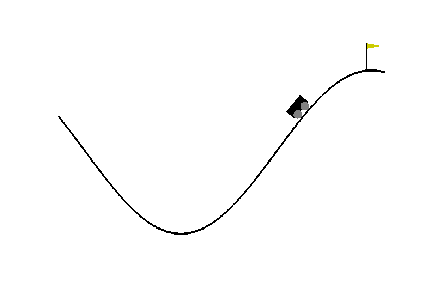
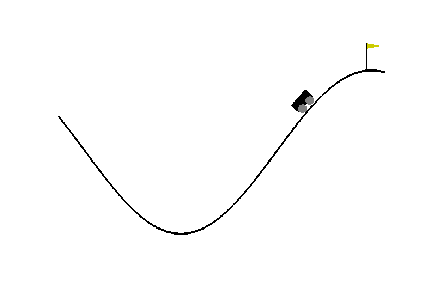
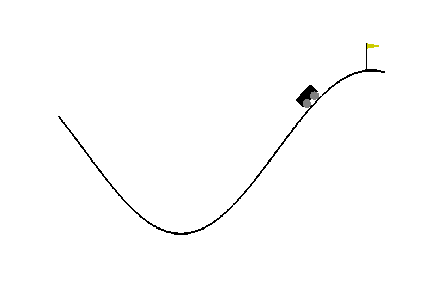
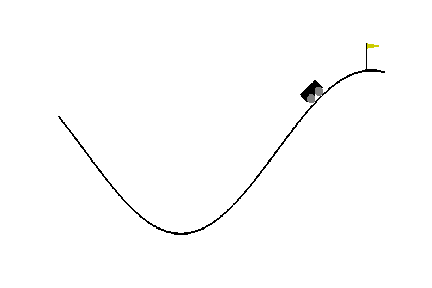
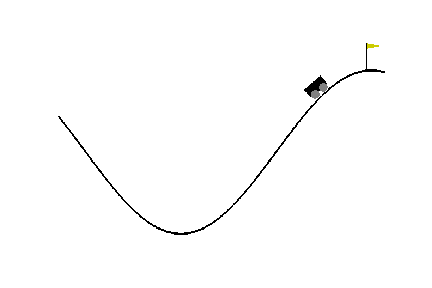
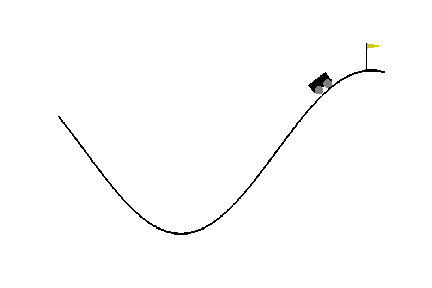
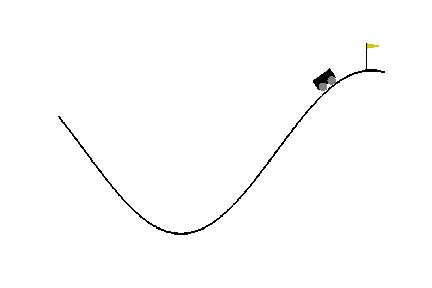
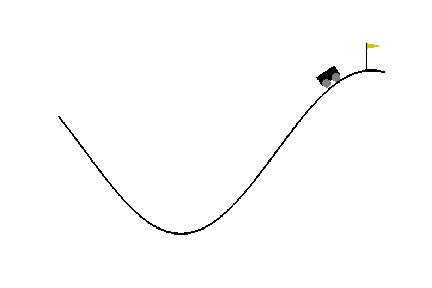
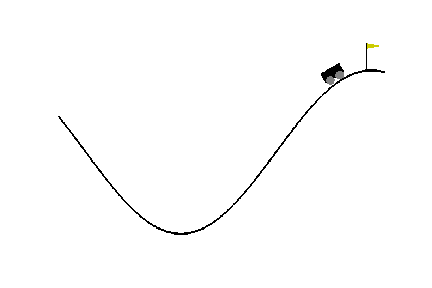
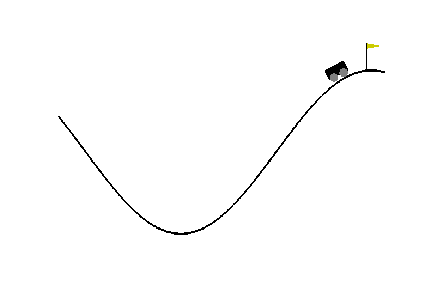
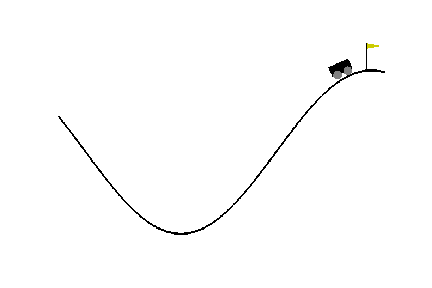
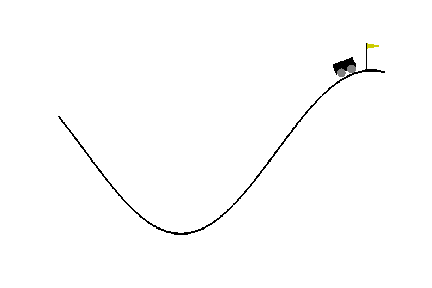
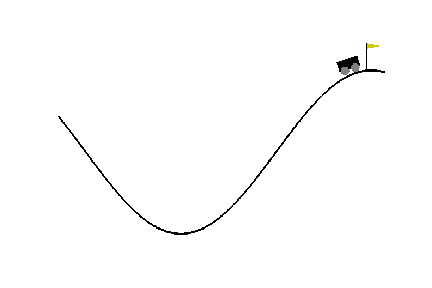
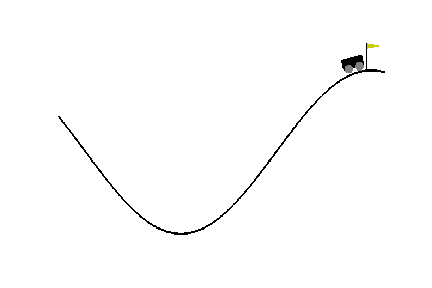
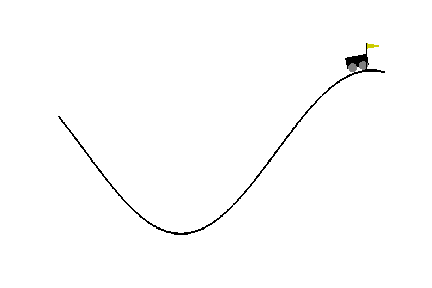
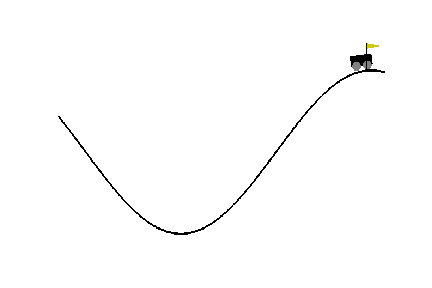
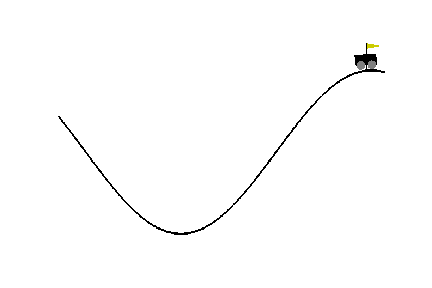

In [8]:
stat = e.train(episodes=200,agent=qtorch,plot=True)
e.test(qtorch,gif=True)

## Without Featurizing

### Tensorflow

In [9]:
qtf = QLearningTF(use_bias=True,featurizer=None,scaler=None)

  0%|          | 0/100 [00:00<?, ?it/s]

Model Created!


Epsilon : 3.7074446659261245e-44, Num Steps : 199, Avg Reward with Window Size 25 : -200.0: 100%|██████████| 100/100 [01:55<00:00,  1.16s/it]
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


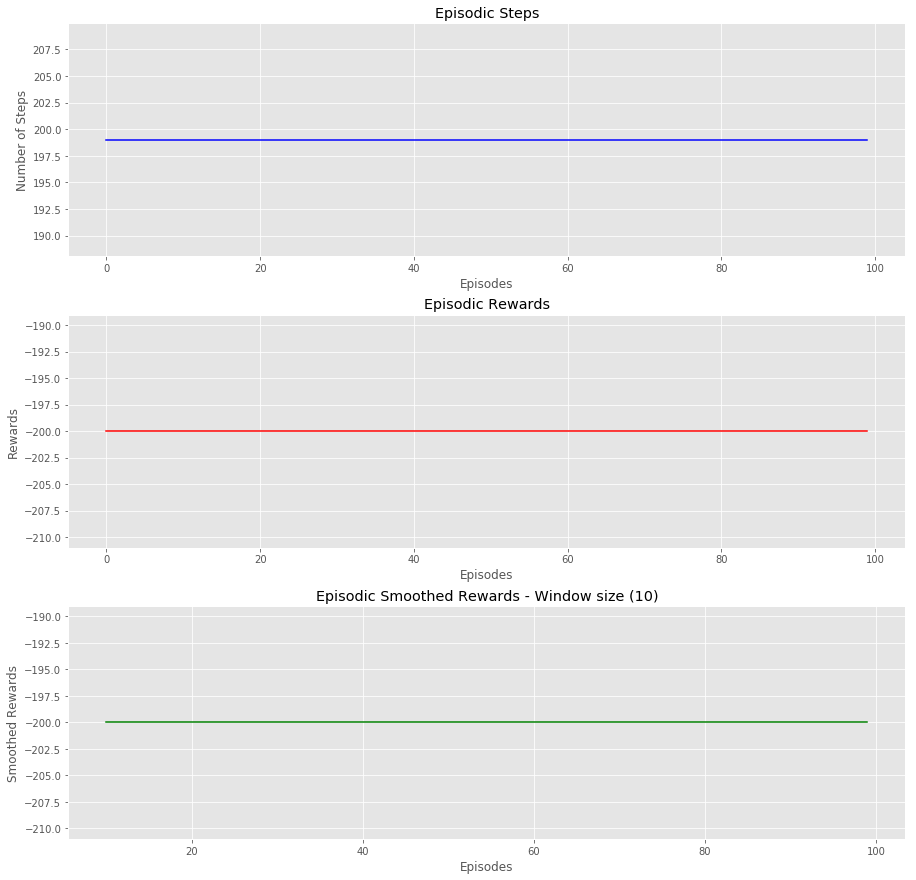

Total reward for episode 0: -200.0



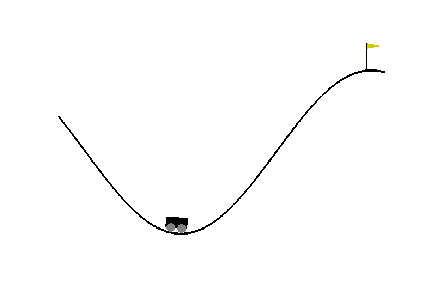
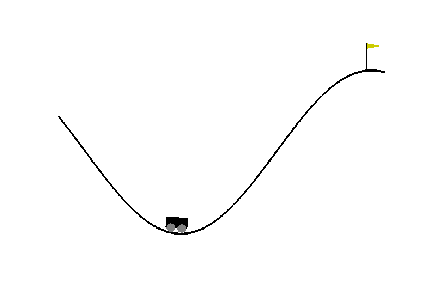
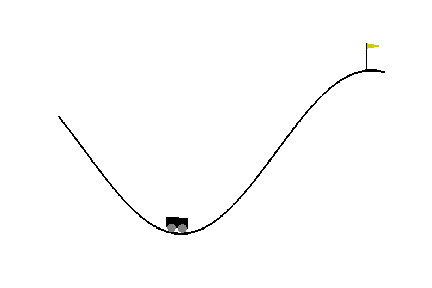
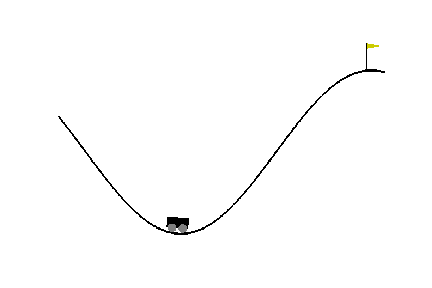
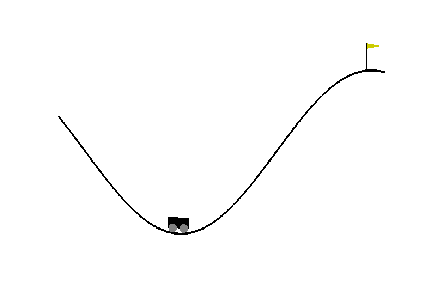
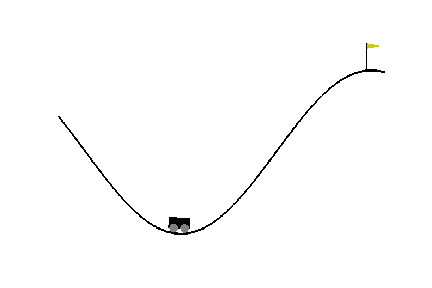
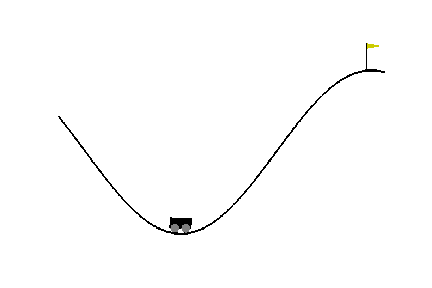
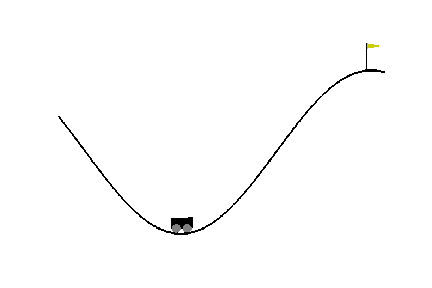
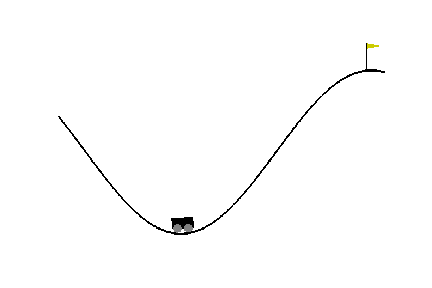
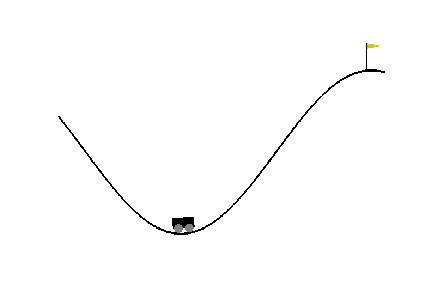
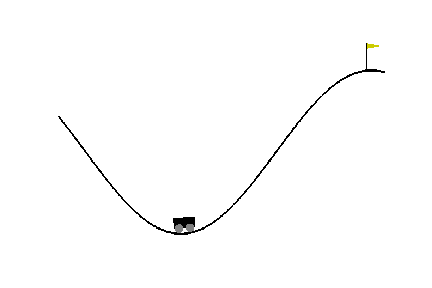
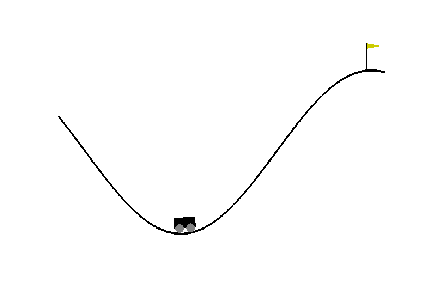
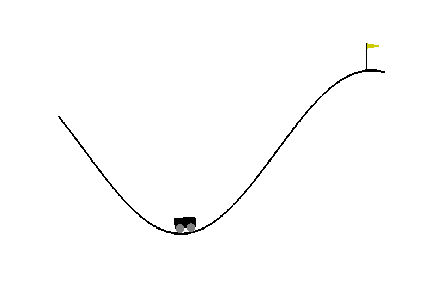
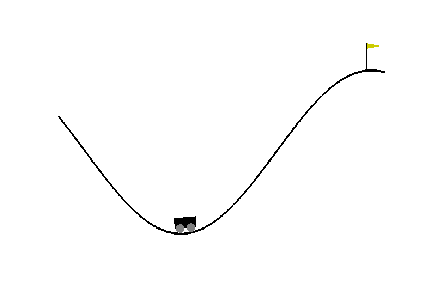
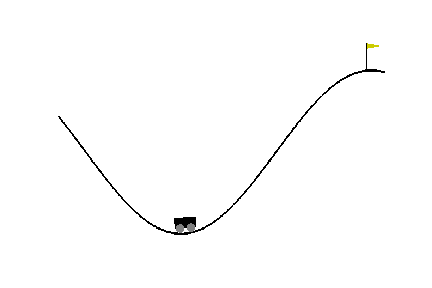
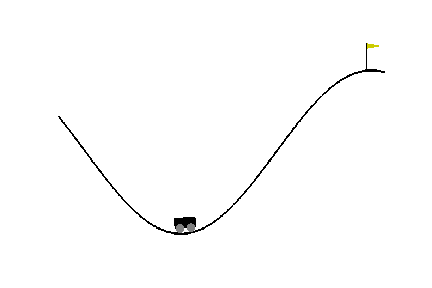
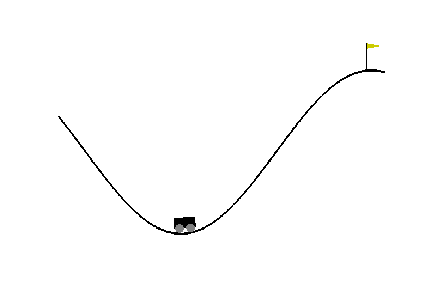
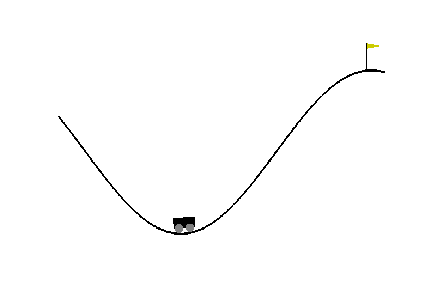
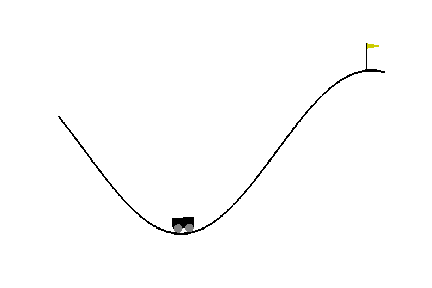
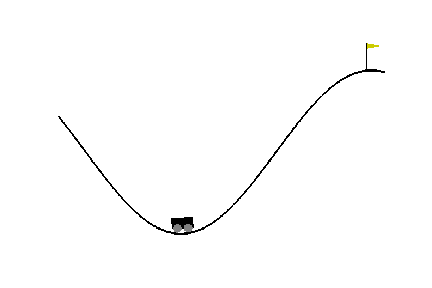
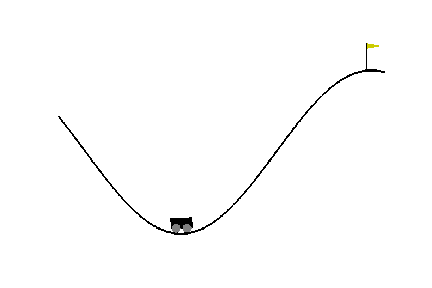
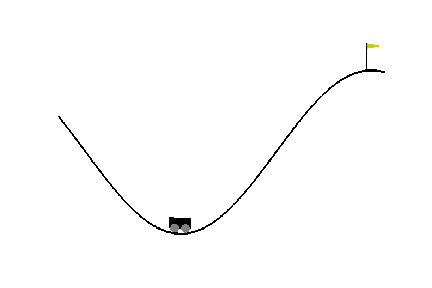
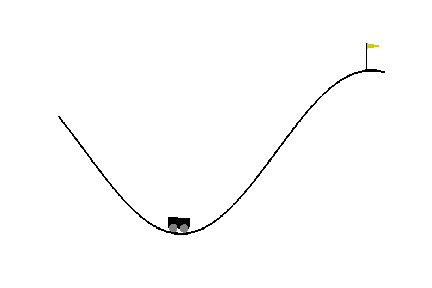
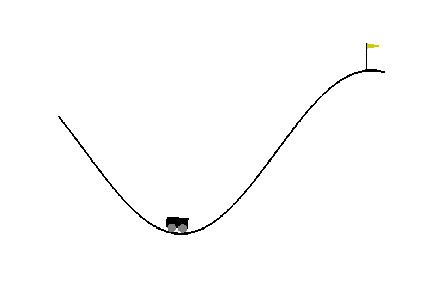
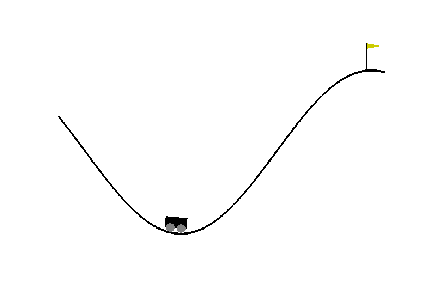
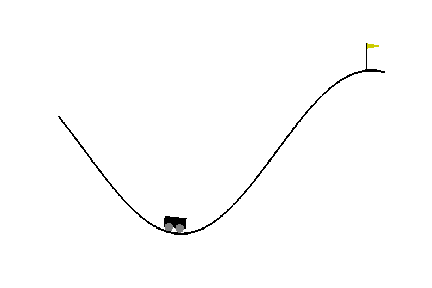
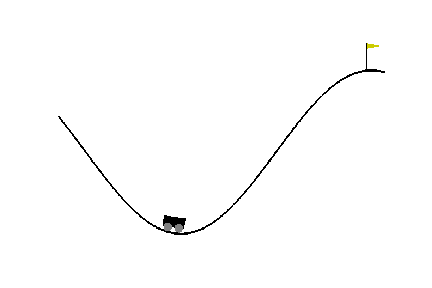
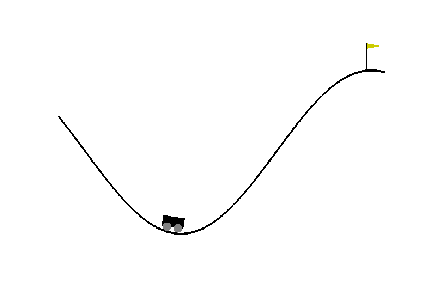
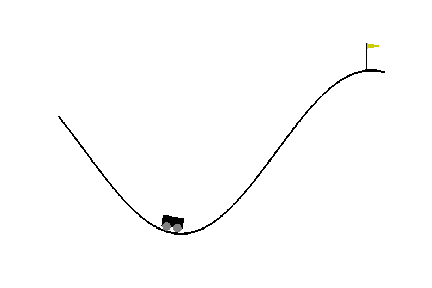
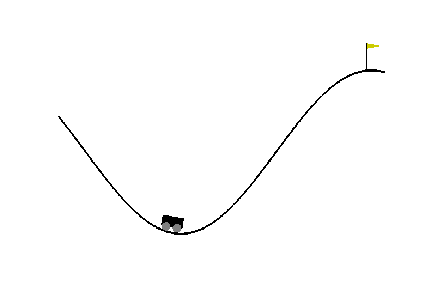
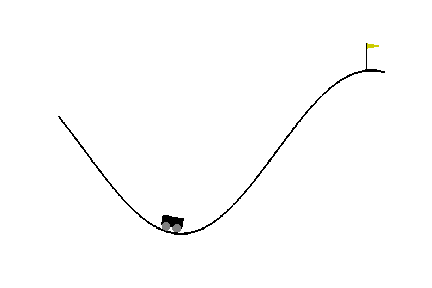
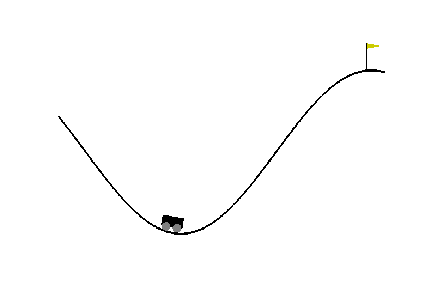
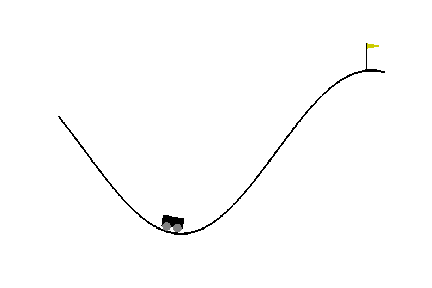
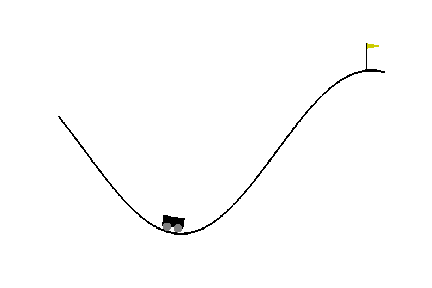
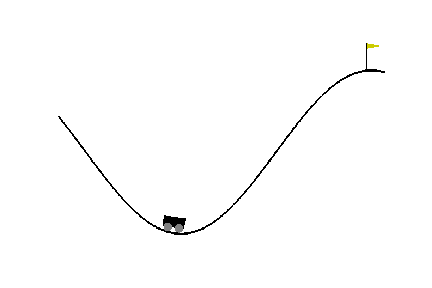
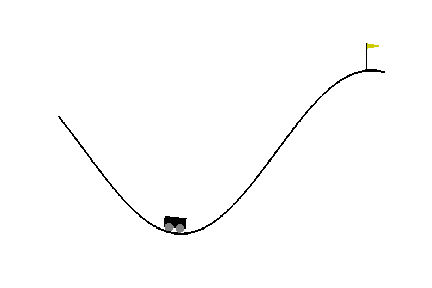
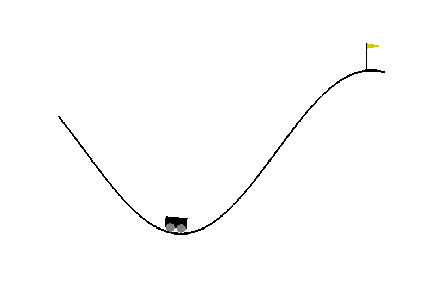
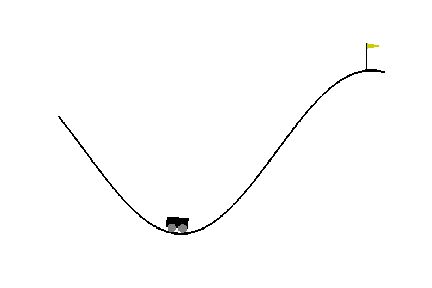
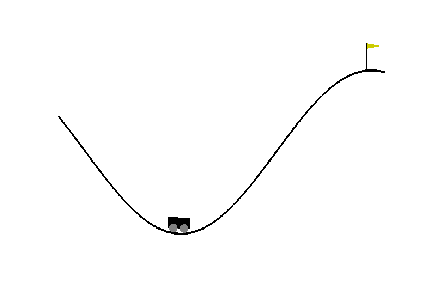
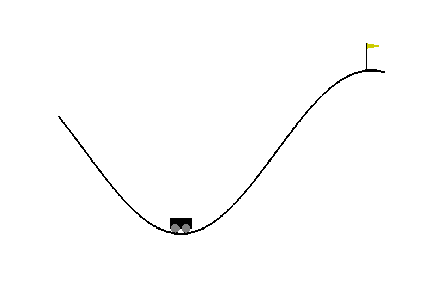
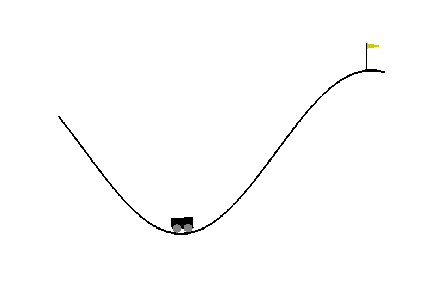
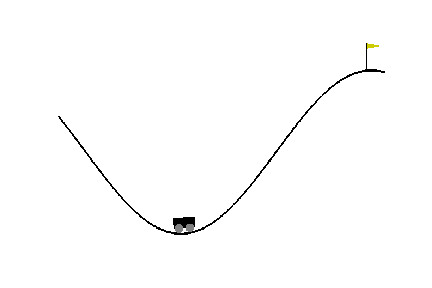
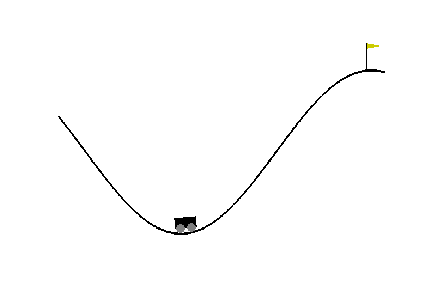
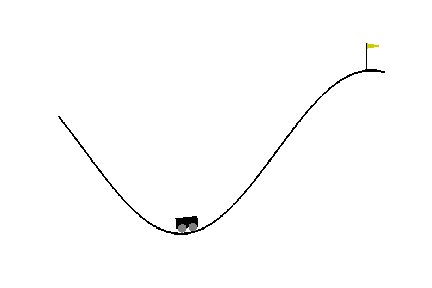
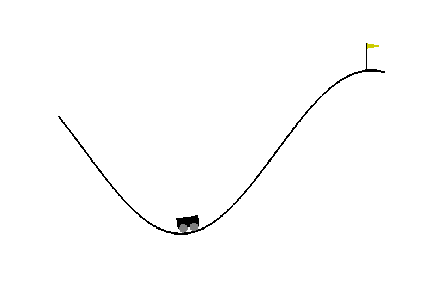
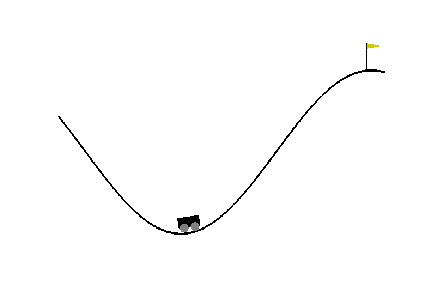
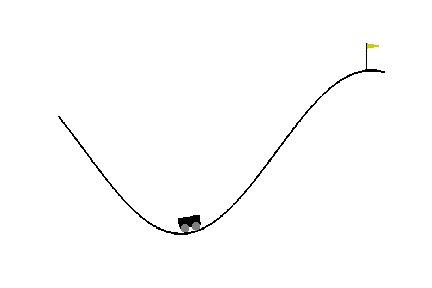
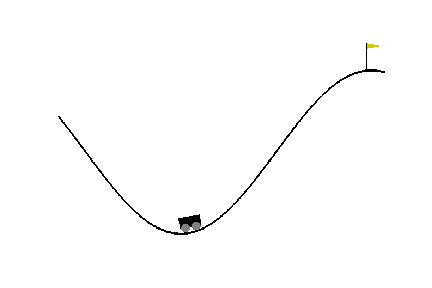
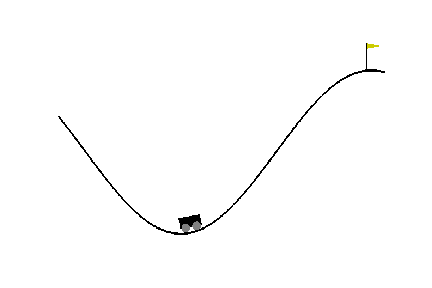
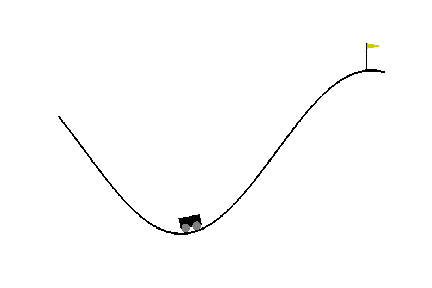
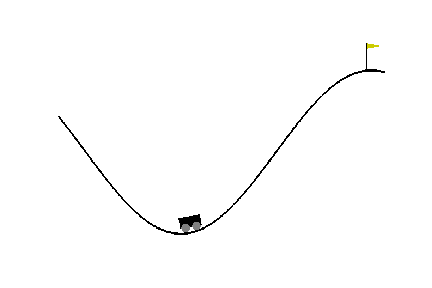
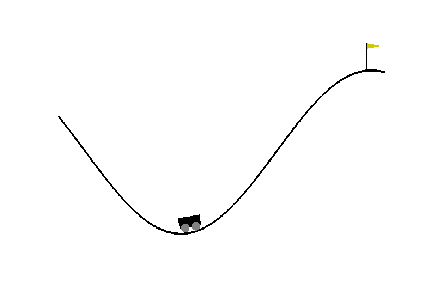
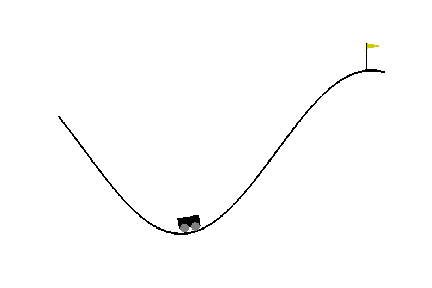
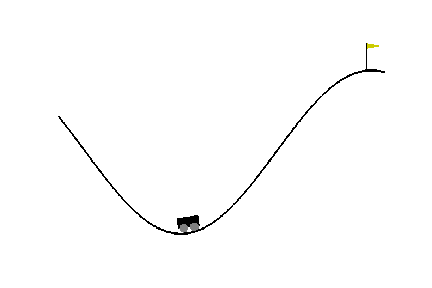
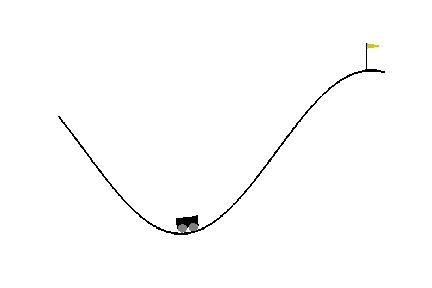
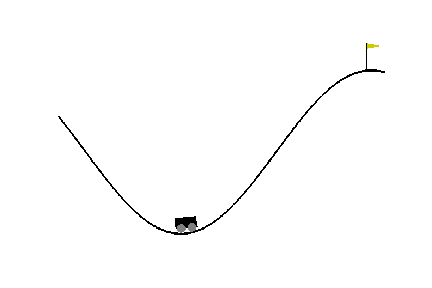
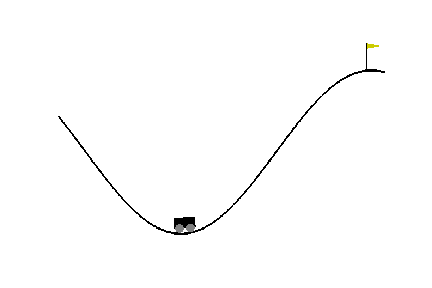
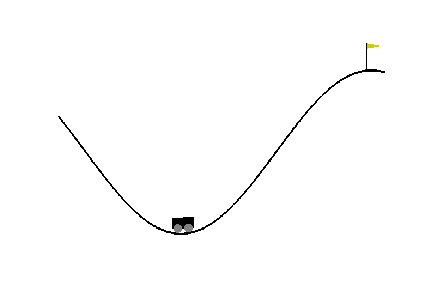
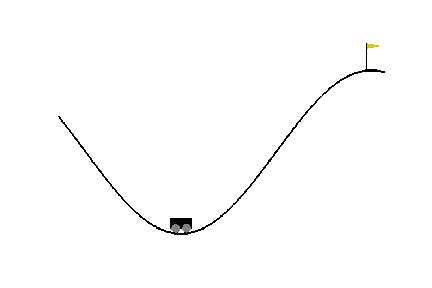
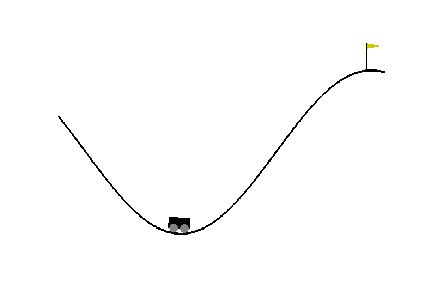
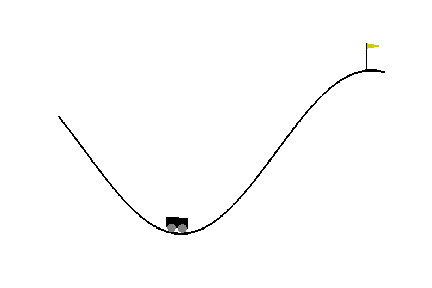
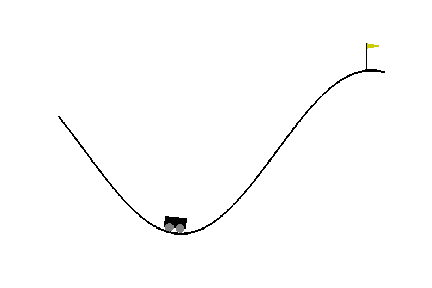
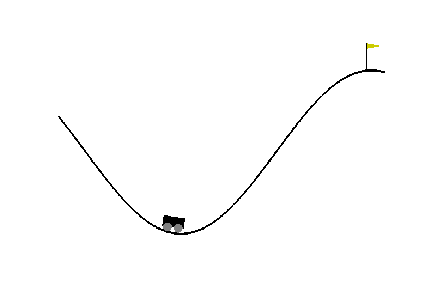
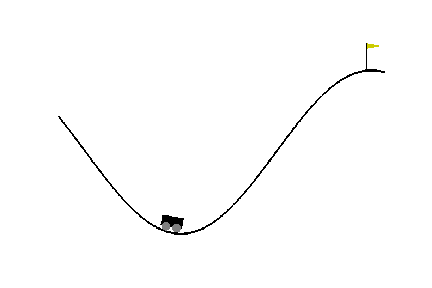
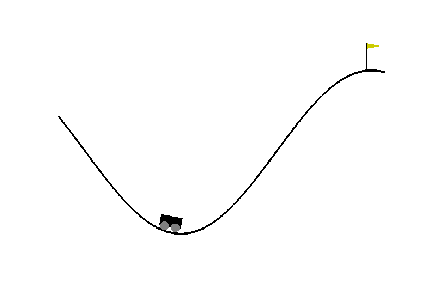
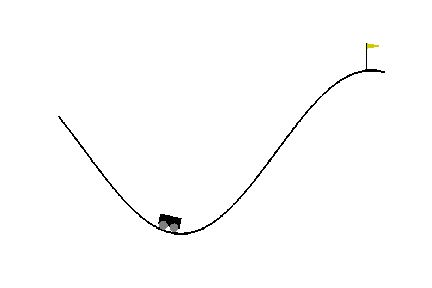
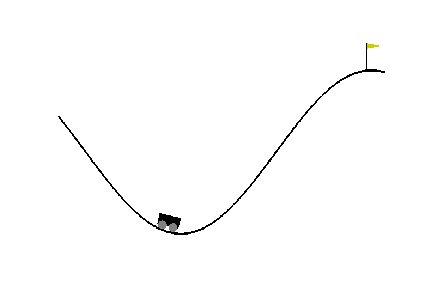
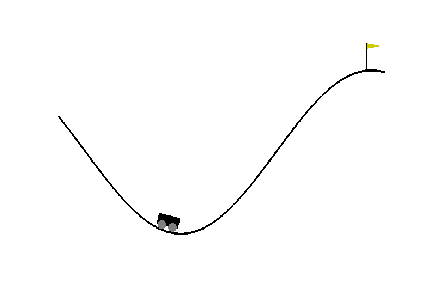
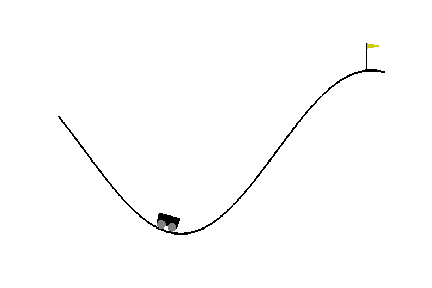
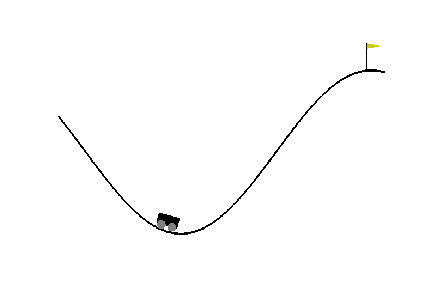
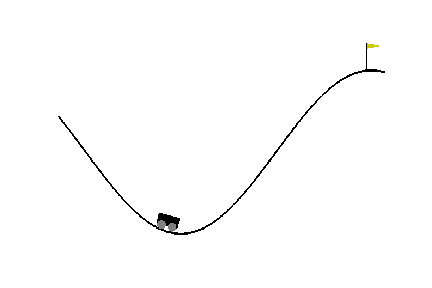
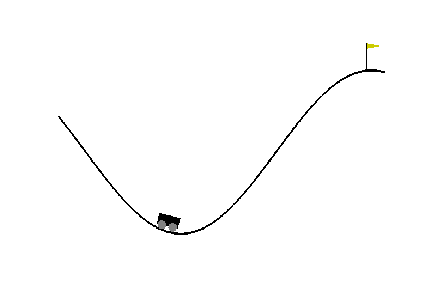
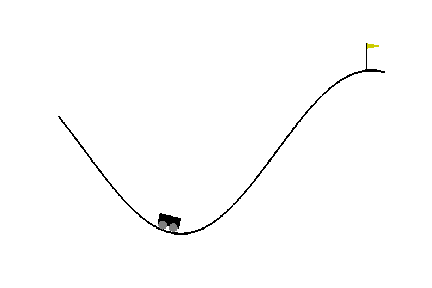
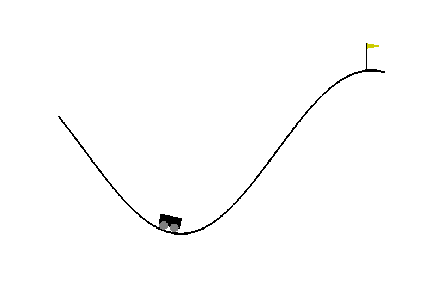
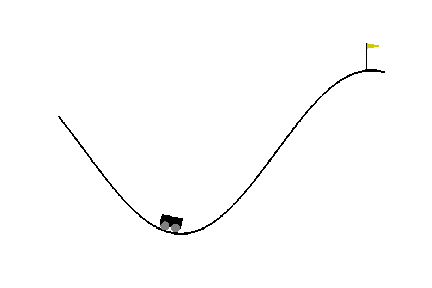
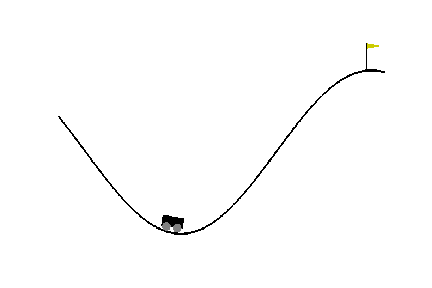
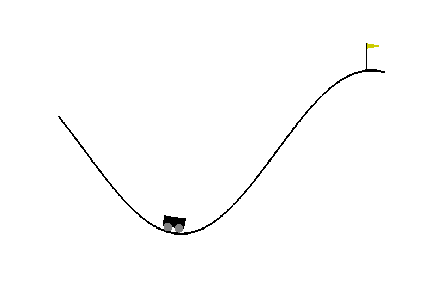
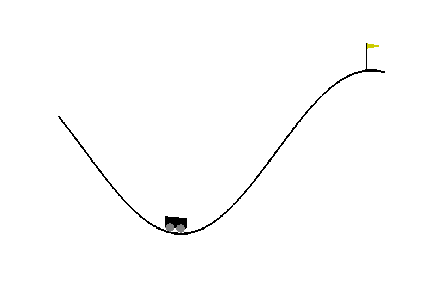
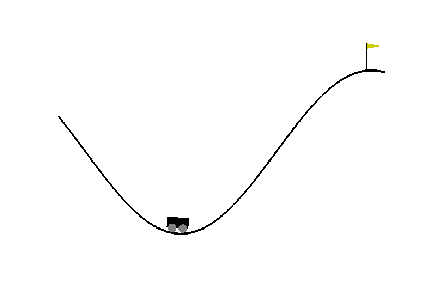
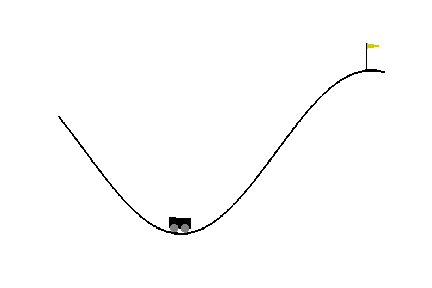
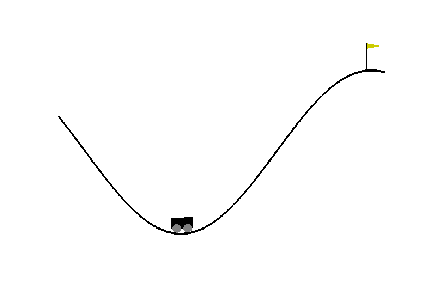
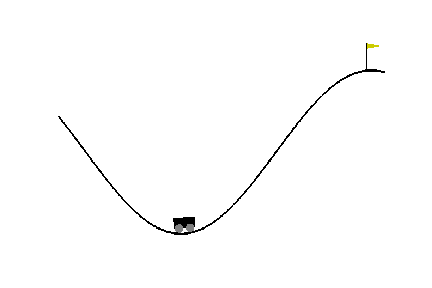
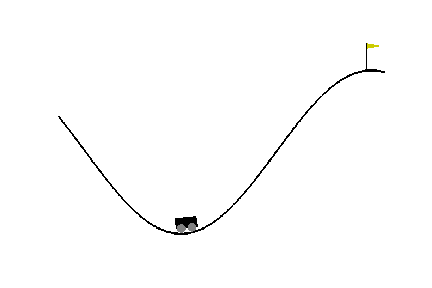
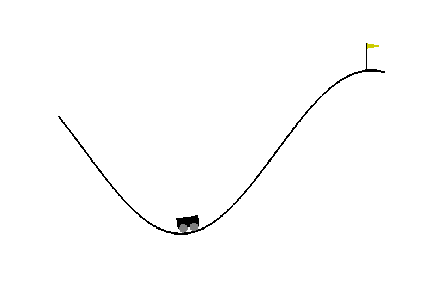
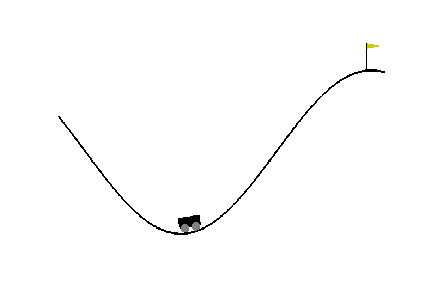
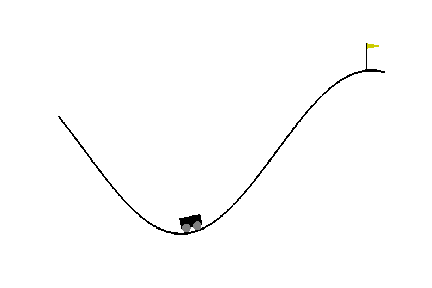
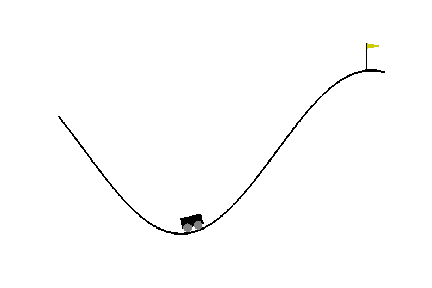
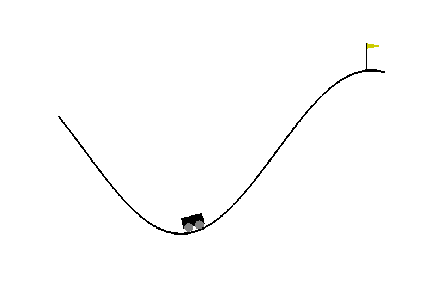
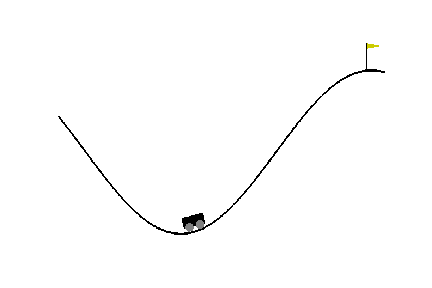
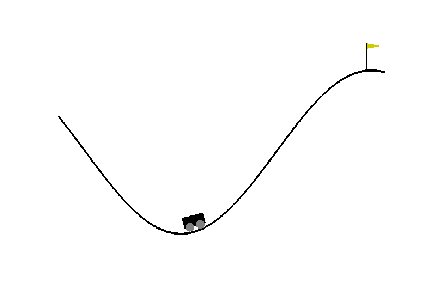
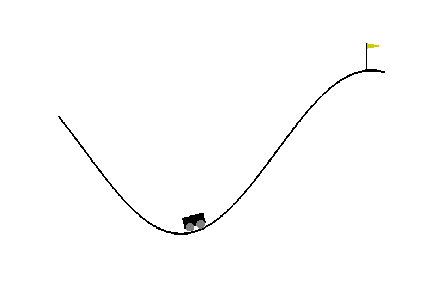
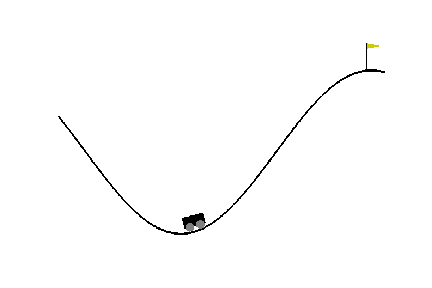
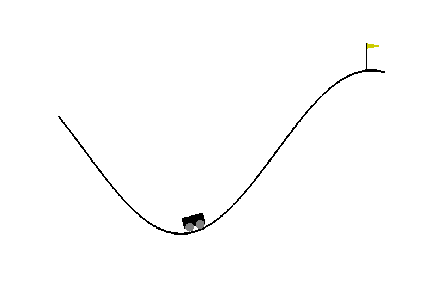
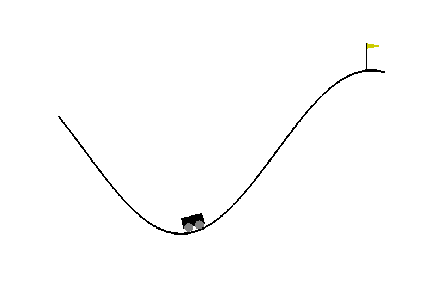
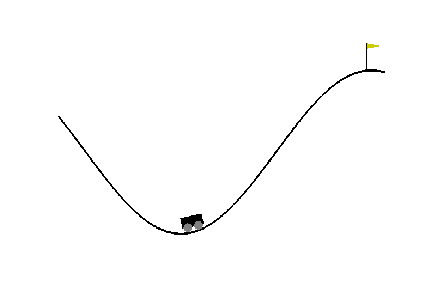
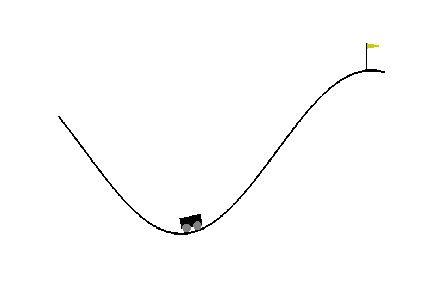
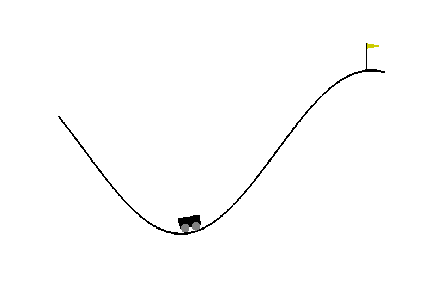
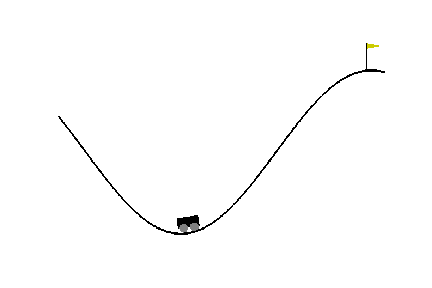
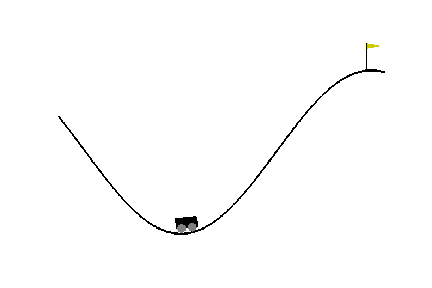
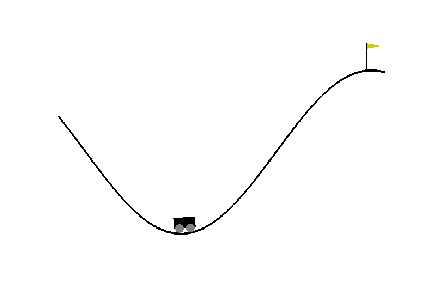
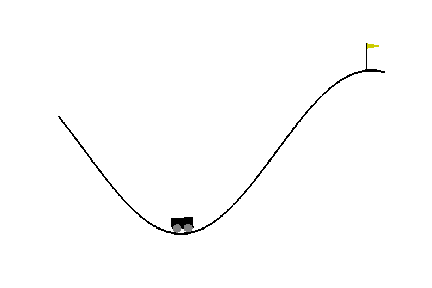
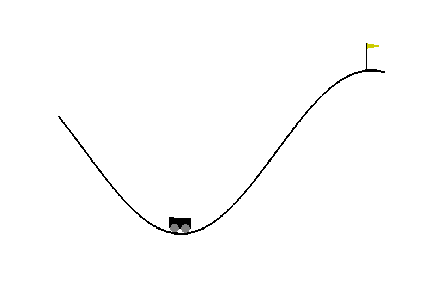
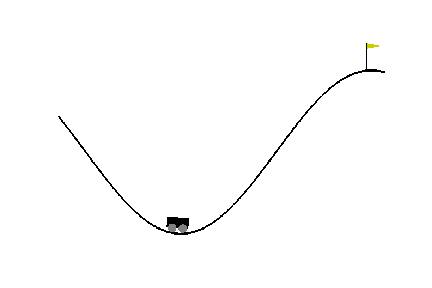
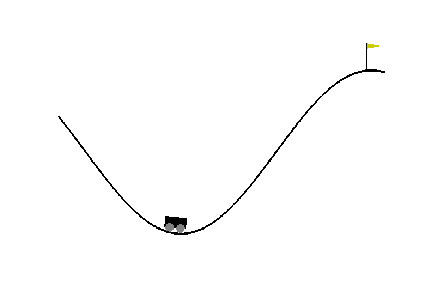
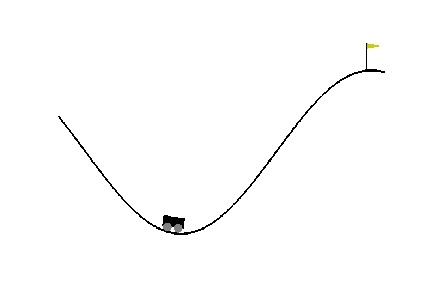
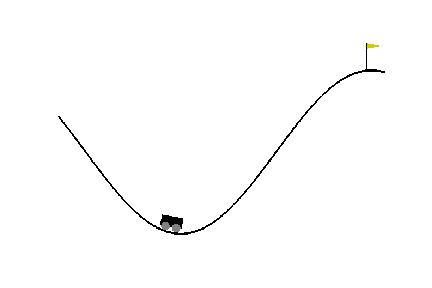
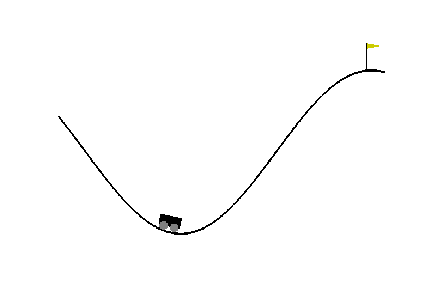
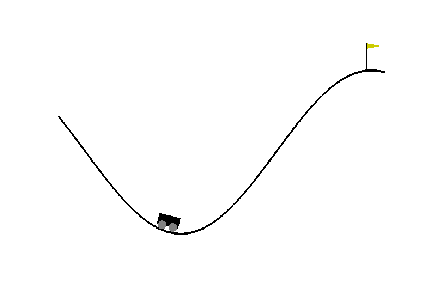
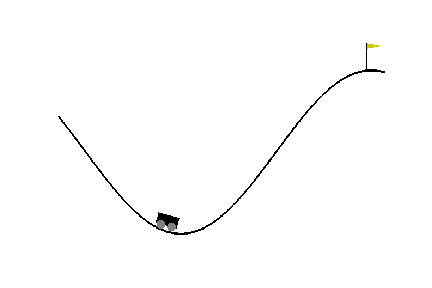
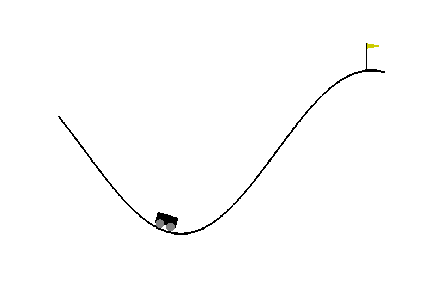
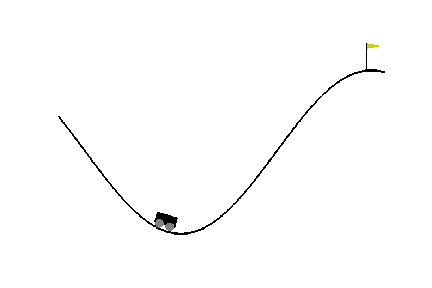
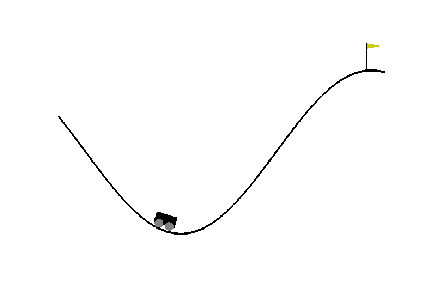
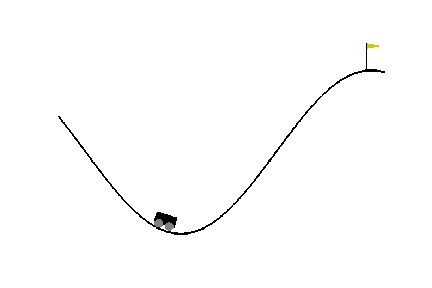
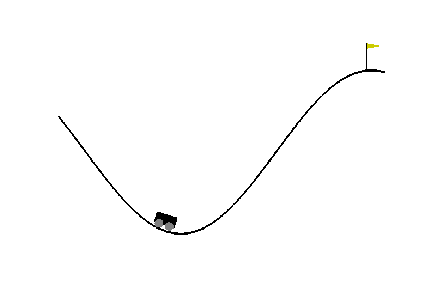
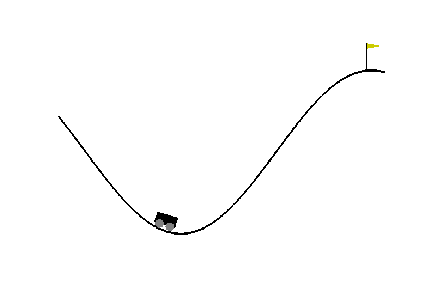
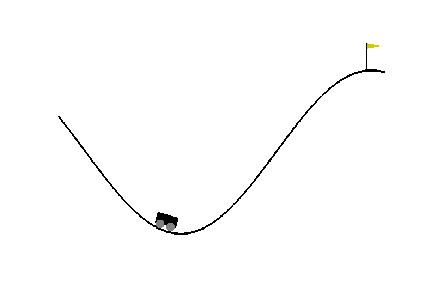
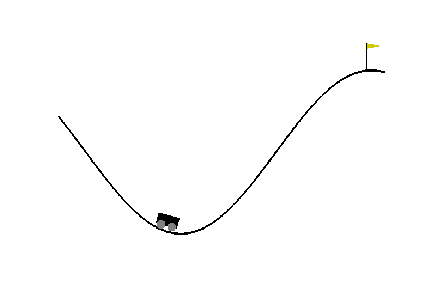
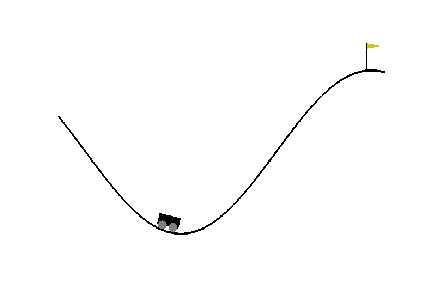
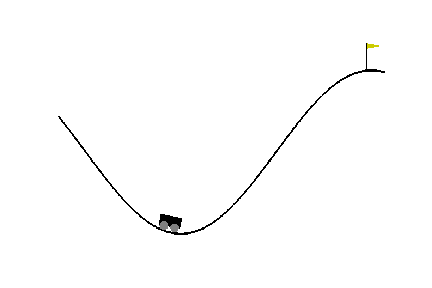
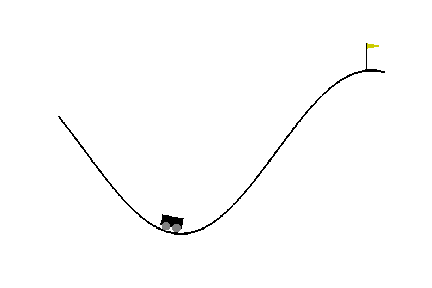
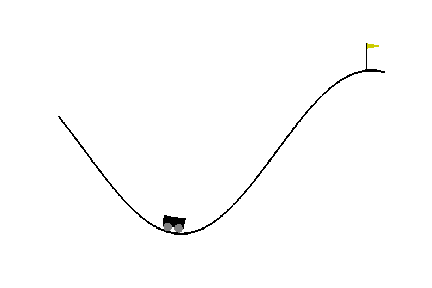
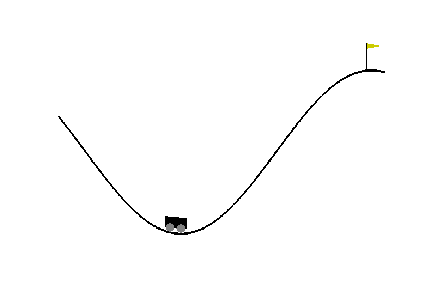
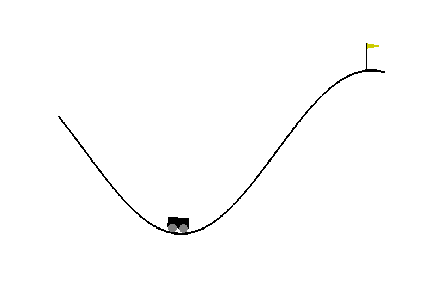
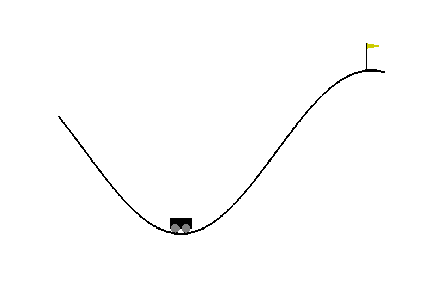
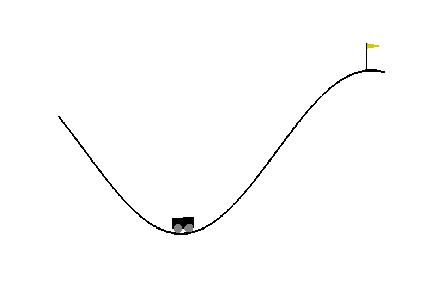
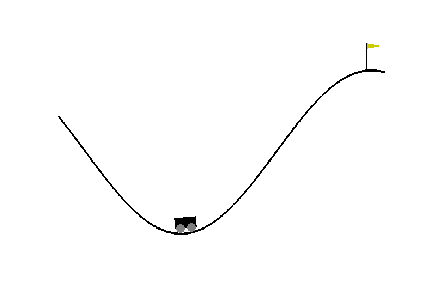
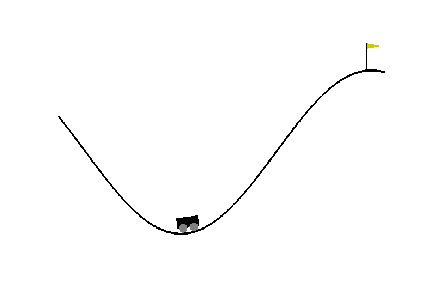
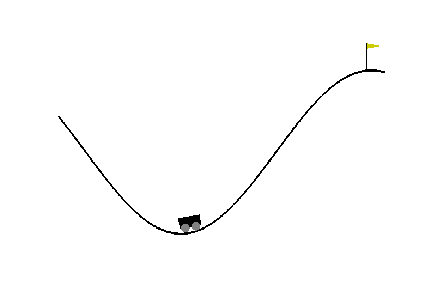
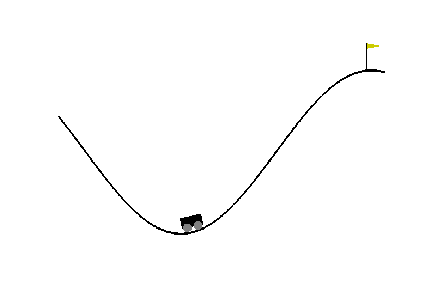
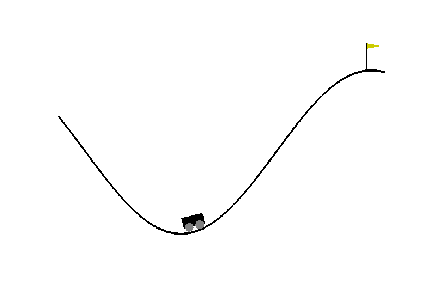
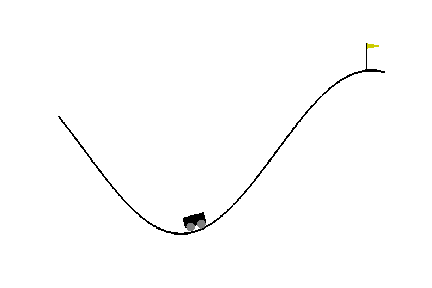
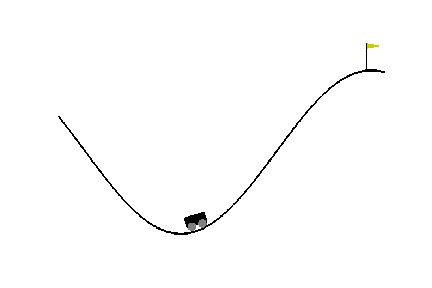
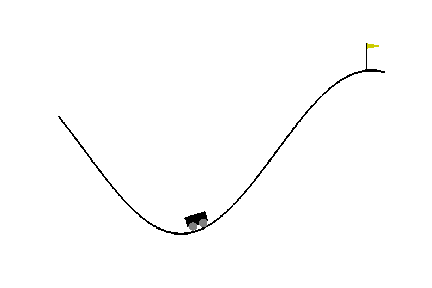
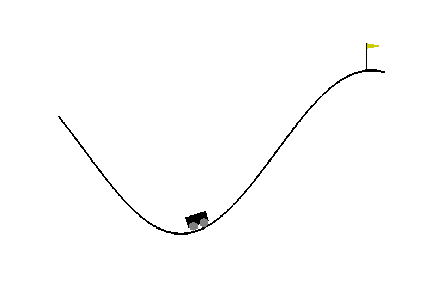
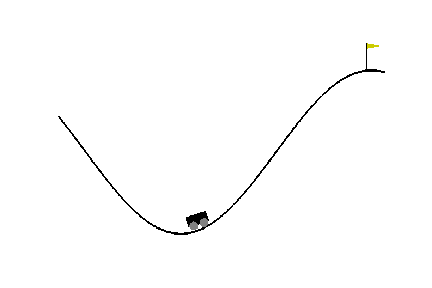
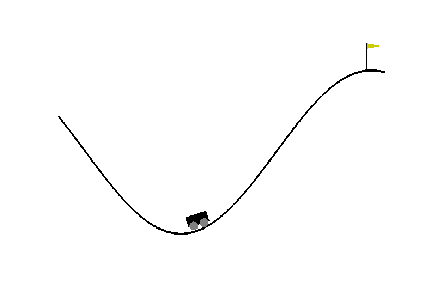
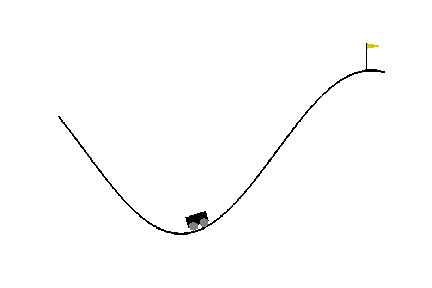
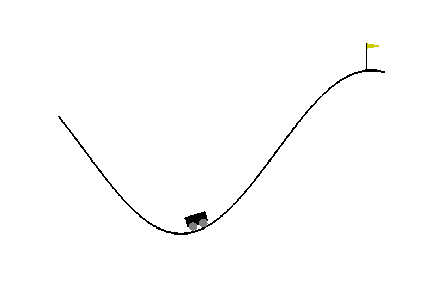
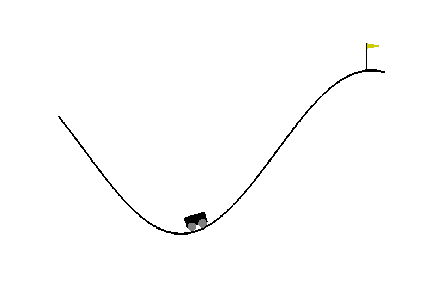
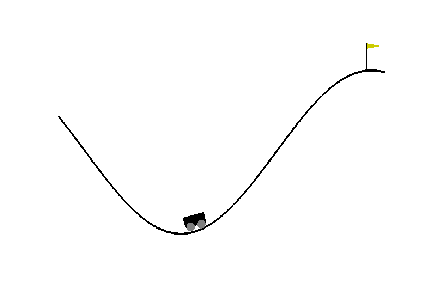
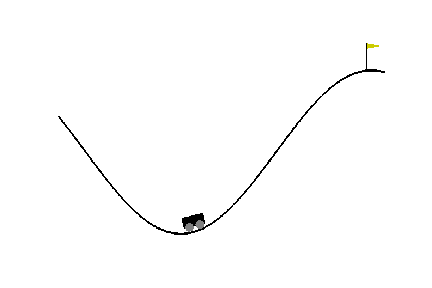
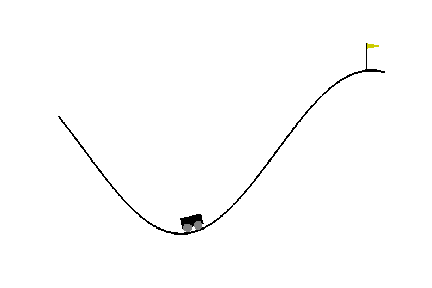
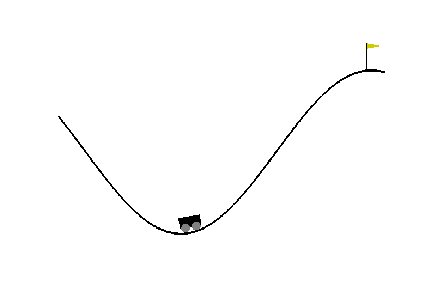
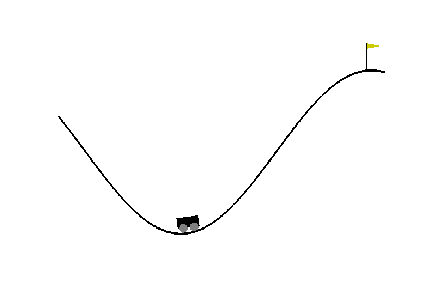
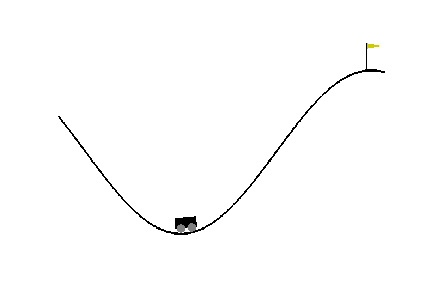
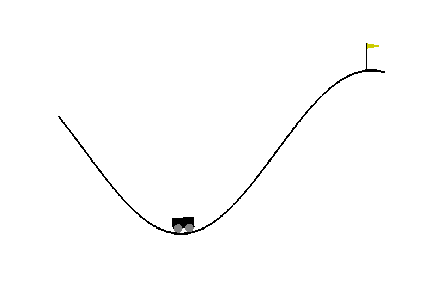
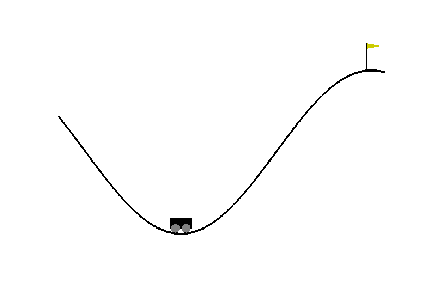
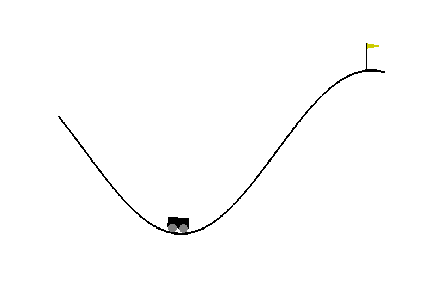
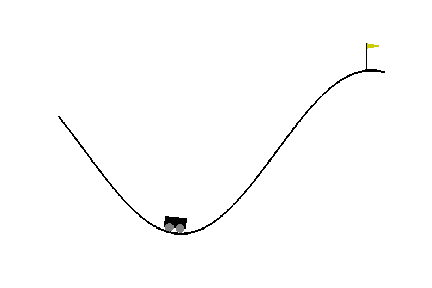
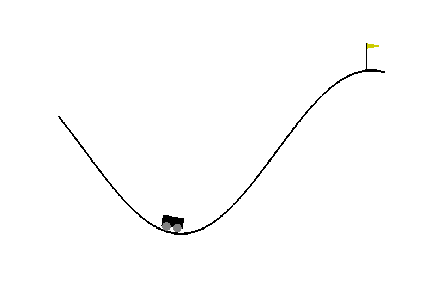
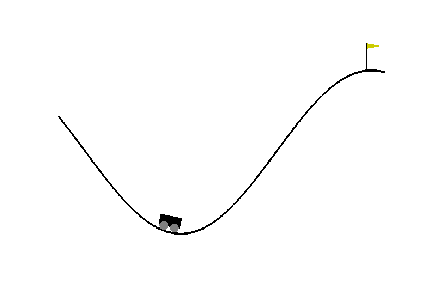
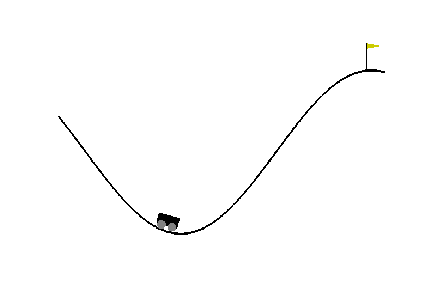
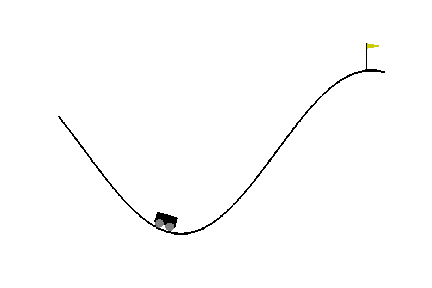
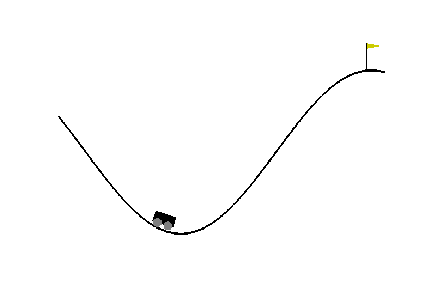
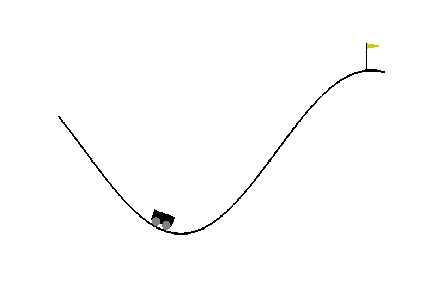
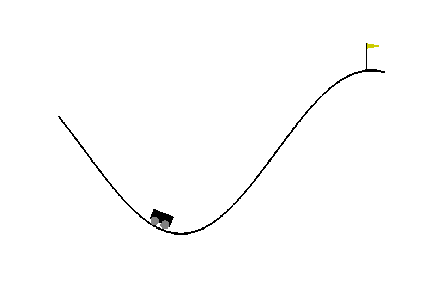
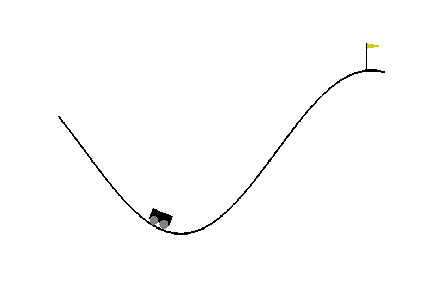
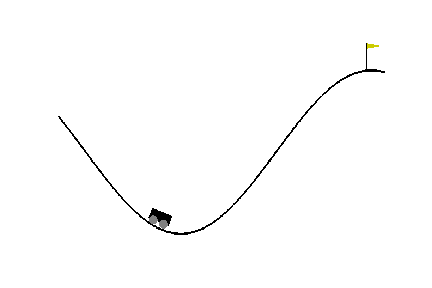
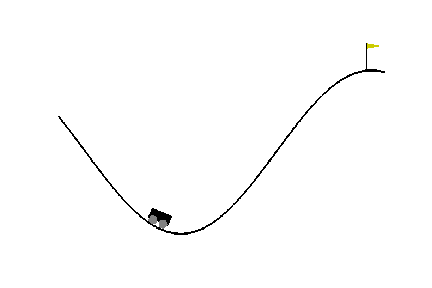
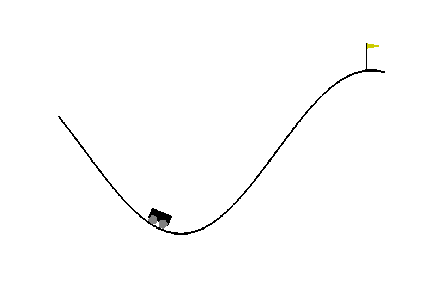
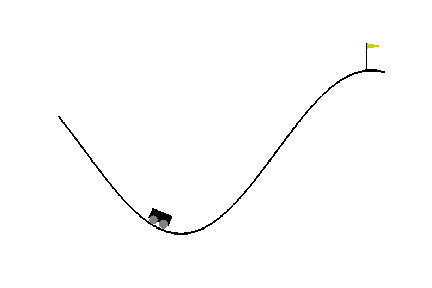
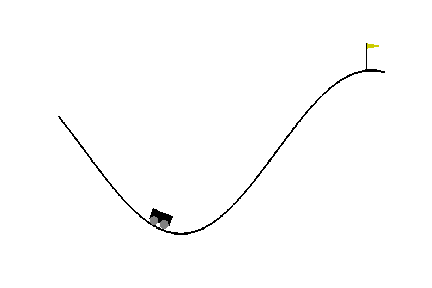
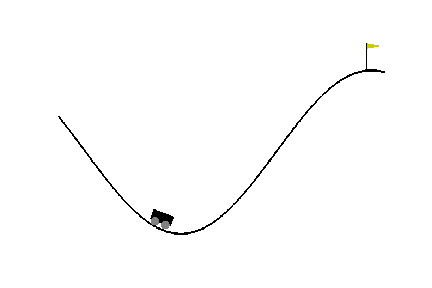
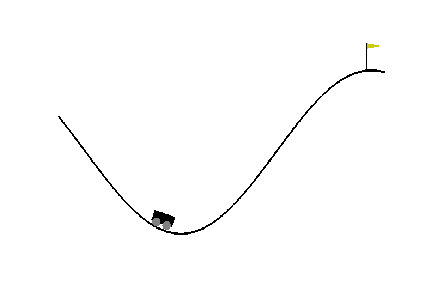
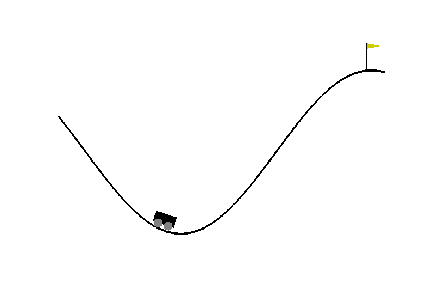
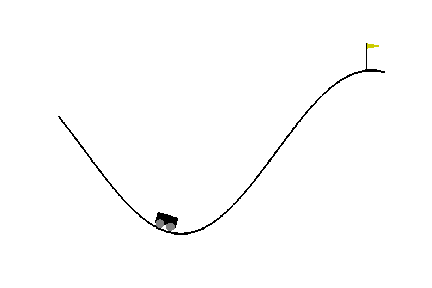
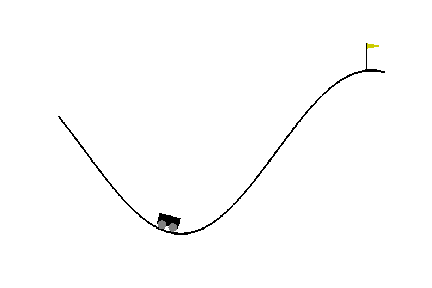
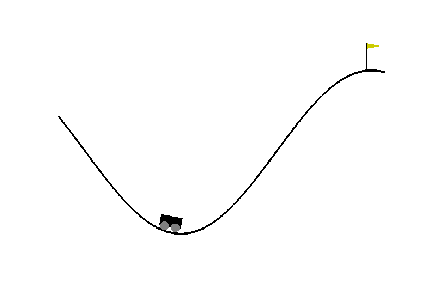
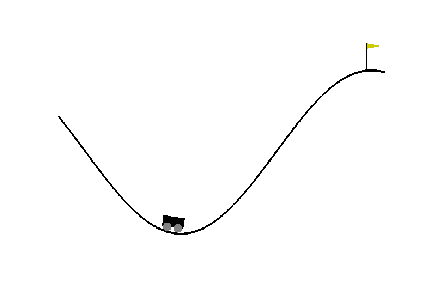
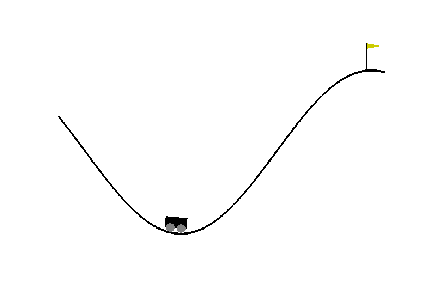
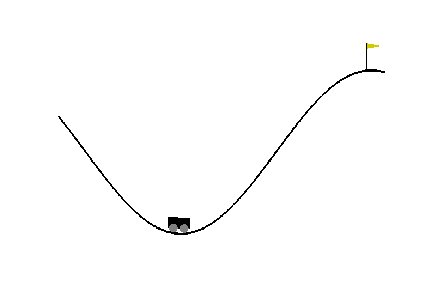
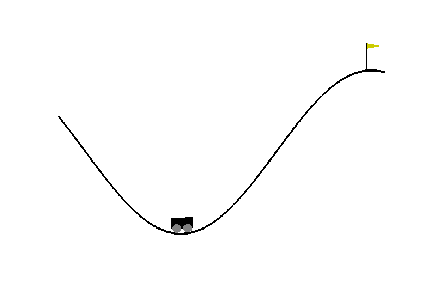
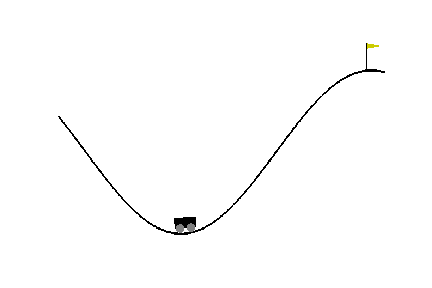
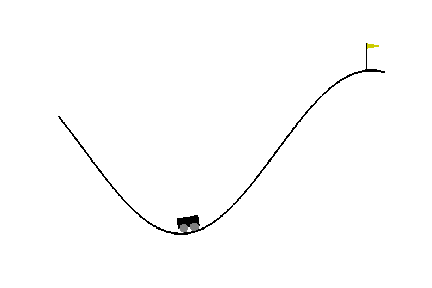
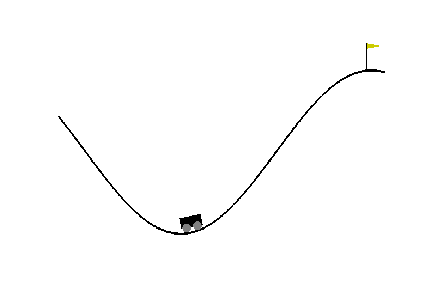
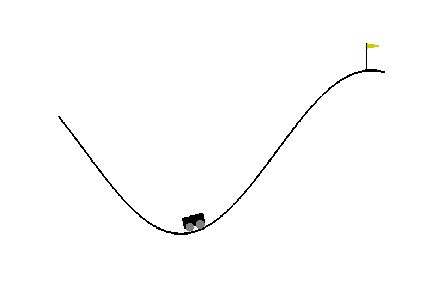
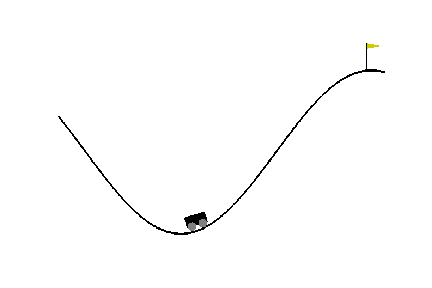
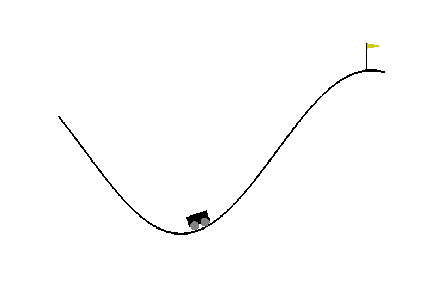
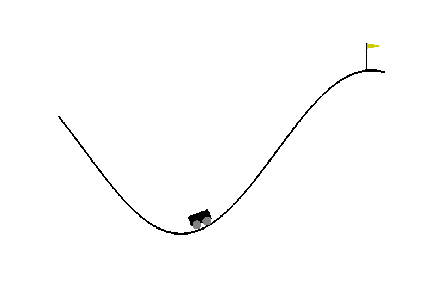
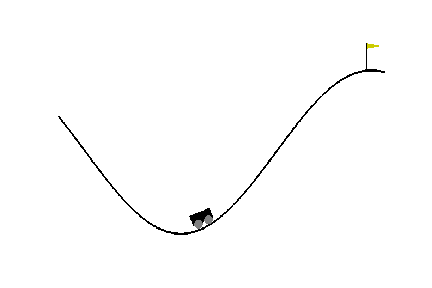
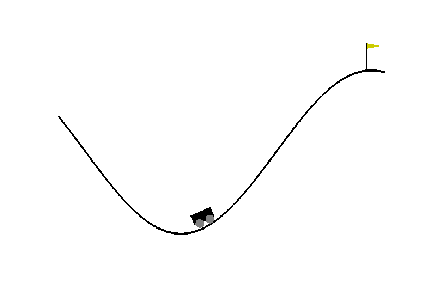
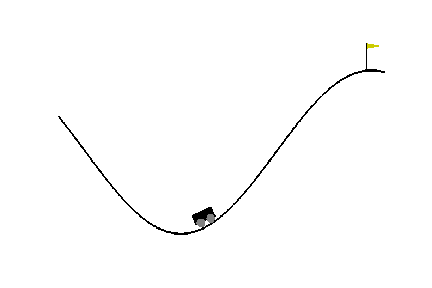
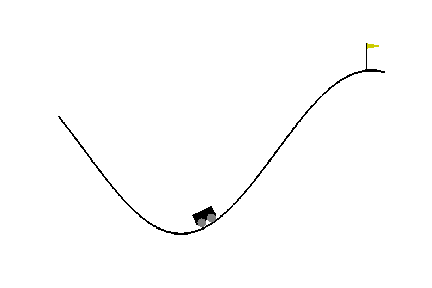
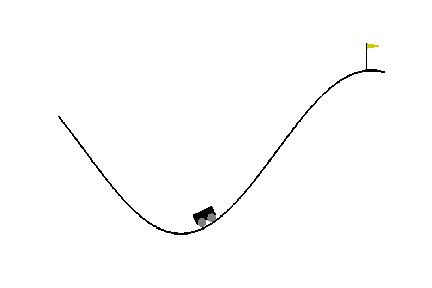
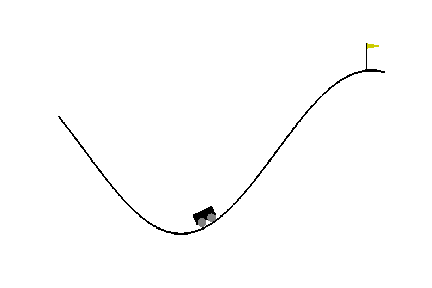
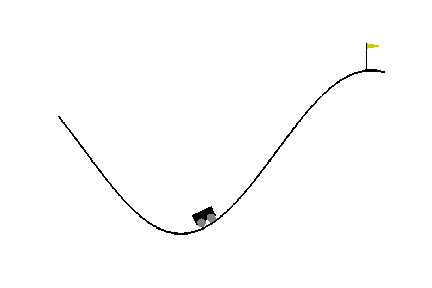
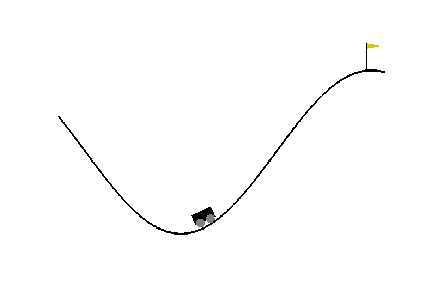
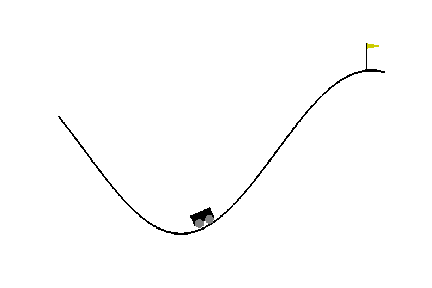
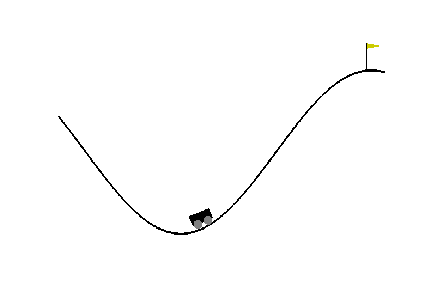
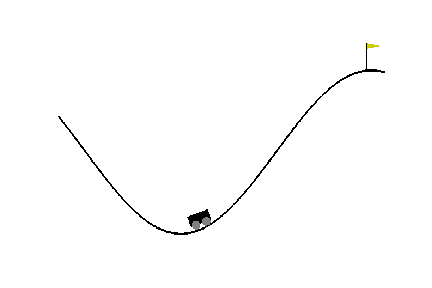
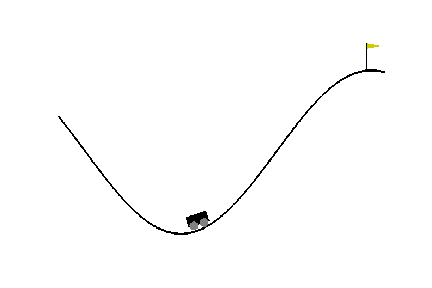
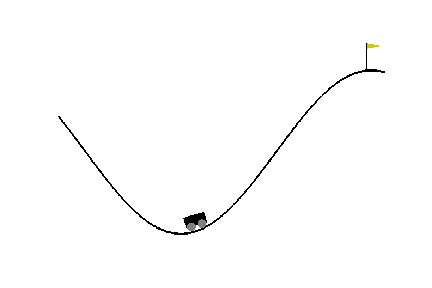
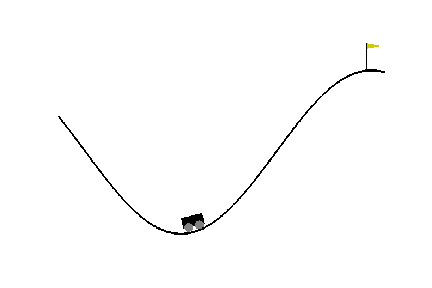
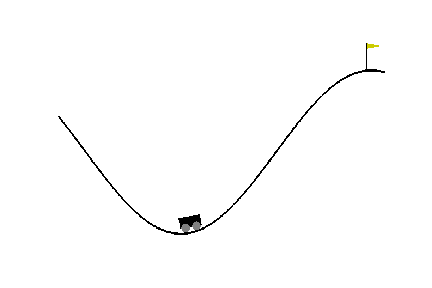
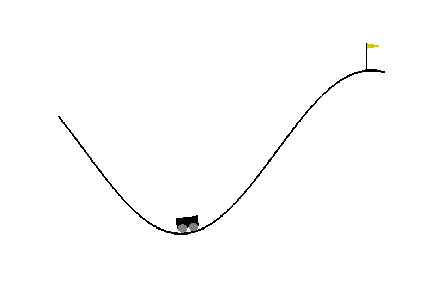
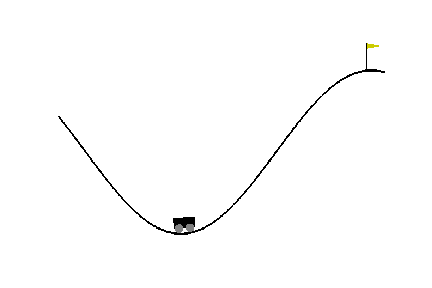
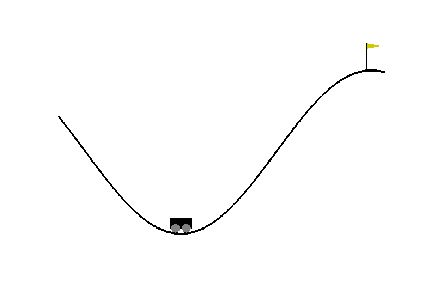
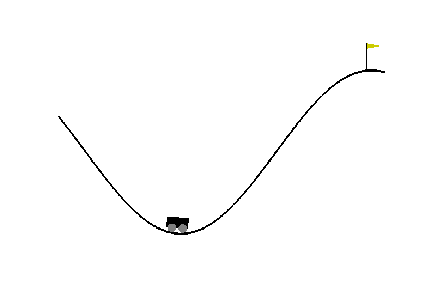
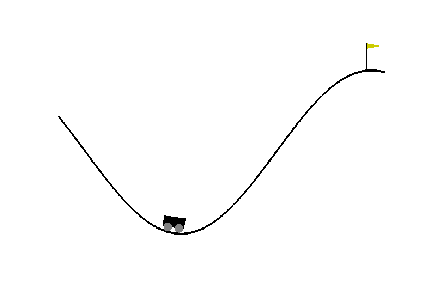
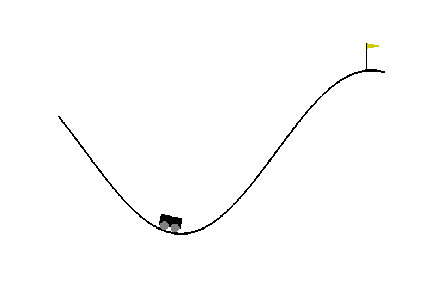

In [10]:
stat = e.train(qtf,plot=True)
e.test(qtf,gif=True)

### PyTorch

In [11]:
qtorch = QLearningTorch(learning_rate=0.01,
                   use_bias=True,featurizer=None,scaler=None)

Epsilon : 1.0, Num Steps : 199, Avg Reward with Window Size 25 : -200.0:   1%|          | 1/100 [00:00<00:12,  7.64it/s]

Model Created!


Epsilon : 3.7074446659261245e-44, Num Steps : 199, Avg Reward with Window Size 25 : -200.0: 100%|██████████| 100/100 [00:09<00:00, 10.42it/s]
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


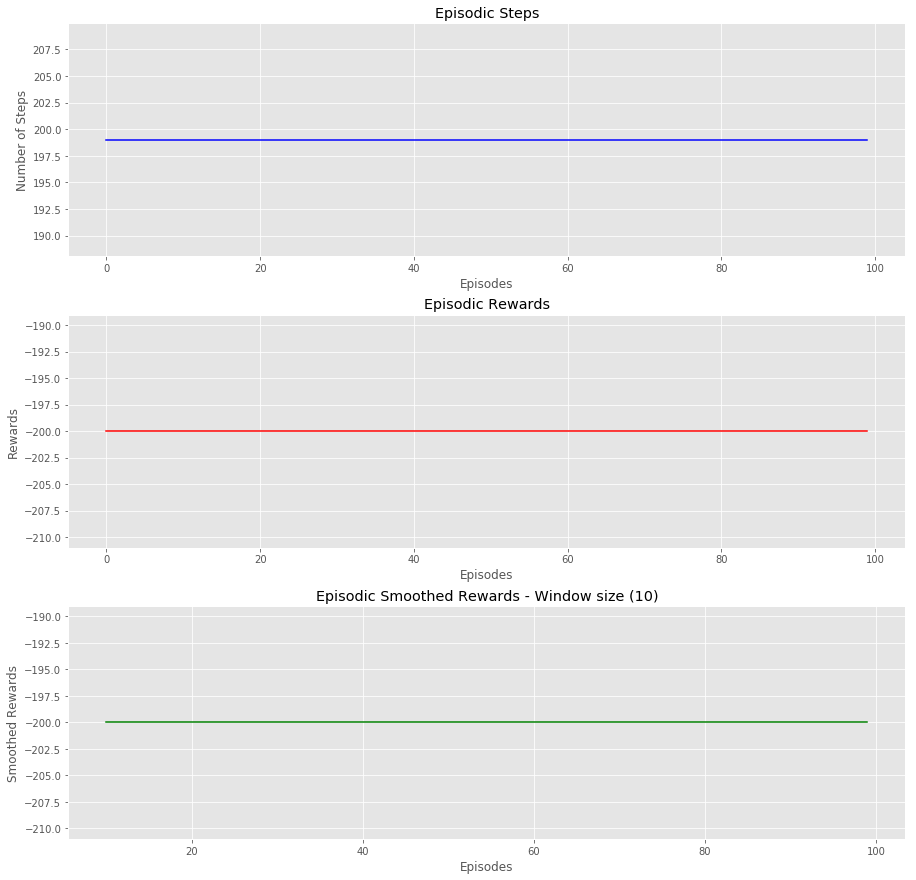

Total reward for episode 0: -200.0



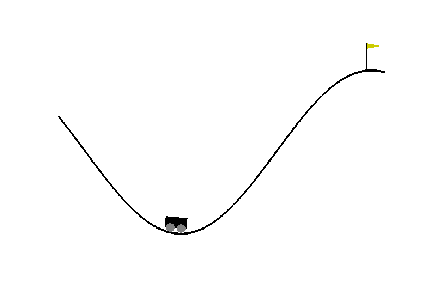
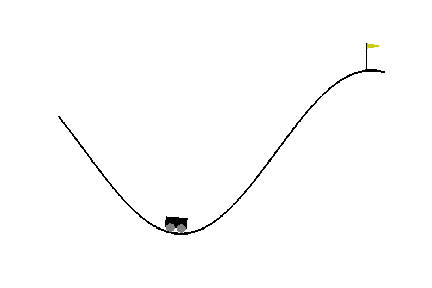
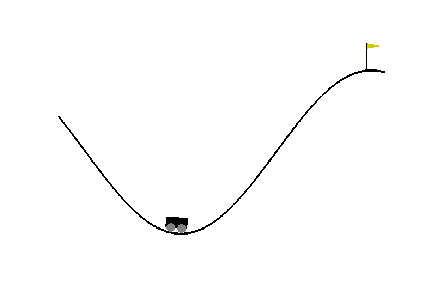
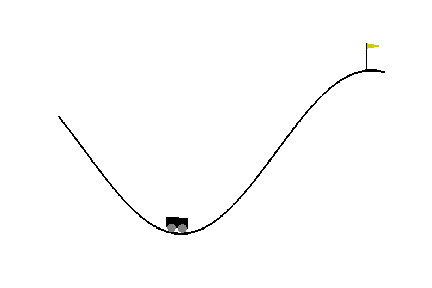
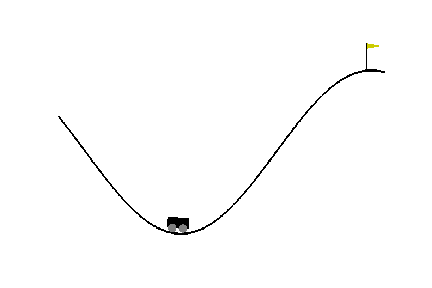
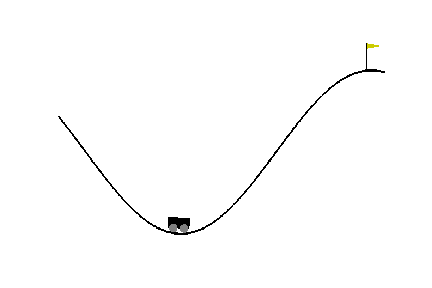
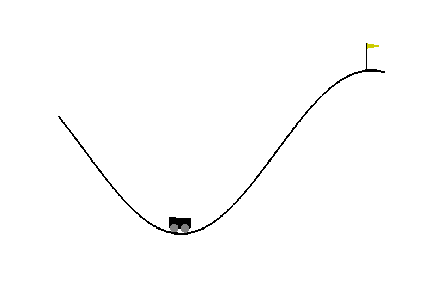
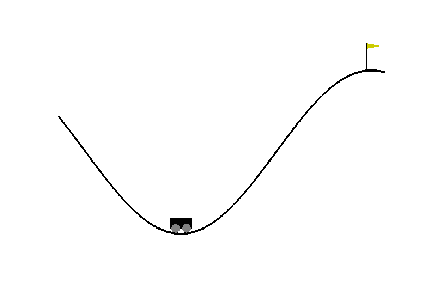
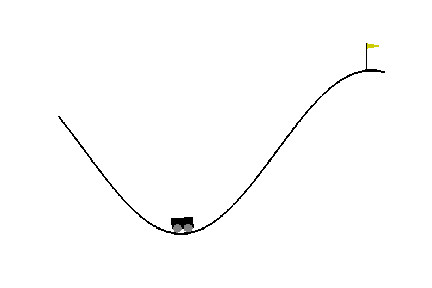
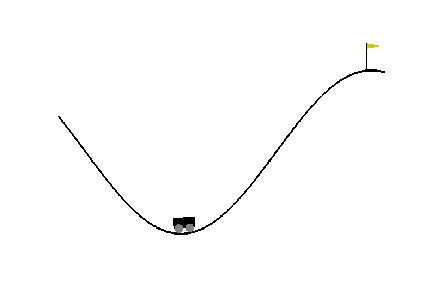
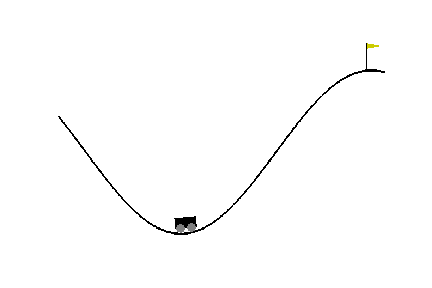
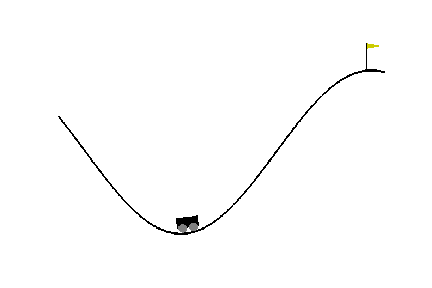
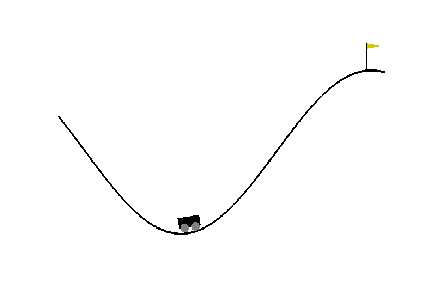
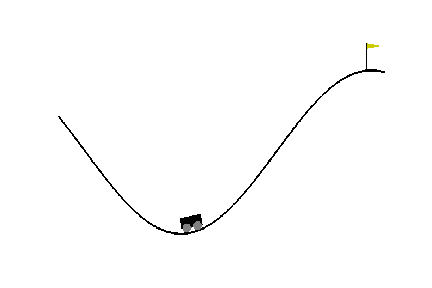
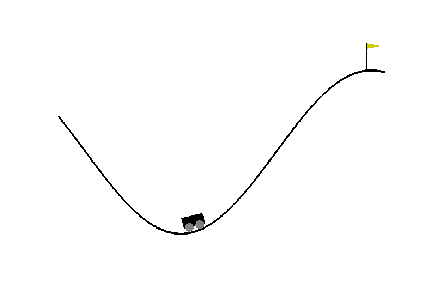
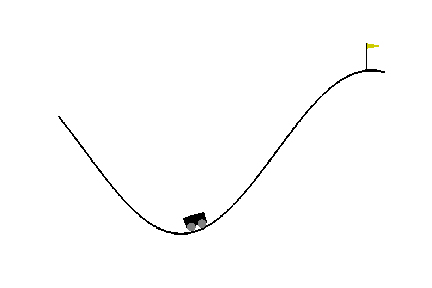
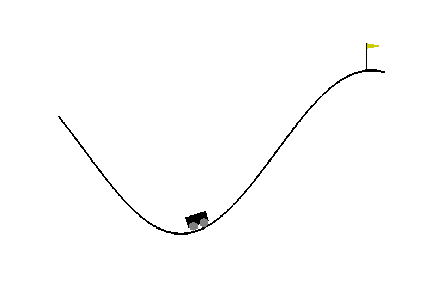
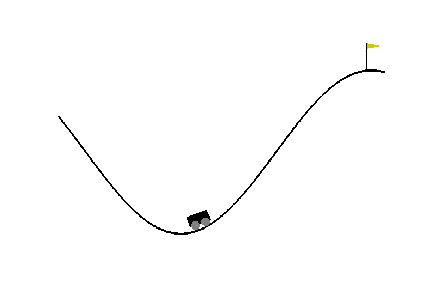
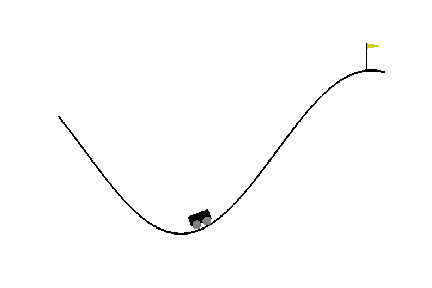
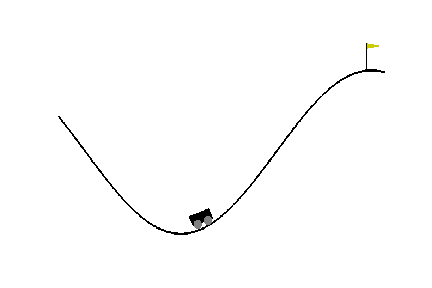
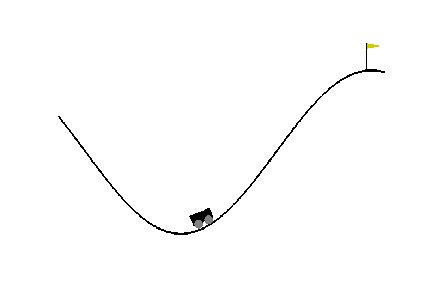
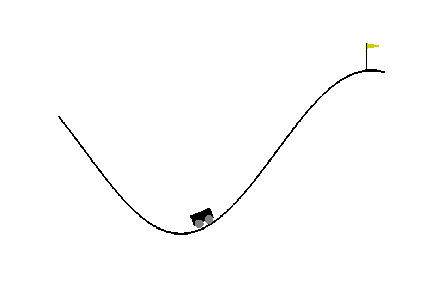
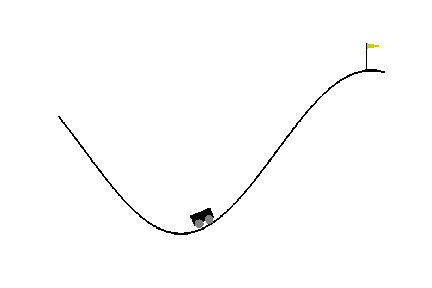
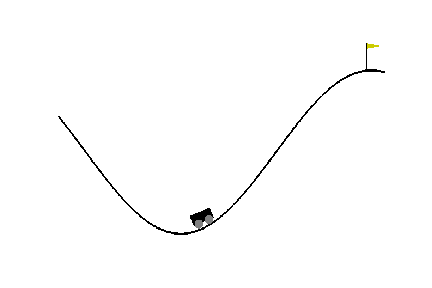
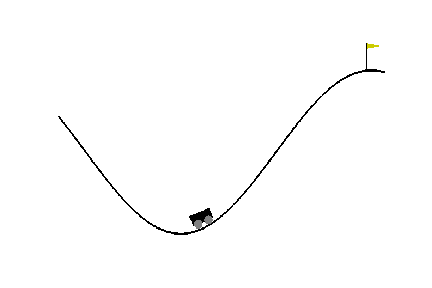
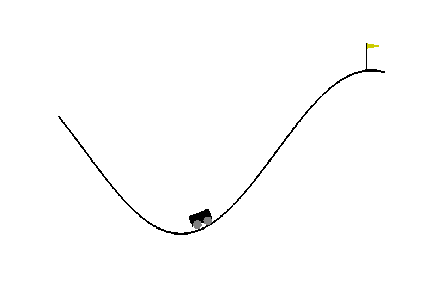
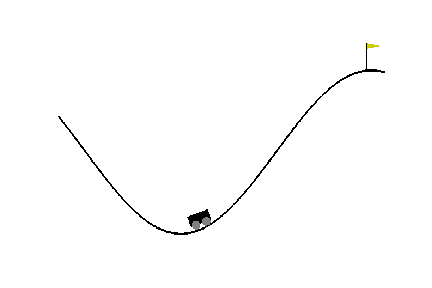
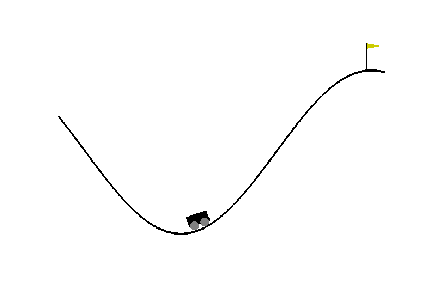
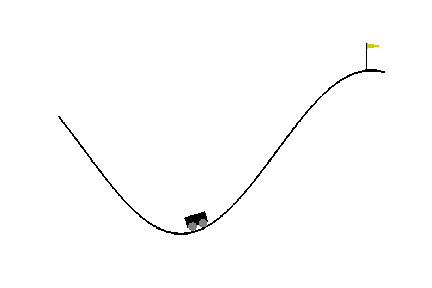
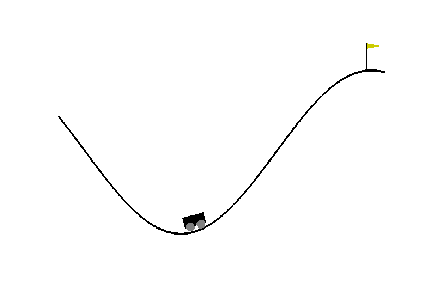
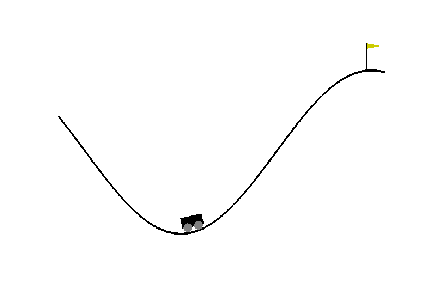
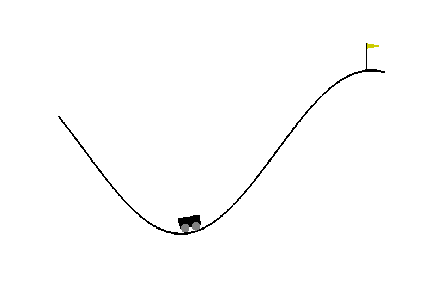
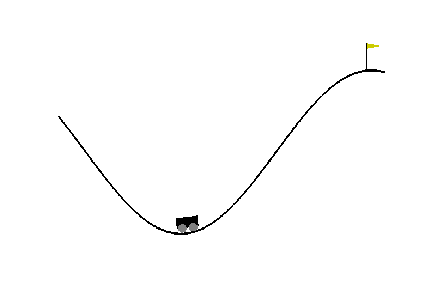
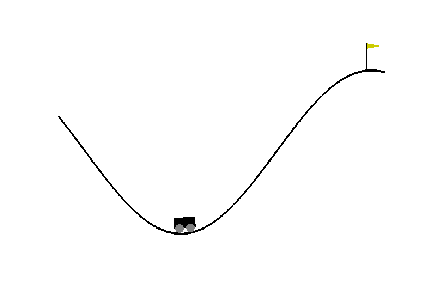
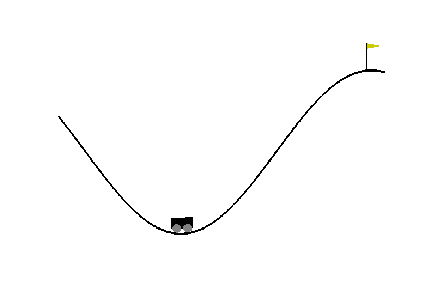
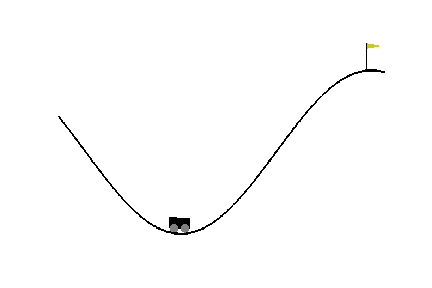
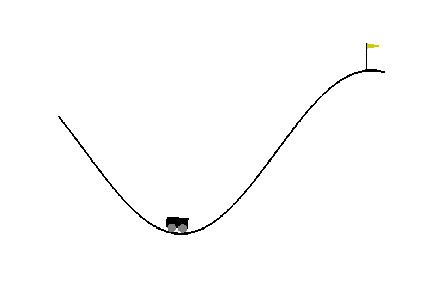
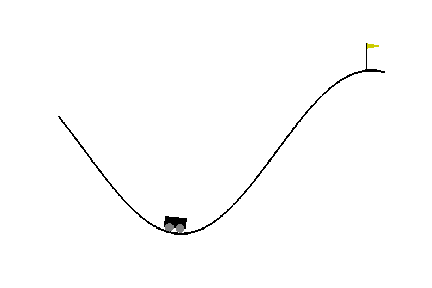
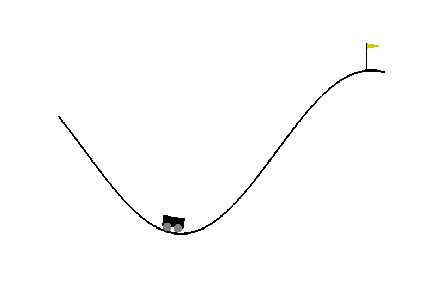
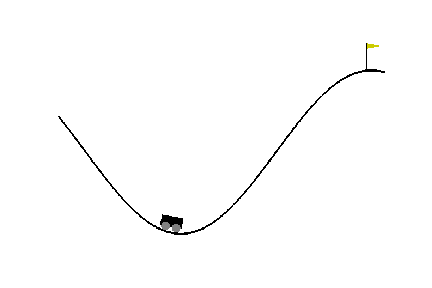
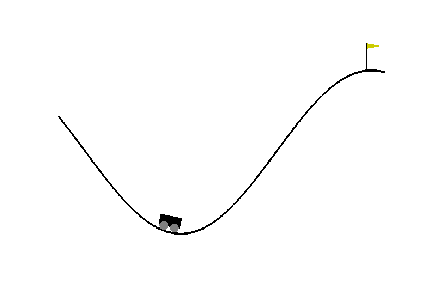
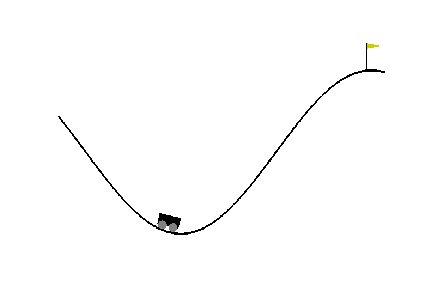
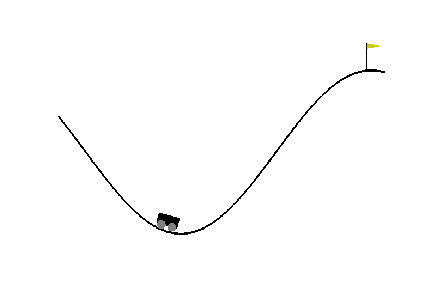
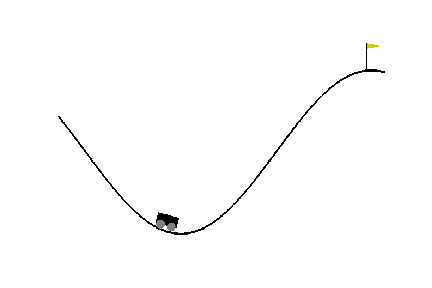
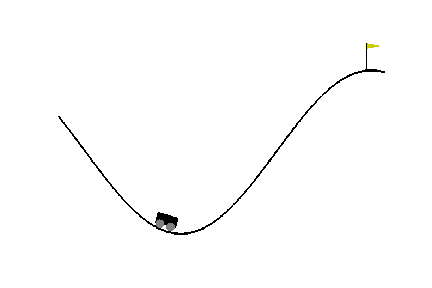
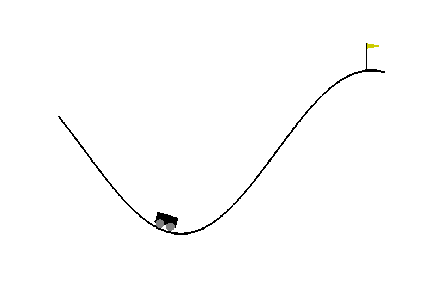
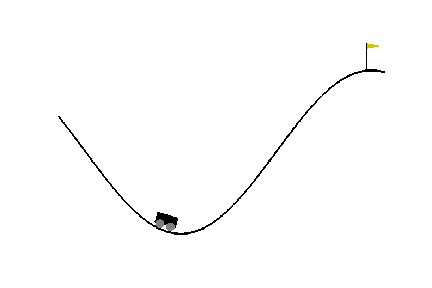
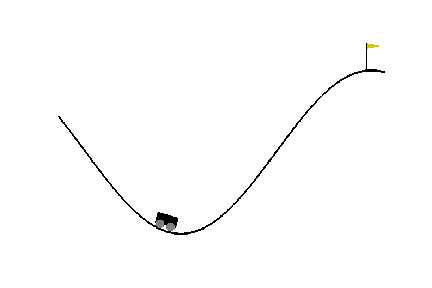
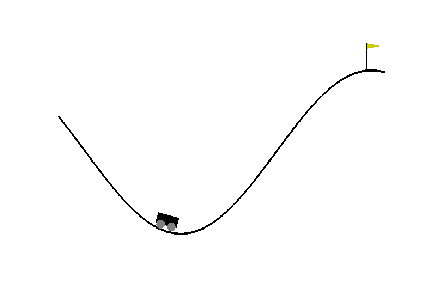
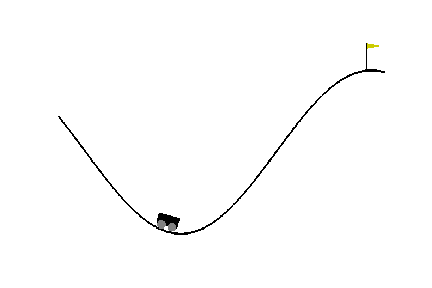
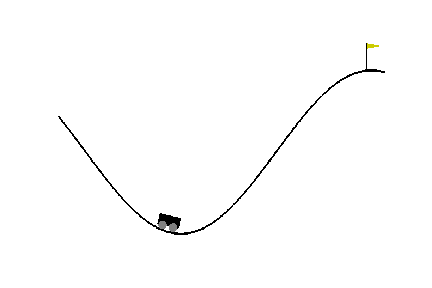
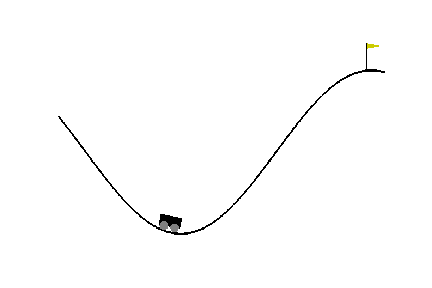
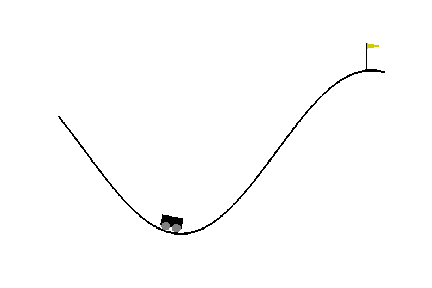
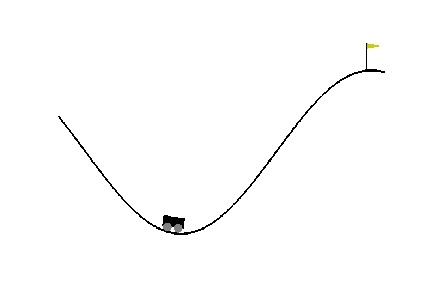
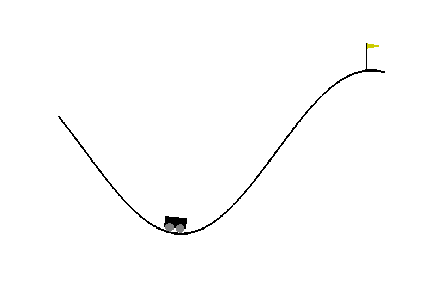
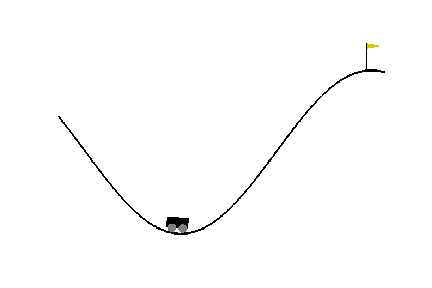
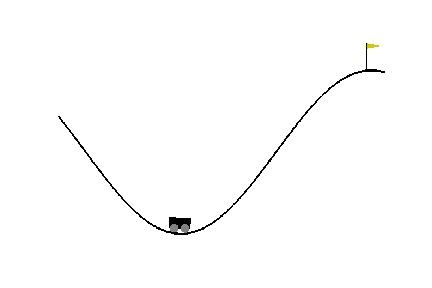
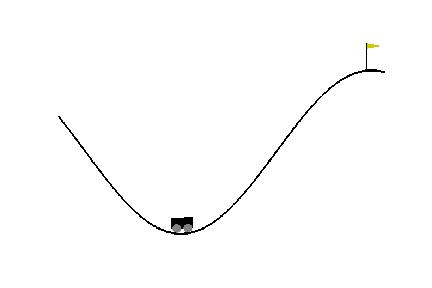
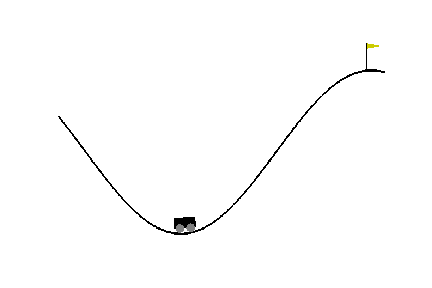
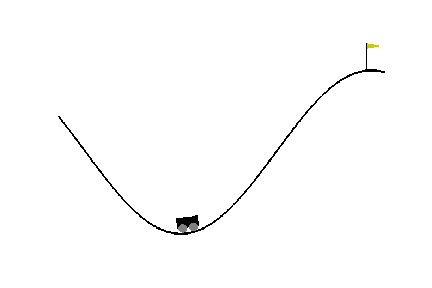
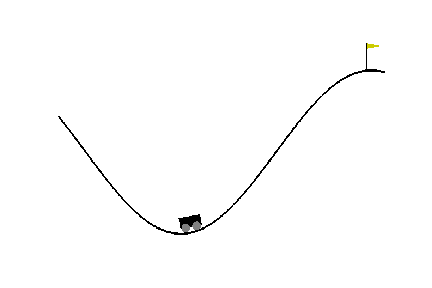
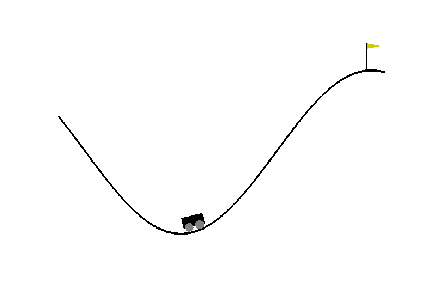
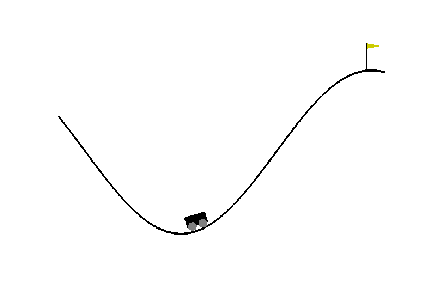
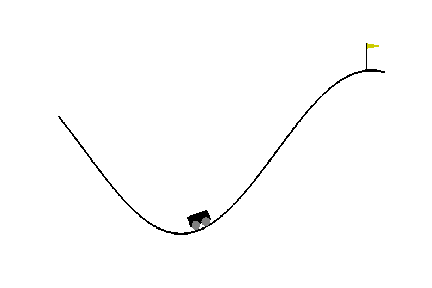
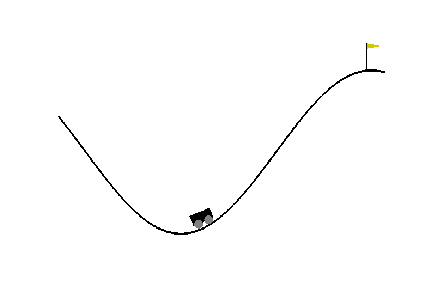
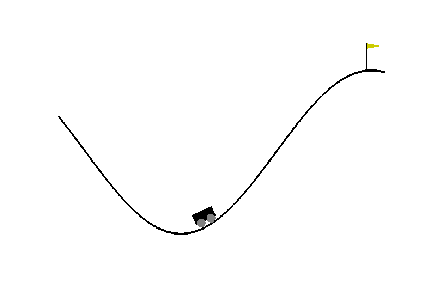
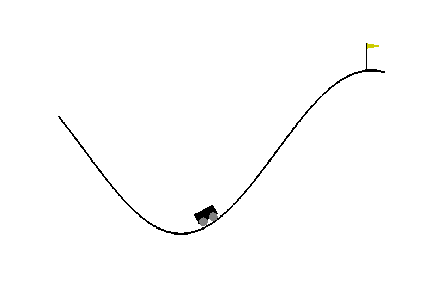
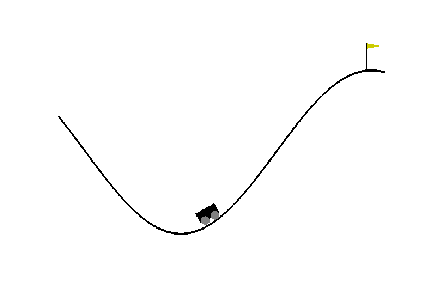
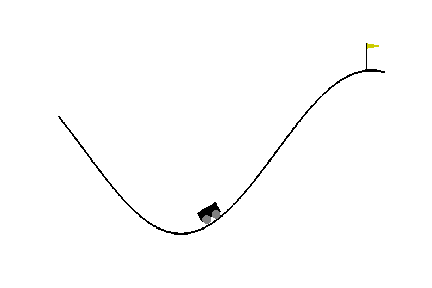
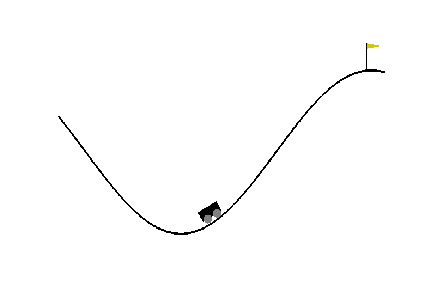
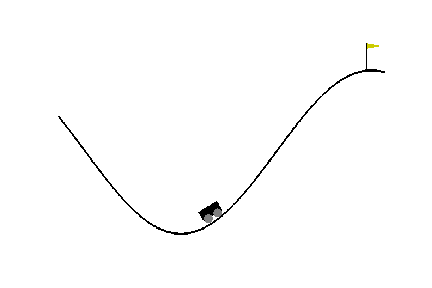
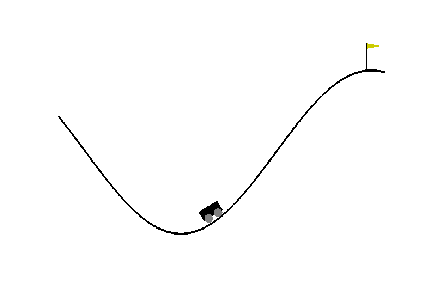
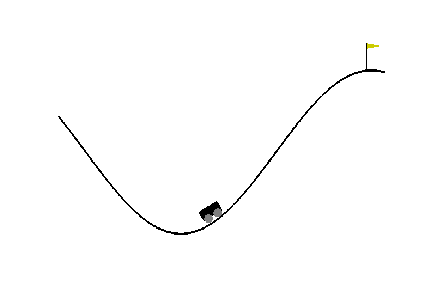
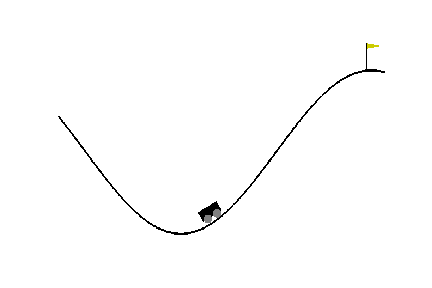
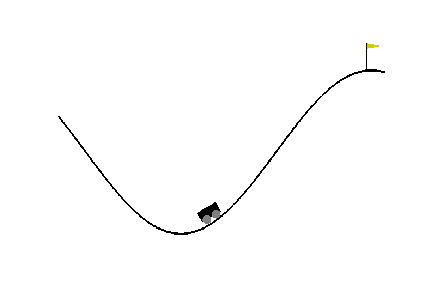
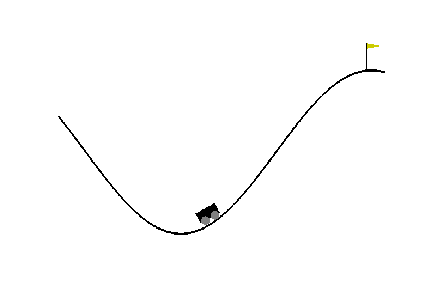
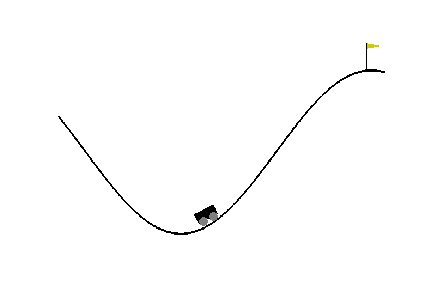
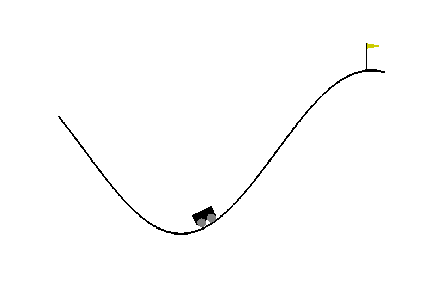
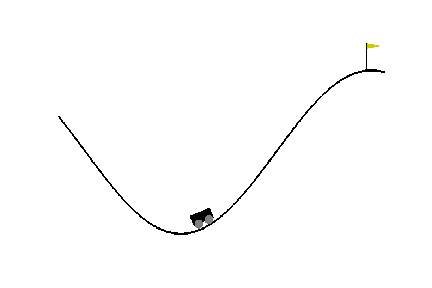
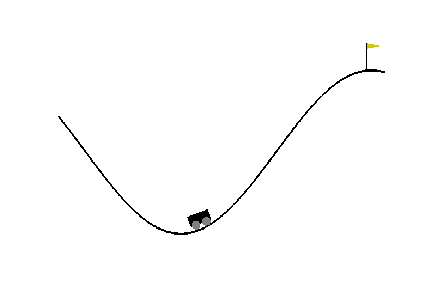
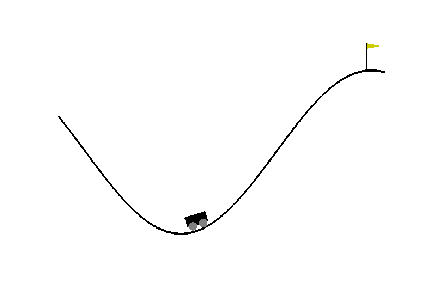
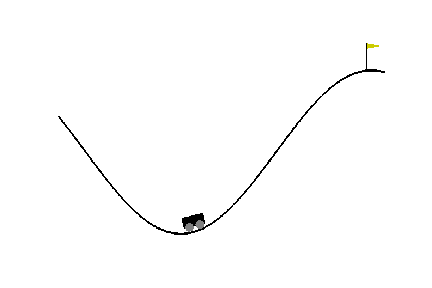
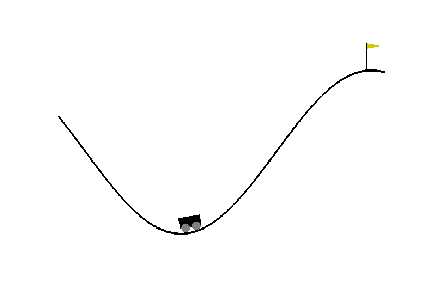
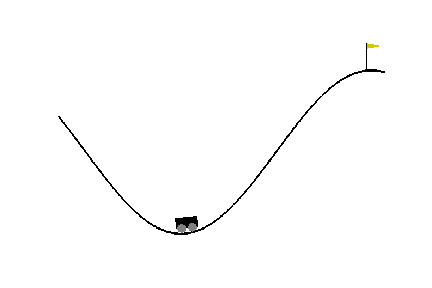
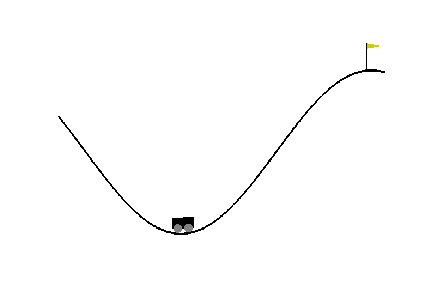
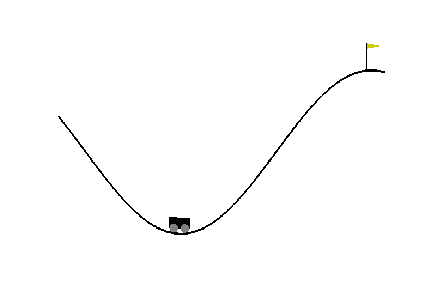
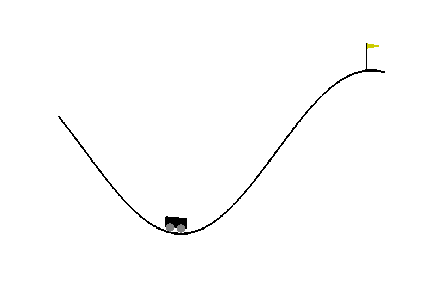
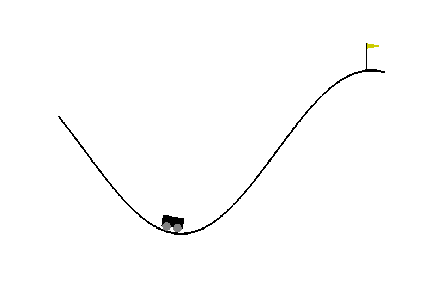
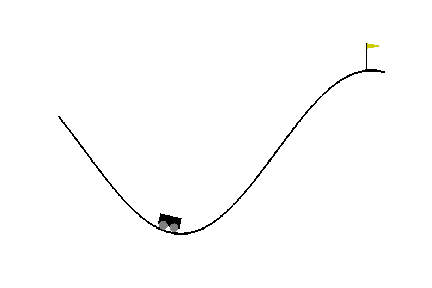
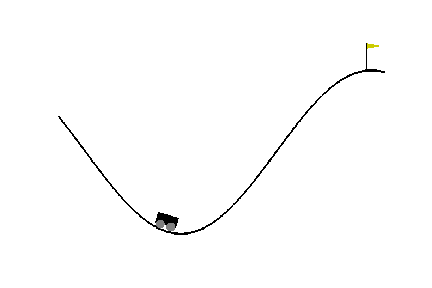
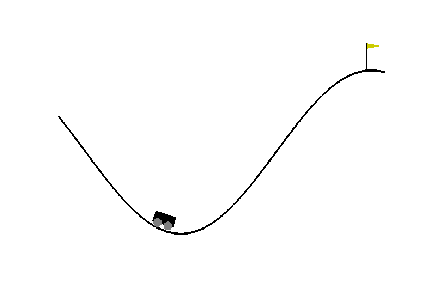
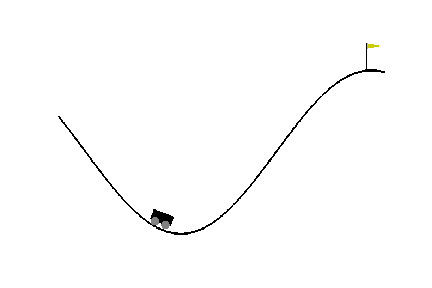
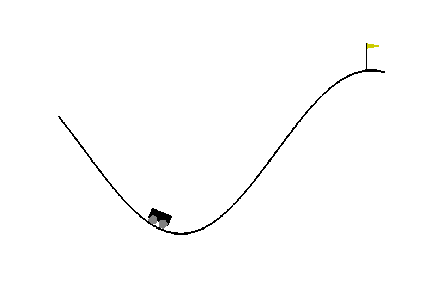
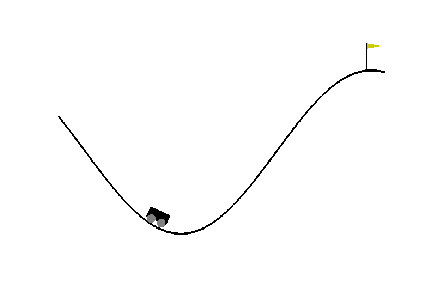
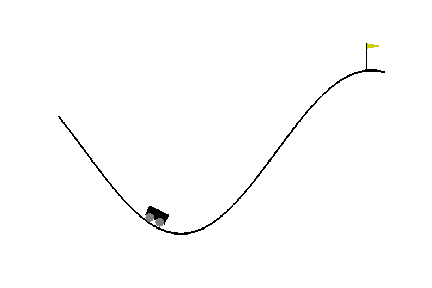
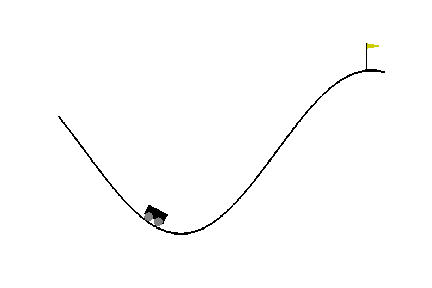
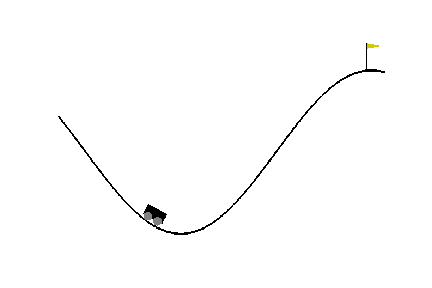
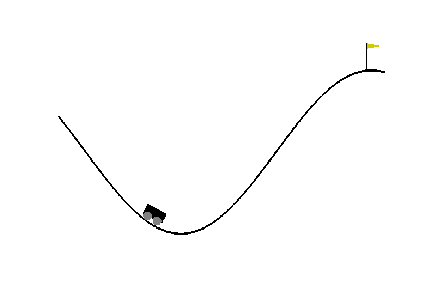
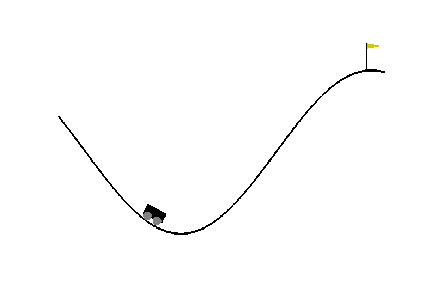
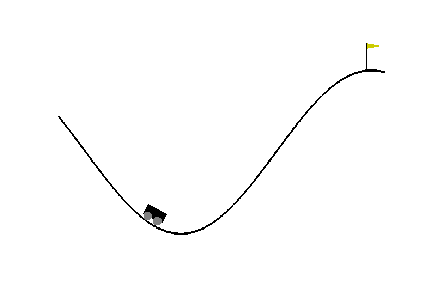
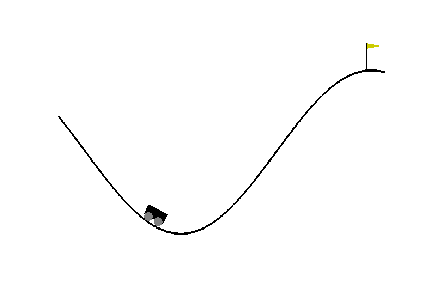
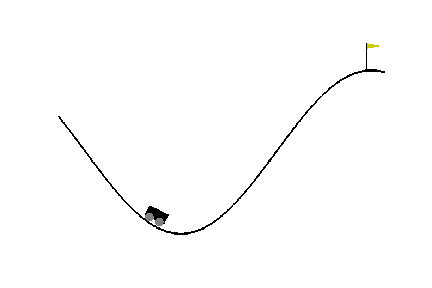
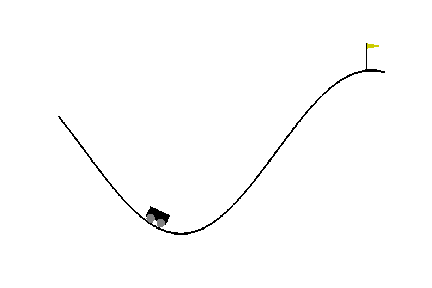
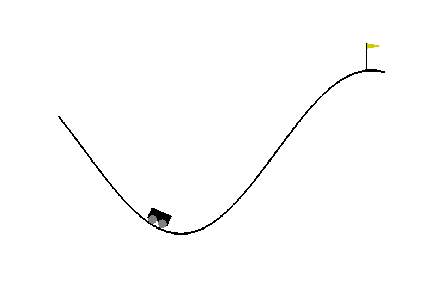
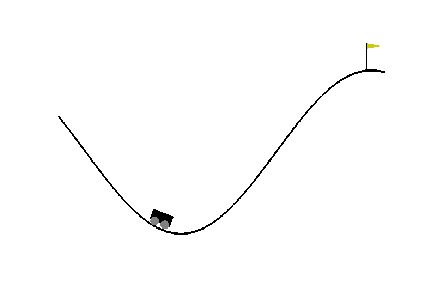
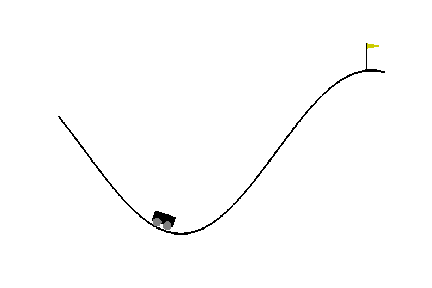
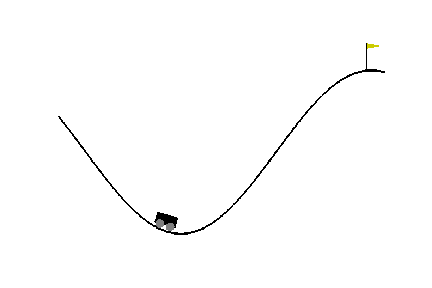
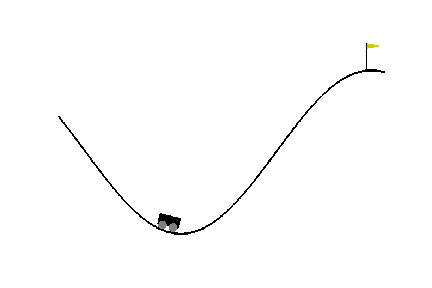
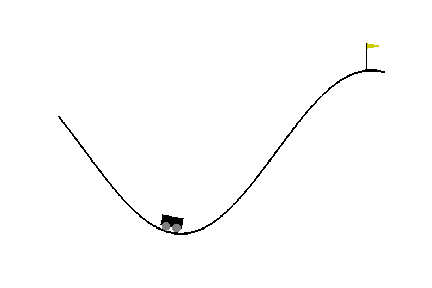
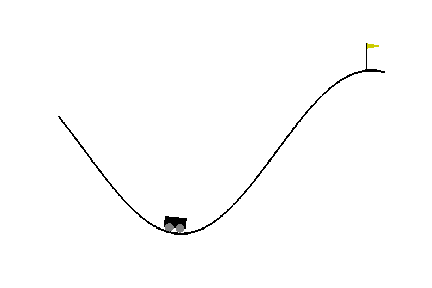
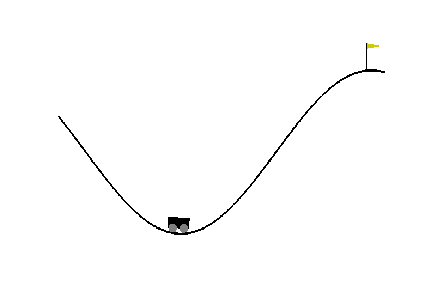
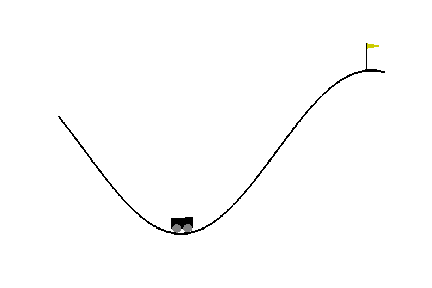
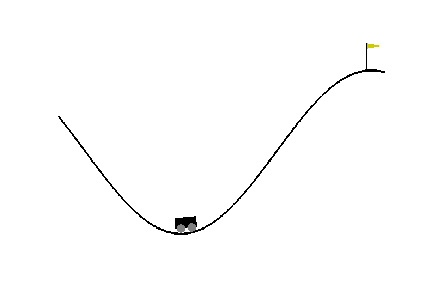
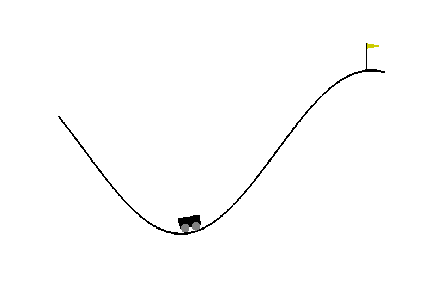
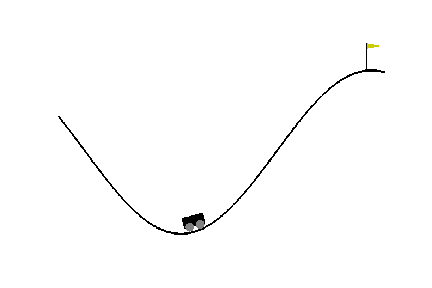
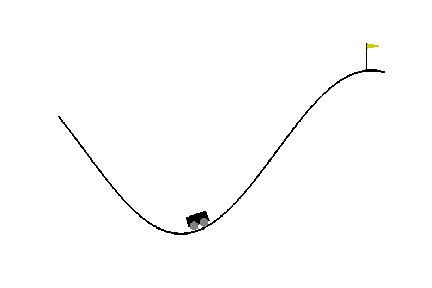
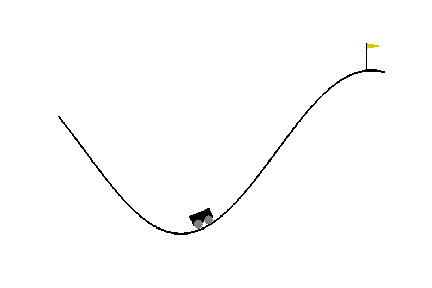
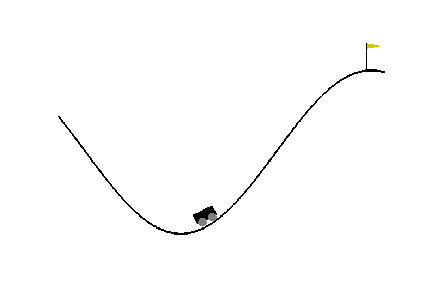
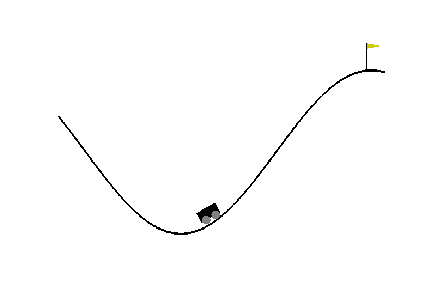
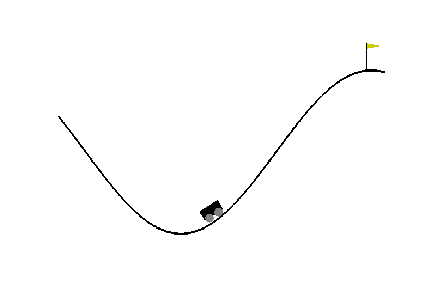
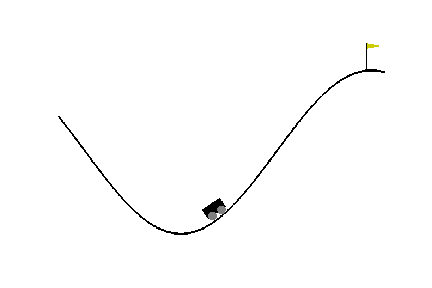
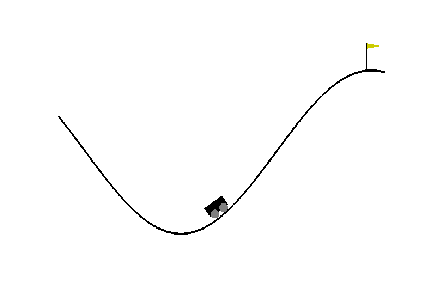
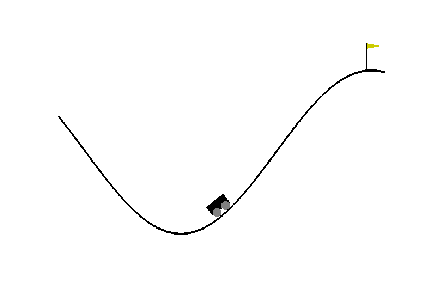
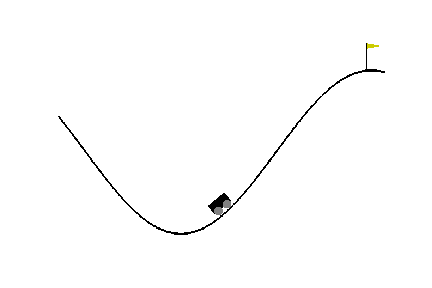
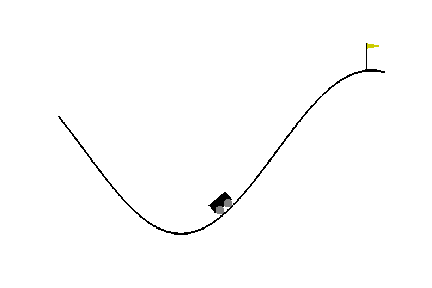
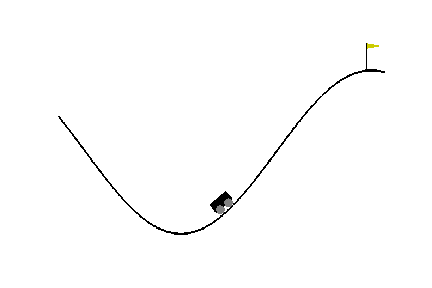
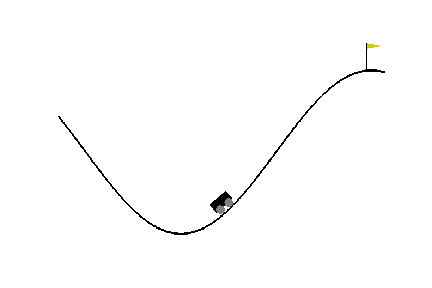
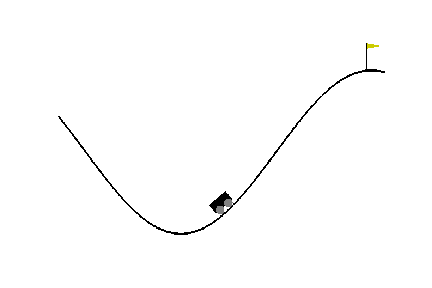
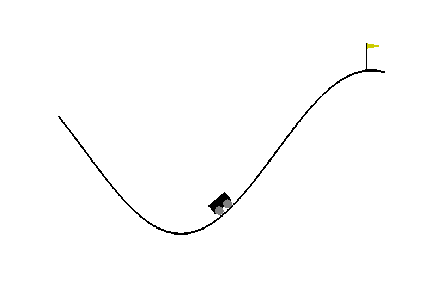
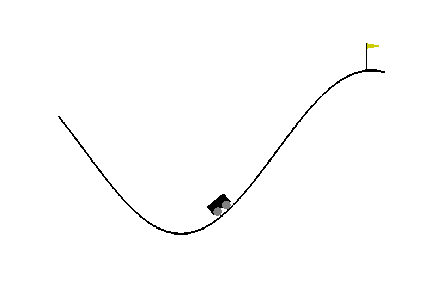
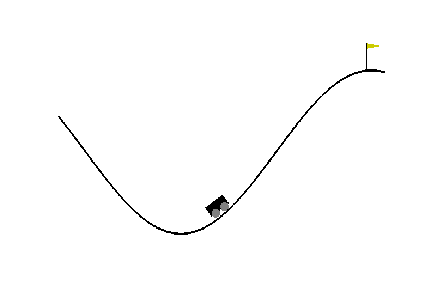
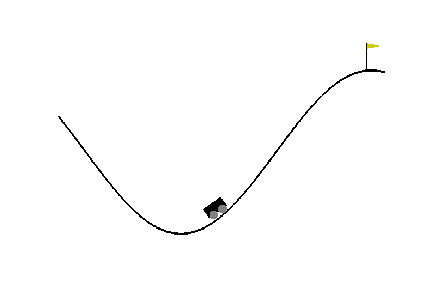
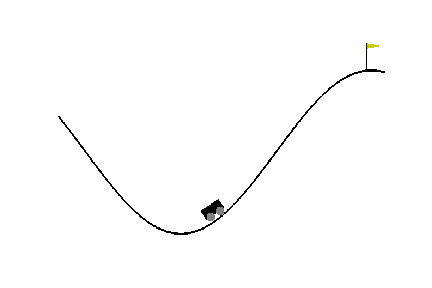
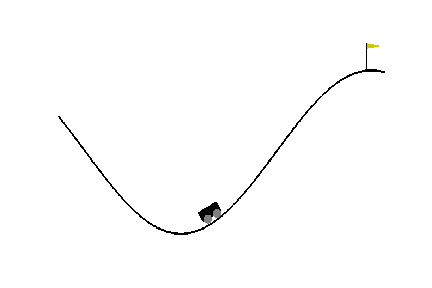
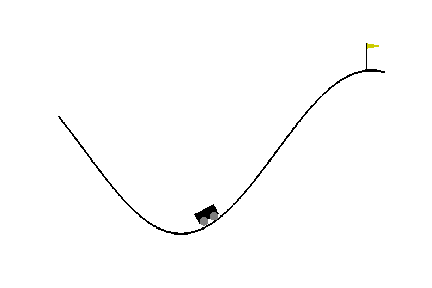
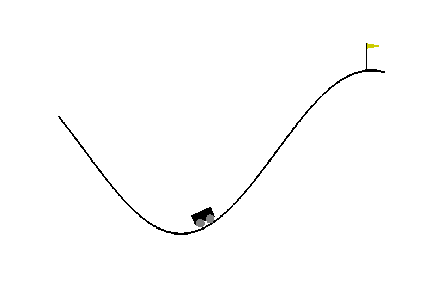
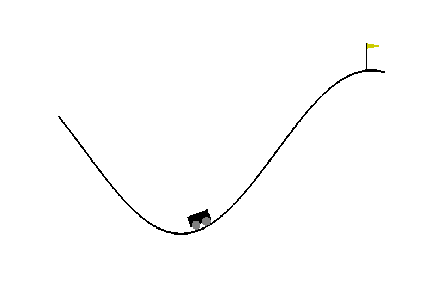
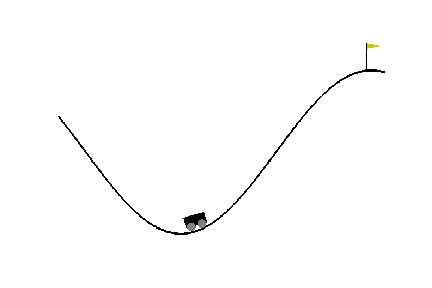
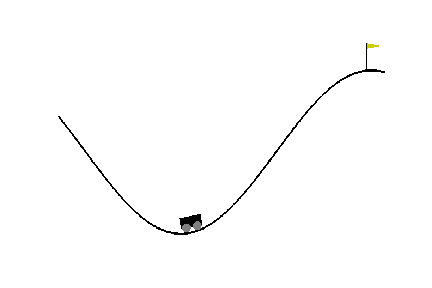
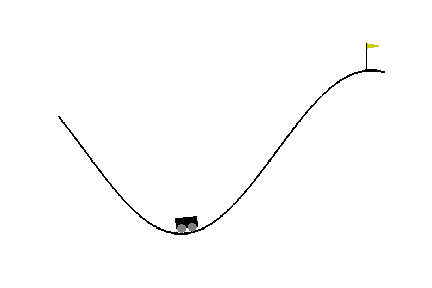
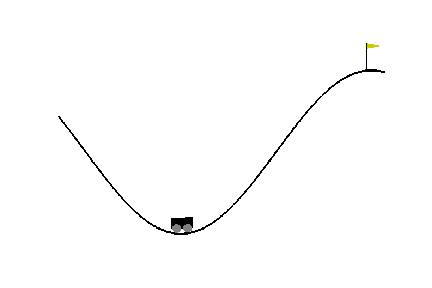
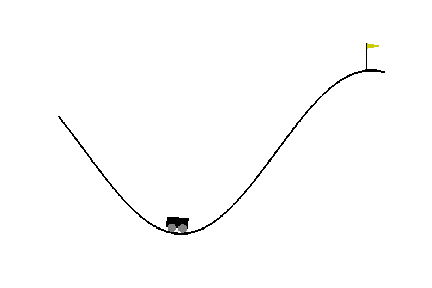
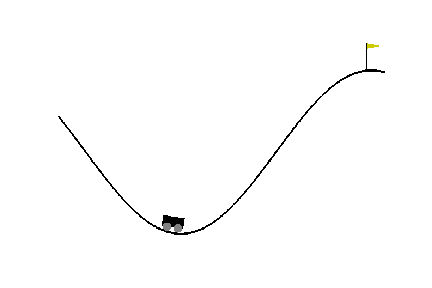
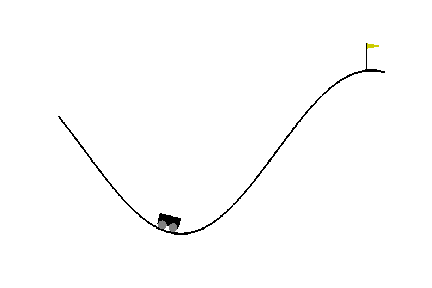
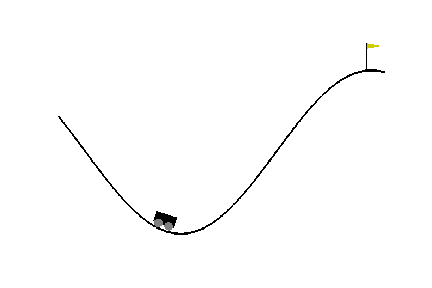
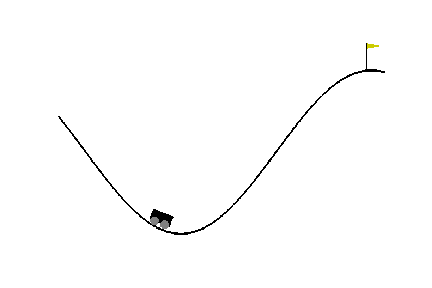
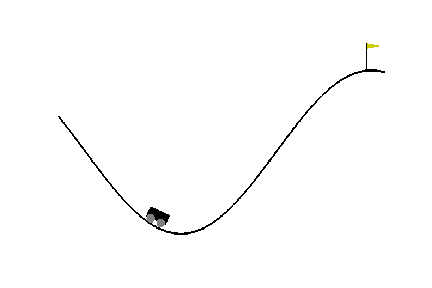
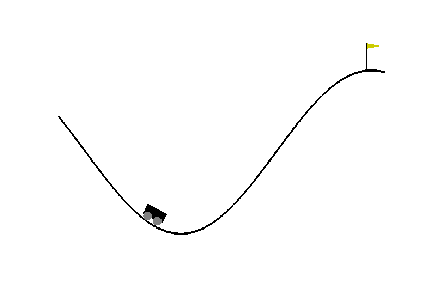
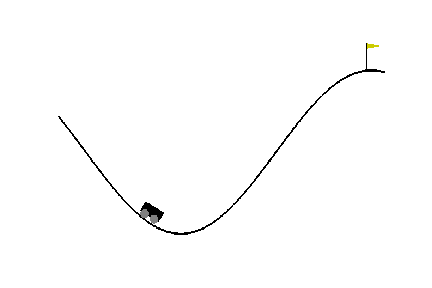
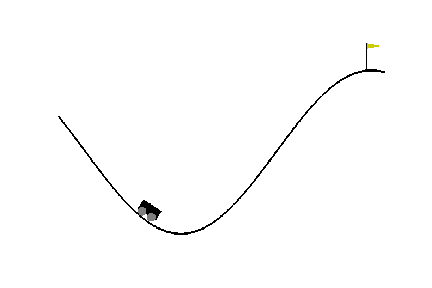
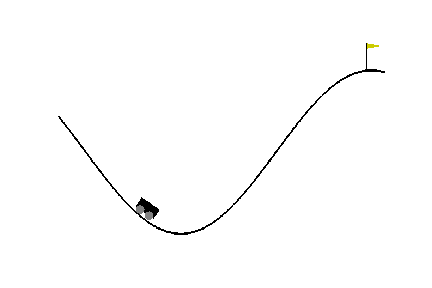
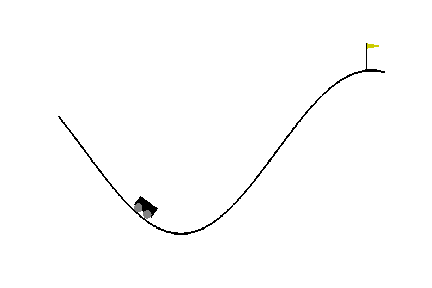
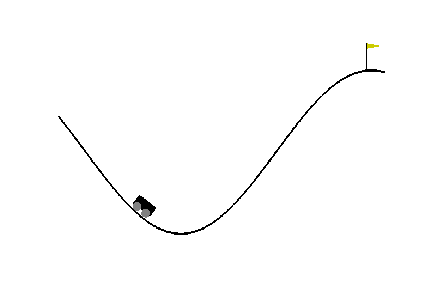
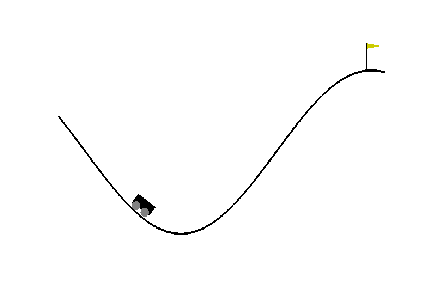
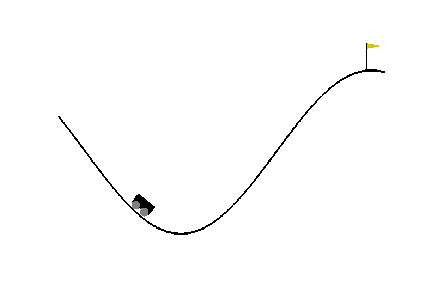
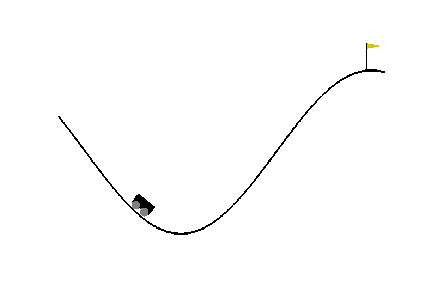
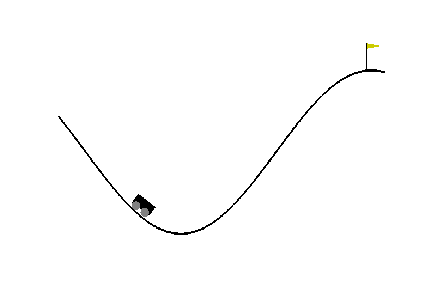
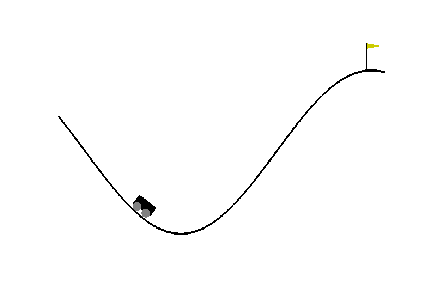
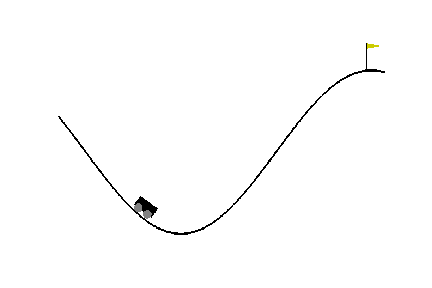
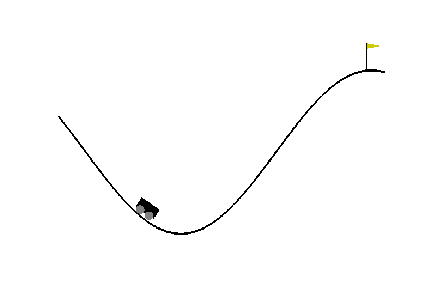
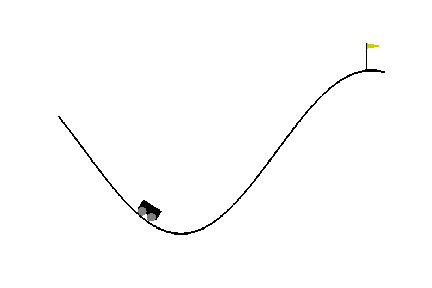
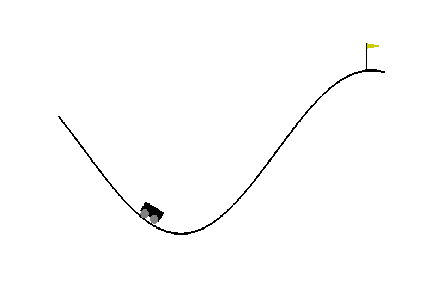
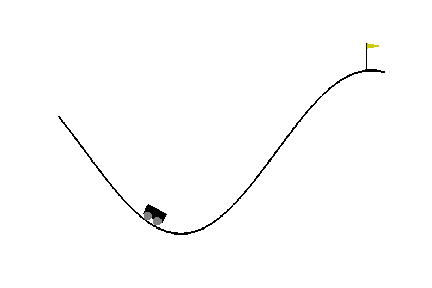
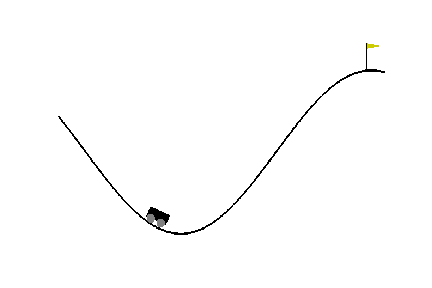
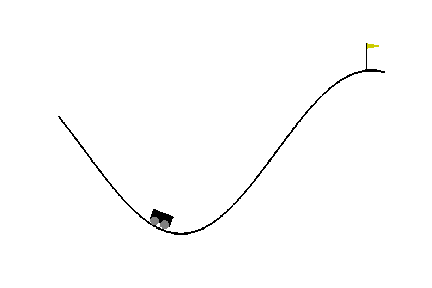
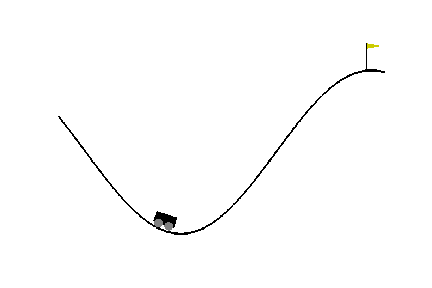
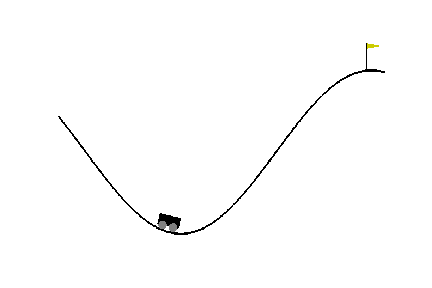
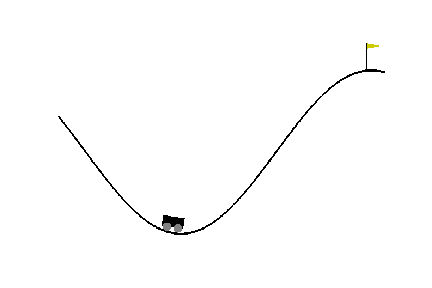
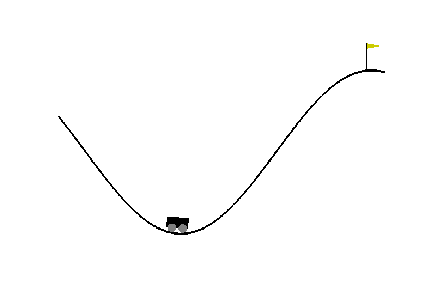
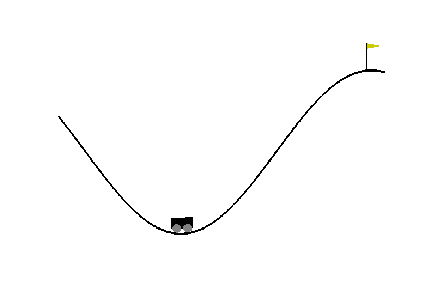
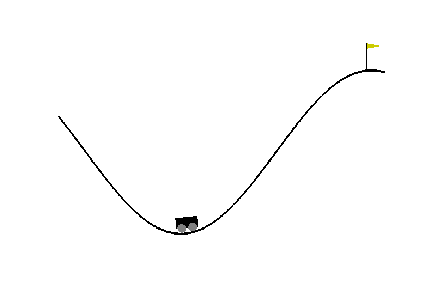
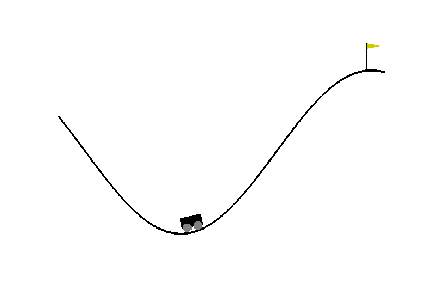
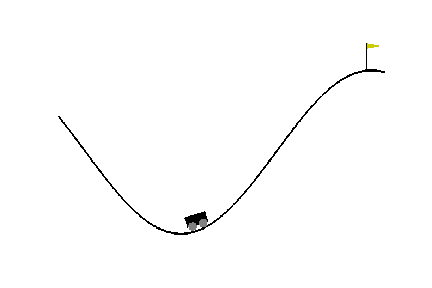
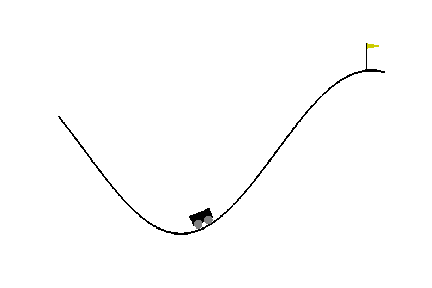
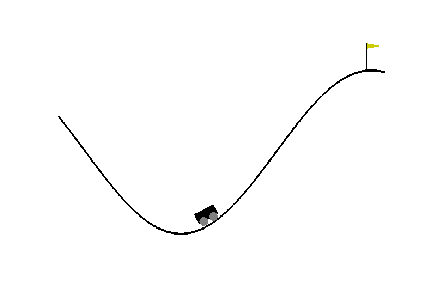
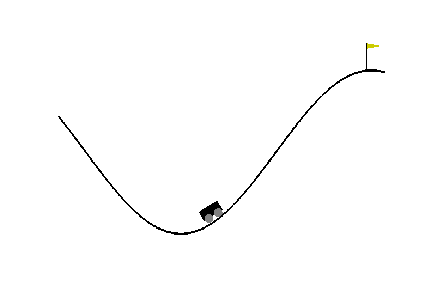
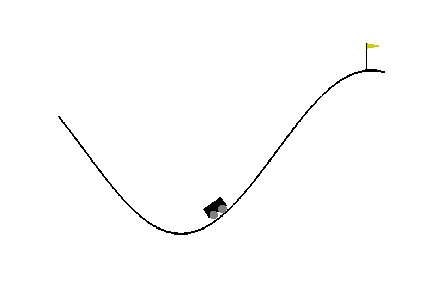
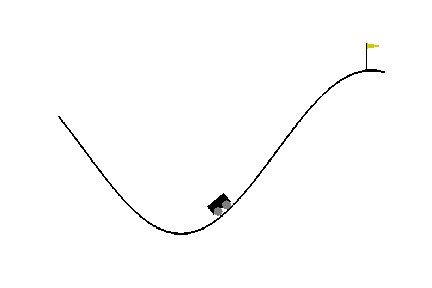
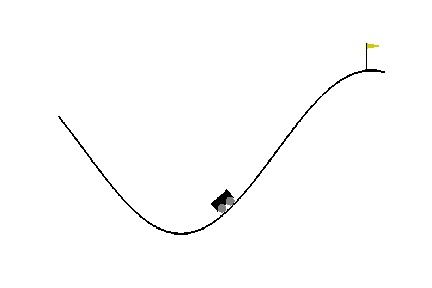
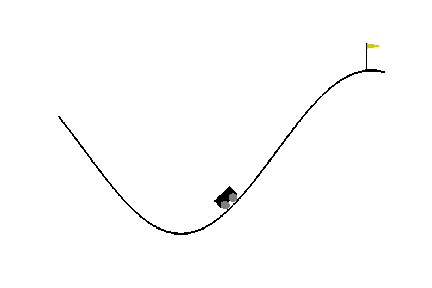
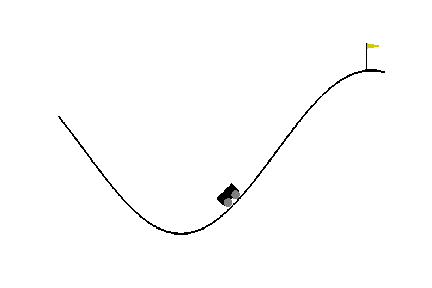
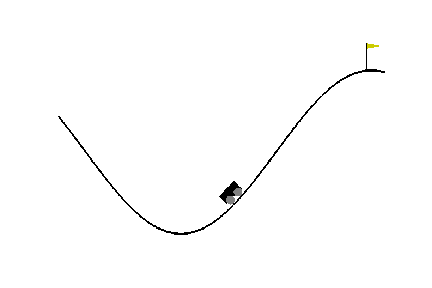
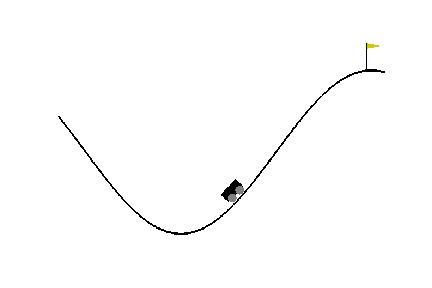
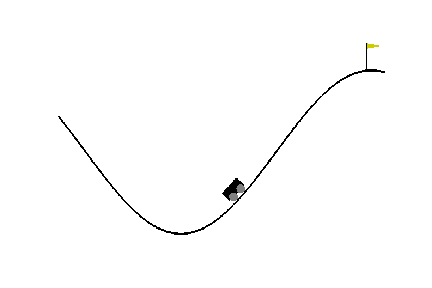
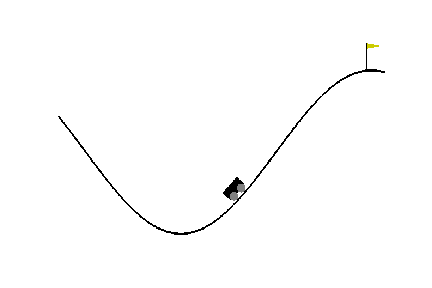
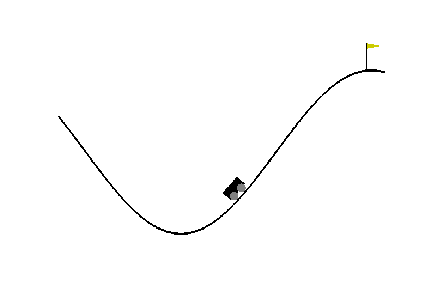
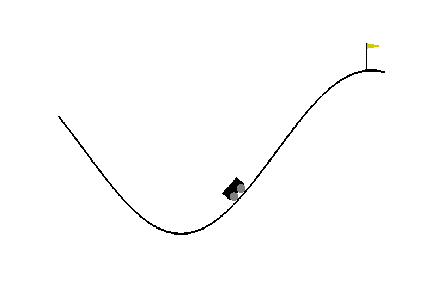
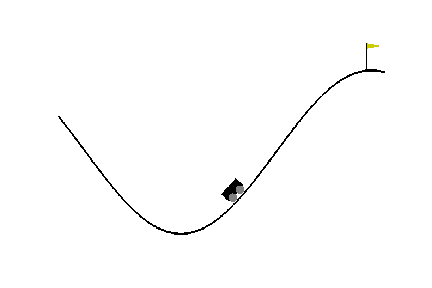
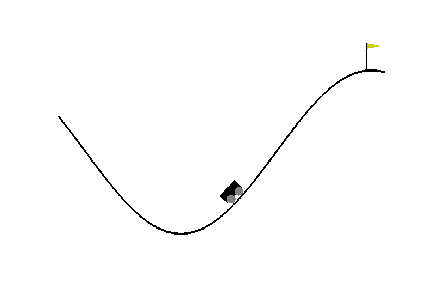
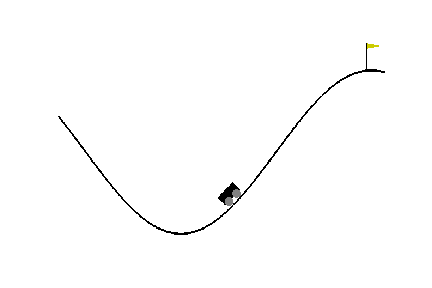
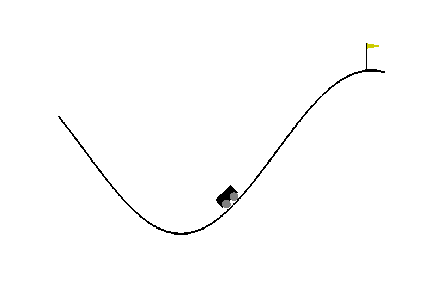
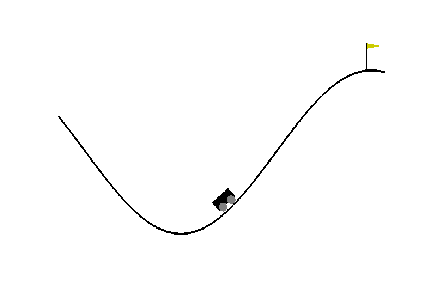
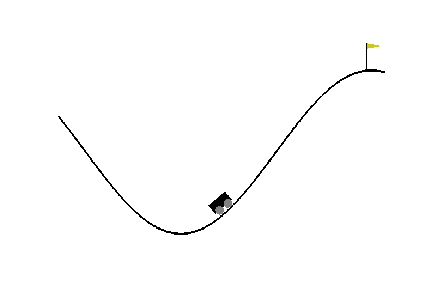
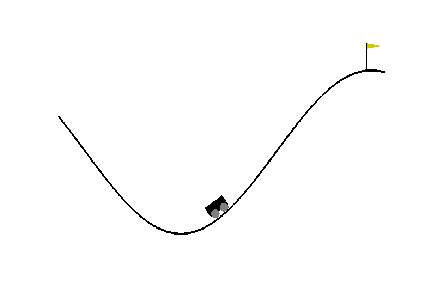
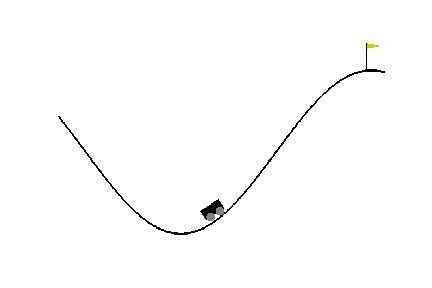
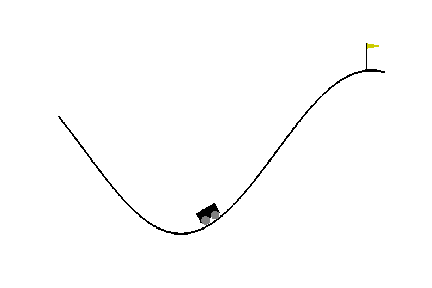
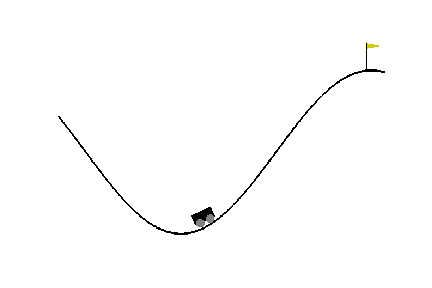
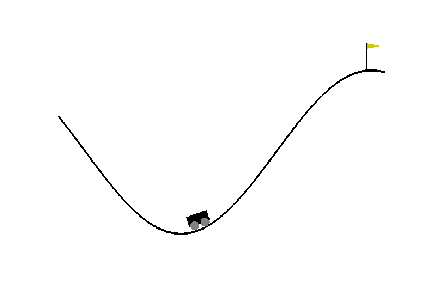
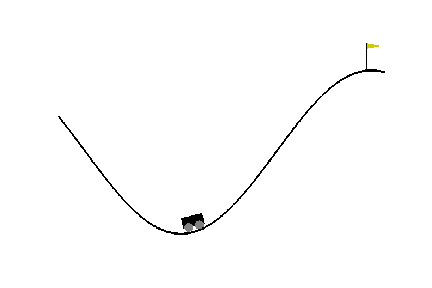
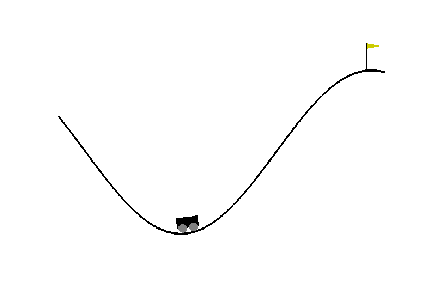

In [12]:
stat = e.train(qtorch,plot=True)
e.test(qtorch,gif=True)